# Conclusion

XGBoost with kfolds=5, sample_weight='balanced', and pruned parameter values found with `RandomizedSearchCV`.

Best accuracy so far.

## HOME_TEAM_WINS

Target to beat - 59.1% home winrate

Achieved - **75% accuracy**

|Pruning|Max Accuracy|Mean Accuracy|Min Accuracy|
|-|-|-|-|
|None|72%|72%|71%|
|max_depth|75%|74%|71%|
|reg_lambda|71%|70%|69%|
|learning rate|71%|67%|62%|
|gamma|64%|63%|61%|
|scale_pos_weight|67%|64%|61%|

## HOME_HIGHER_FG_PCT

Target to beat - 55.0% rate of home having higher FGP

Achieved - **71% accuracy**

|Pruning|Max Accuracy|Mean Accuracy|Min Accuracy|
|-|-|-|-|
|None|71%|68%|67%|
|max_depth|70%|67%|65%|
|reg_lambda|67%|66%|64%|
|learning rate|67%|61%|57%|
|gamma|61%|60%|57%|
|scale_pos_weight|68%|65%|60%|

## HOME_HIGHER_FG3_PCT

Target to beat - 50.8% rate of home having higher FG3

Achieved - **66% accuracy**

|Pruning|Max Accuracy|Mean Accuracy|Min Accuracy|
|-|-|-|-|
|None|66%|63%|61%|
|max_depth|66%|65%|63%|
|reg_lambda|63%|61%|58%|
|learning rate|64%|61%|59%|
|gamma|61%|59%|57%|
|scale_pos_weight|63%|61%|59%|

## HOME_HIGHER_FT_PCT

Target to beat - 49.5% rate of home having higher FTP

Achieved - **66% accuracy**

|Pruning|Max Accuracy|Mean Accuracy|Min Accuracy|
|-|-|-|-|
|None|66%|64%|60%|
|max_depth|66%|64%|60%|
|reg_lambda|66%|64%|63%|
|learning rate|63%|60%|56%|
|gamma|62%|58%|53%|
|scale_pos_weight|66%|63%|60%|

## HOME_HIGHER_AST

Target to beat - 55.0% rate of home having higher AST

Achieved - **71% accuracy**

|Pruning|Max Accuracy|Mean Accuracy|Min Accuracy|
|-|-|-|-|
|None|68%|66%|64%|
|max_depth|71%|70%|68%|
|reg_lambda|67%|66%|63%|
|learning rate|66%|62%|56%|
|gamma|61%|59%|56%|
|scale_pos_weight|67%|63%|60%|

## HOME_HIGHER_REB

Target to beat - 53.4% rate of home having higher REB

Achieved - **68% accuracy**

|Pruning|Max Accuracy|Mean Accuracy|Min Accuracy|
|-|-|-|-|
|None|65%|64%|63%|
|max_depth|68%|67%|66%|
|reg_lambda|67%|65%|64%|
|learning rate|65%|63%|56%|
|gamma|61%|58%|56%|
|scale_pos_weight|66%|61%|56%|


In [2]:
import numpy as np
import pandas as pd
import xgboost as xgb
import matplotlib.pyplot as plt
import sys
sys.path.append('../../')
from datasets import data as Local ## Local module to get dataframes

from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

In [3]:
games_df, winners_df, greater_fgp_df, greater_fg3_df, greater_ft_df, greater_ast_df, greater_reb_df, cumulative_stats_df, games_details_df, teams_df, players_df, ranking_df = \
    Local.get_all_dataset_dataframes('../../datasets/')

# Target datasets

- Home has:
    - 59.1% Winrate
    - 55.0% Rate of Higher FGP
    - 50.8% Rate of Higher FG3
    - 49.5% Rate of Higher FTP
    - 55.0% Rate of Higher AST
    - 53.4% Rate of Higher REB

In [4]:
winners_df # Whether the home team won in a game in each row of `games_df`

16157    1
16156    1
16155    1
16154    1
16153    1
        ..
4        0
3        0
2        0
1        1
0        1
Name: HOME_TEAM_WINS, Length: 23520, dtype: int64

In [5]:
winners_df.describe()

count    23520.000000
mean         0.591029
std          0.491654
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: HOME_TEAM_WINS, dtype: float64

In [6]:
greater_fgp_df.describe()

count    23520.000000
mean         0.550468
std          0.497457
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: HOME_HIGHER_FG_PCT, dtype: float64

In [7]:
greater_fg3_df.describe()

count    23520.000000
mean         0.507993
std          0.499947
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: HOME_HIGHER_FG3_PCT, dtype: float64

In [8]:
greater_ft_df.describe()

count    23520.000000
mean         0.494855
std          0.499984
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          1.000000
Name: HOME_HIGHER_FT_PCT, dtype: float64

In [9]:
greater_ast_df.describe()

count    23520.000000
mean         0.550128
std          0.497491
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: HOME_HIGHER_AST, dtype: float64

In [10]:
greater_reb_df.describe()

count    23520.000000
mean         0.533886
std          0.498861
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: HOME_HIGHER_REB, dtype: float64

# Datasets

In [11]:
games_df

GAME_DATE_EST   GAME_ID  HOME_TEAM_ID  VISITOR_TEAM_ID  SEASON  \
16157    2003-10-05  10300001    1610612762       1610612742    2003   
16156    2003-10-06  10300002    1610612763       1610612749    2003   
16155    2003-10-07  10300009    1610612758       1610612746    2003   
16154    2003-10-07  10300005    1610612757       1610612745    2003   
16153    2003-10-07  10300007    1610612748       1610612755    2003   
...             ...       ...           ...              ...     ...   
4        2020-12-18  12000040    1610612761       1610612748    2020   
3        2020-12-18  12000039    1610612754       1610612755    2020   
2        2020-12-19  12000049    1610612763       1610612737    2020   
1        2020-12-19  12000048    1610612764       1610612765    2020   
0        2020-12-19  12000047    1610612753       1610612766    2020   

       PTS_home  FG_PCT_home  FT_PCT_home  FG3_PCT_home  AST_home  REB_home  \
16157      90.0        0.457        0.735         0.143      23.0      41.0   
16156     105.0        0.494        0.618         0.267      25.0      48.0   
16155     101.0        0.467        0.871         0.444      19.0      39.0   
16154     104.0        0.527        0.657         0.429      22.0      33.0   
16153      86.0        0.352        0.647         0.222      15.0      55.0   
...         ...          ...          ...           ...       ...       ...   
4         105.0        0.380        0.737         0.356      27.0      37.0   
3         107.0        0.371        0.692         0.262      19.0      45.0   
2         116.0        0.400        0.744         0.396      21.0      43.0   
1          99.0        0.427        0.625         0.295      24.0      45.0   
0         120.0        0.433        0.792         0.425      23.0      50.0   

       PTS_away  FG_PCT_away  FT_PCT_away  FG3_PCT_away  AST_away  REB_away  
16157      85.0        0.447        0.500         0.250      20.0      38.0  
16156      94.0        0.427        0.700         0.154      20.0      43.0  
16155      82.0        0.368        0.609         0.364      13.0      50.0  
16154      80.0        0.470        0.667         0.333      10.0      37.0  
16153      79.0        0.329        0.897         0.143       7.0      44.0  
...         ...          ...          ...           ...       ...       ...  
4         117.0        0.534        0.741         0.514      30.0      51.0  
3         113.0        0.533        0.629         0.355      23.0      48.0  
2         117.0        0.422        0.837         0.297      24.0      47.0  
1          96.0        0.402        0.647         0.326      18.0      51.0  
0         117.0        0.444        0.864         0.439      21.0      52.0  

[23520 rows x 17 columns]

In [12]:
cumulative_stats_df

DATE   GAME_ID  SEASON_TYPE  SEASON  GAMES_PLAYED_home  \
0      2003-10-05  10300001            1    2003                  0   
1      2003-10-06  10300002            1    2003                  0   
2      2003-10-07  10300009            1    2003                  0   
3      2003-10-07  10300005            1    2003                  0   
4      2003-10-07  10300007            1    2003                  0   
...           ...       ...          ...     ...                ...   
23515  2020-12-18  12000040            1    2020                  2   
23516  2020-12-18  12000039            1    2020                  2   
23517  2020-12-19  12000049            1    2020                  3   
23518  2020-12-19  12000048            1    2020                  2   
23519  2020-12-19  12000047            1    2020                  3   

       GAMES_PLAYED_away  PPG_total_home  FG_PCT_total_home  \
0                      0        0.000000           0.000000   
1                      0        0.000000           0.000000   
2                      0        0.000000           0.000000   
3                      0        0.000000           0.000000   
4                      0        0.000000           0.000000   
...                  ...             ...                ...   
23515                  1      111.500000           0.443500   
23516                  1      105.000000           0.438000   
23517                  3      119.333333           0.466667   
23518                  3      100.000000           0.415000   
23519                  3      112.666667           0.444333   

       FG3_PCT_total_home  FT_PCT_total_home  ...  PPG_total_away  \
0                0.000000           0.000000  ...        0.000000   
1                0.000000           0.000000  ...        0.000000   
2                0.000000           0.000000  ...        0.000000   
3                0.000000           0.000000  ...        0.000000   
4                0.000000           0.000000  ...        0.000000   
...                   ...                ...  ...             ...   
23515            0.353000           0.691000  ...       92.000000   
23516            0.383000           0.619000  ...      108.000000   
23517            0.329333           0.704667  ...      111.333333   
23518            0.321500           0.704500  ...       93.333333   
23519            0.305333           0.758000  ...      110.666667   

       FG_PCT_total_away  FG3_PCT_total_away  FT_PCT_total_away  \
0               0.000000            0.000000           0.000000   
1               0.000000            0.000000           0.000000   
2               0.000000            0.000000           0.000000   
3               0.000000            0.000000           0.000000   
4               0.000000            0.000000           0.000000   
...                  ...                 ...                ...   
23515           0.427000            0.283000           0.818000   
23516           0.471000            0.241000           0.750000   
23517           0.392667            0.332333           0.789667   
23518           0.413333            0.333000           0.713000   
23519           0.442333            0.372333           0.751000   

       APG_total_away  RPG_total_away  TEAM_ID_away  TEAM_ID_home  W_PCT_away  \
0            0.000000        0.000000  1.610613e+09  1.610613e+09    0.000000   
1            0.000000        0.000000  1.610613e+09  1.610613e+09    0.000000   
2            0.000000        0.000000  1.610613e+09  1.610613e+09    0.000000   
3            0.000000        0.000000  1.610613e+09  1.610613e+09    0.000000   
4            0.000000        0.000000  1.610613e+09  1.610613e+09    0.000000   
...               ...             ...           ...           ...         ...   
23515       26.000000       35.000000  1.610613e+09  1.610613e+09    0.000000   
23516       23.000000       42.000000  1.610613e+09  1.610613e+09    1.000000   
23517       24.000000       56.000000  1

## Attach target columns to dataset

In [13]:
cumulative_stats_copy_df = cumulative_stats_df.copy()
cumulative_stats_copy_df['home_win'] = winners_df
cumulative_stats_copy_df['greater_fgp'] = greater_fgp_df
cumulative_stats_copy_df['greater_fg3'] = greater_fg3_df
cumulative_stats_copy_df['greater_ft'] = greater_ft_df
cumulative_stats_copy_df['greater_ast'] = greater_ast_df
cumulative_stats_copy_df['greater_reb'] = greater_reb_df

## Remove rows w/o data

In [14]:
cumulative_stats_copy_df = cumulative_stats_copy_df[(cumulative_stats_copy_df['GAMES_PLAYED_home']>0) & (cumulative_stats_copy_df['GAMES_PLAYED_away']>0)]

# Get new target datasets after row removal
winners_df = cumulative_stats_copy_df['home_win']
greater_fgp_df = cumulative_stats_copy_df['greater_fgp']
greater_fg3_df = cumulative_stats_copy_df['greater_fg3']
greater_ft_df = cumulative_stats_copy_df['greater_ft']
greater_ast_df = cumulative_stats_copy_df['greater_ast']
greater_reb_df = cumulative_stats_copy_df['greater_reb']

## Remove non-data

In [15]:
# Delete non-data
for key in [
    'DATE','GAME_ID','TEAM_ID_home','TEAM_ID_away','SEASON_TYPE','SEASON','GAMES_PLAYED_home','GAMES_PLAYED_away',
    'home_win','greater_fgp','greater_fg3','greater_ft','greater_ast','greater_reb'
]:
    del cumulative_stats_copy_df[key]
# Only look at home teams
# cumulative_stats_copy_df = cumulative_stats_copy_df.loc[cumulative_stats_copy_df['AT_HOME']==True]
# del cumulative_stats_copy_df['AT_HOME']
cumulative_stats_copy_df

PPG_total_home  FG_PCT_total_home  FG3_PCT_total_home  \
19         104.000000           0.527000            0.429000   
21          86.000000           0.380000            0.188000   
22          86.000000           0.352000            0.222000   
23          58.000000           0.457000            0.667000   
24          87.500000           0.432000            0.420000   
...               ...                ...                 ...   
23515      111.500000           0.443500            0.353000   
23516      105.000000           0.438000            0.383000   
23517      119.333333           0.466667            0.329333   
23518      100.000000           0.415000            0.321500   
23519      112.666667           0.444333            0.305333   

       FT_PCT_total_home  APG_total_home  RPG_total_home  PPG_total_away  \
19              0.657000       22.000000       33.000000      101.000000   
21              0.852000       19.000000       37.000000      101.000000   
22              0.647000       15.000000       55.000000       80.000000   
23              0.700000       10.000000       31.000000       89.000000   
24              0.672000       20.500000       43.000000       79.000000   
...                  ...             ...             ...             ...   
23515           0.691000       25.000000       41.500000       92.000000   
23516           0.619000       26.000000       35.500000      108.000000   
23517           0.704667       30.666667       52.666667      111.333333   
23518           0.704500       22.000000       44.500000       93.333333   
23519           0.758000       25.000000       51.333333      110.666667   

       FG_PCT_total_away  FG3_PCT_total_away  FT_PCT_total_away  \
19              0.467000            0.444000           0.871000   
21              0.464000            0.250000           0.679000   
22              0.350000            0.429000           0.750000   
23              0.462000            0.214000           0.538000   
24              0.329000            0.143000           0.897000   
...                  ...                 ...                ...   
23515           0.427000            0.283000           0.818000   
23516           0.471000            0.241000           0.750000   
23517           0.392667            0.332333           0.789667   
23518           0.413333            0.333000           0.713000   
23519           0.442333            0.372333           0.751000   

       APG_total_away  RPG_total_away  W_PCT_away  W_PCT_home  
19          19.000000       39.000000    1.000000    1.000000  
21          22.000000       47.000000    1.000000    0.000000  
22          18.000000       45.000000    0.000000    1.000000  
23          21.000000       36.000000    0.000000    0.000000  
24           7.000000       44.000000    0.000000    0.500000  
...               ...             ...         ...         ...  
23515       26.000000       35.000000    0.000000    1.000000  
23516       23.000000       42.000000    1.000000    0.000000  
23517       24.000000       56.000000    0.333333    1.000000  
23518       20.000000       41.666667    0.666667    0.000000  
23519       29.666667       45.000000    0.333333    0.333333  

[23147 rows x 14 columns]

## Do hyperparameters searches

In [16]:
from sklearn.metrics import classification_report

In [17]:
from sklearn.tree import plot_tree
from yellowbrick.model_selection import FeatureImportances

In [18]:
from sklearn.utils.class_weight import compute_sample_weight

In [19]:
# Get best params based from CV function
def do_cv(classifier, cv_fun, params, x, y, **kwargs):
    clf = cv_fun(
        classifier,
        params,
        scoring='accuracy', # Optimize for the 'accuracy' score of the model.
        **kwargs,
    )
#     clf.fit(x, y, sample_weight=compute_sample_weight('balanced',y))
    clf.fit(x, y)
    return clf

## Plot feature importances

In [20]:
def plot_feature_importances(clf, X, y):
    viz = FeatureImportances(clf, labels=X.columns)
    viz.fit(X, y)
    viz.show()

In [21]:
def print_all_metrics_and_plot(clf, X_train_dict, X_test_dict, y_train_dict, y_test_dict, grid_cv_params):
    scores = []
    for key in X_train_dict.keys():
        cv_clf = do_cv(
            clf,
#             GridSearchCV,
            RandomizedSearchCV,
            grid_cv_params,
            X_train_dict[key],
            y_train_dict[key],
        )
        print(key.upper()+':\n')
        score = cv_clf.best_estimator_.score(X_test_dict[key], y_test_dict[key])
        scores.append(score)
        print('Best XGBoost accuracy (%s): %.2f' % (str(cv_clf.best_params_), score))
        print(classification_report(y_test_dict[key], cv_clf.best_estimator_.predict(X_test_dict[key])))
        plot_feature_importances(cv_clf.best_estimator_, X_train_dict[key], y_train_dict[key])
        print('---------------------------------------------')
    return scores

## Build K-folds datasets

In [22]:
from imblearn.combine import SMOTEENN

In [23]:
from sklearn.model_selection import KFold
kf = KFold(shuffle=True, random_state=123)

X_train_dicts = []
X_test_dicts = []
y_train_dicts = []
y_test_dicts = []

for target, key in [(winners_df, 'winner'), (greater_fgp_df, 'fgp'), (greater_fg3_df, 'fg3'), (greater_ft_df, 'ft'), (greater_ast_df, 'ast'), (greater_reb_df, 'reb')]:
    X_over, y_over = SMOTEENN(sampling_strategy='all').fit_resample(cumulative_stats_copy_df, target)
    for train, test in kf.split(X_over, y_over):
        X_train_dict = {}
        X_test_dict = {}
        y_train_dict = {}
        y_test_dict = {}
        
        X_train_dict[key], X_test_dict[key] = X_over.iloc[train], X_over.iloc[test]
        y_train_dict[key], y_test_dict[key] = y_over.iloc[train], y_over.iloc[test]
        
        X_train_dicts.append(X_train_dict)
        X_test_dicts.append(X_test_dict)
        y_train_dicts.append(y_train_dict)
        y_test_dicts.append(y_test_dict)

assert len(X_train_dicts)==len(X_test_dicts)==len(y_train_dicts)==len(y_test_dicts)
print(len(X_train_dicts))

30


In [24]:
def print_cross_validated_and_plot(X_train_dicts, X_test_dicts, y_train_dicts, y_test_dicts, params):
    scores=[]
    for i in range(len(X_train_dicts)):
        print(f'i={i}')
        score = print_all_metrics_and_plot(
            xgb.XGBClassifier(random_state=0,eval_metric='logloss'),
            X_train_dicts[i],
            X_test_dicts[i],
            y_train_dicts[i],
            y_test_dicts[i],
            params,
        )
        if (i+1)%5==0:
            scores = pd.DataFrame(np.array(scores))
            print(f'Mean accuracy: {scores.mean()[0]}')
            print(f'Max accuracy: {scores.max()[0]}')
            print(f'Min accuracy: {scores.min()[0]}')
            print('=========================================')
            scores=[]
        else:
            scores += score

## Train w/o pruning

In [25]:
import warnings
warnings.filterwarnings("ignore")

i=0
WINNER:

Best XGBoost accuracy ({}): 0.72
              precision    recall  f1-score   support

           0       0.74      0.87      0.80       892
           1       0.66      0.45      0.53       494

    accuracy                           0.72      1386
   macro avg       0.70      0.66      0.67      1386
weighted avg       0.71      0.72      0.71      1386



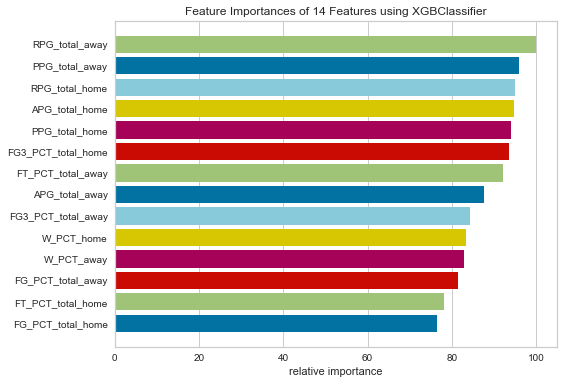

---------------------------------------------
i=1
WINNER:

Best XGBoost accuracy ({}): 0.72
              precision    recall  f1-score   support

           0       0.73      0.89      0.80       863
           1       0.71      0.45      0.55       523

    accuracy                           0.72      1386
   macro avg       0.72      0.67      0.67      1386
weighted avg       0.72      0.72      0.70      1386



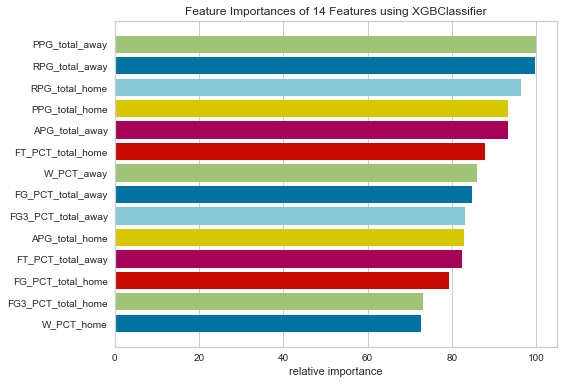

---------------------------------------------
i=2
WINNER:

Best XGBoost accuracy ({}): 0.73
              precision    recall  f1-score   support

           0       0.74      0.87      0.80       881
           1       0.68      0.47      0.56       505

    accuracy                           0.73      1386
   macro avg       0.71      0.67      0.68      1386
weighted avg       0.72      0.73      0.71      1386



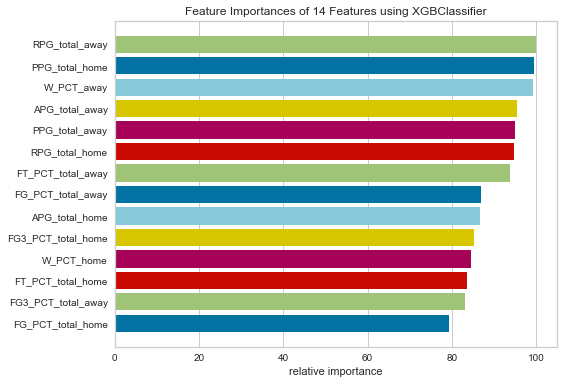

---------------------------------------------
i=3
WINNER:

Best XGBoost accuracy ({}): 0.71
              precision    recall  f1-score   support

           0       0.73      0.86      0.79       868
           1       0.66      0.46      0.55       518

    accuracy                           0.71      1386
   macro avg       0.70      0.66      0.67      1386
weighted avg       0.70      0.71      0.70      1386



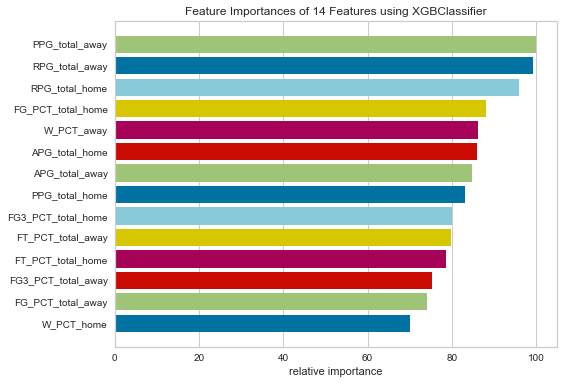

---------------------------------------------
i=4
WINNER:

Best XGBoost accuracy ({}): 0.72
              precision    recall  f1-score   support

           0       0.73      0.87      0.80       889
           1       0.66      0.43      0.52       496

    accuracy                           0.72      1385
   macro avg       0.69      0.65      0.66      1385
weighted avg       0.71      0.72      0.70      1385



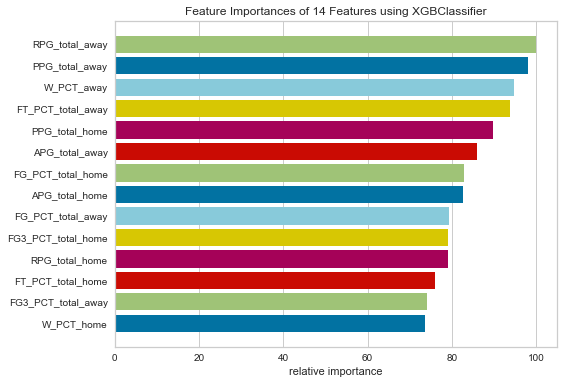

---------------------------------------------
Mean accuracy: 0.7202380952380951
Max accuracy: 0.7265512265512265
Min accuracy: 0.7121212121212122
i=5
FGP:

Best XGBoost accuracy ({}): 0.67
              precision    recall  f1-score   support

           0       0.68      0.82      0.74       568
           1       0.65      0.47      0.55       410

    accuracy                           0.67       978
   macro avg       0.67      0.64      0.64       978
weighted avg       0.67      0.67      0.66       978



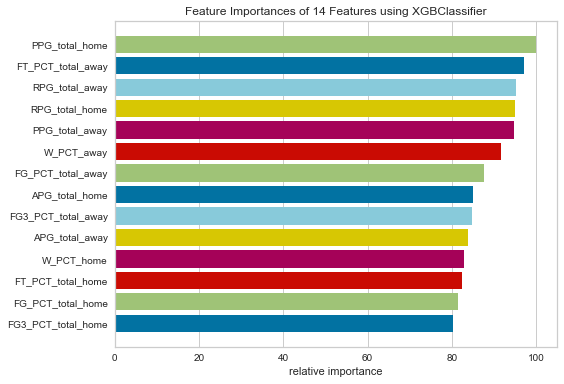

---------------------------------------------
i=6
FGP:

Best XGBoost accuracy ({}): 0.72
              precision    recall  f1-score   support

           0       0.75      0.84      0.79       621
           1       0.64      0.50      0.56       357

    accuracy                           0.72       978
   macro avg       0.69      0.67      0.68       978
weighted avg       0.71      0.72      0.71       978



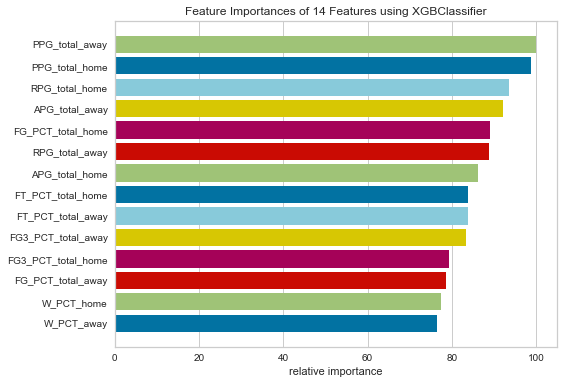

---------------------------------------------
i=7
FGP:

Best XGBoost accuracy ({}): 0.67
              precision    recall  f1-score   support

           0       0.67      0.84      0.74       556
           1       0.68      0.46      0.55       421

    accuracy                           0.67       977
   macro avg       0.67      0.65      0.64       977
weighted avg       0.67      0.67      0.66       977



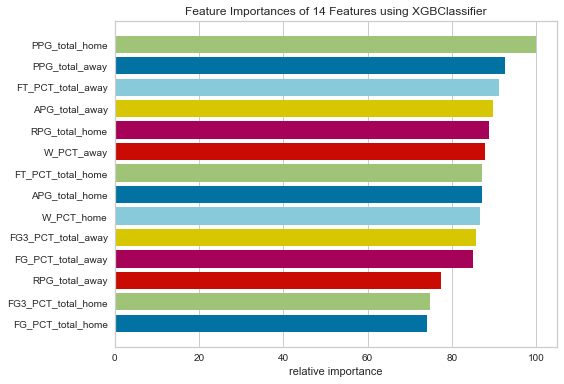

---------------------------------------------
i=8
FGP:

Best XGBoost accuracy ({}): 0.67
              precision    recall  f1-score   support

           0       0.70      0.80      0.75       597
           1       0.60      0.47      0.53       380

    accuracy                           0.67       977
   macro avg       0.65      0.64      0.64       977
weighted avg       0.66      0.67      0.66       977



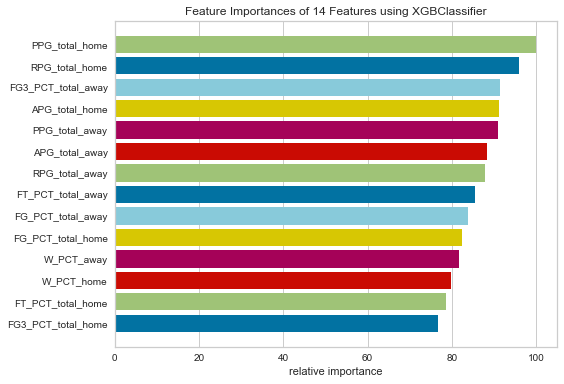

---------------------------------------------
i=9
FGP:

Best XGBoost accuracy ({}): 0.66
              precision    recall  f1-score   support

           0       0.68      0.80      0.73       568
           1       0.63      0.47      0.54       409

    accuracy                           0.66       977
   macro avg       0.65      0.63      0.63       977
weighted avg       0.65      0.66      0.65       977



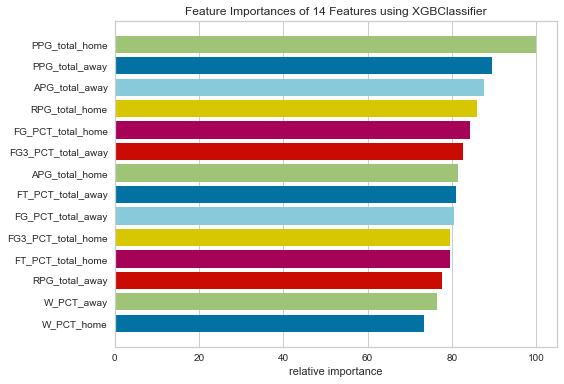

---------------------------------------------
Mean accuracy: 0.6833703817663102
Max accuracy: 0.7167689161554193
Min accuracy: 0.6717791411042945
i=10
FG3:

Best XGBoost accuracy ({}): 0.67
              precision    recall  f1-score   support

           0       0.68      0.72      0.70       332
           1       0.65      0.61      0.63       292

    accuracy                           0.67       624
   macro avg       0.67      0.66      0.66       624
weighted avg       0.67      0.67      0.67       624



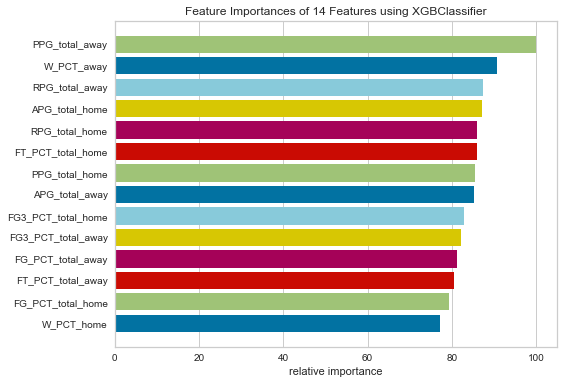

---------------------------------------------
i=11
FG3:

Best XGBoost accuracy ({}): 0.62
              precision    recall  f1-score   support

           0       0.61      0.69      0.65       316
           1       0.63      0.54      0.58       308

    accuracy                           0.62       624
   macro avg       0.62      0.62      0.61       624
weighted avg       0.62      0.62      0.61       624



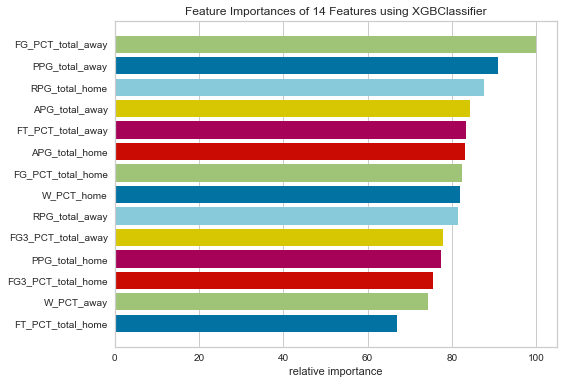

---------------------------------------------
i=12
FG3:

Best XGBoost accuracy ({}): 0.62
              precision    recall  f1-score   support

           0       0.66      0.64      0.65       337
           1       0.59      0.61      0.60       287

    accuracy                           0.62       624
   macro avg       0.62      0.62      0.62       624
weighted avg       0.63      0.62      0.63       624



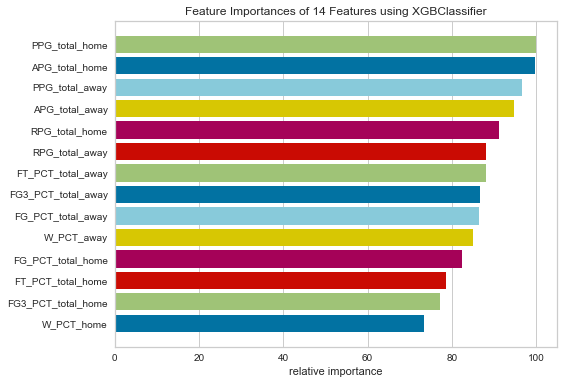

---------------------------------------------
i=13
FG3:

Best XGBoost accuracy ({}): 0.62
              precision    recall  f1-score   support

           0       0.62      0.64      0.63       318
           1       0.62      0.60      0.61       306

    accuracy                           0.62       624
   macro avg       0.62      0.62      0.62       624
weighted avg       0.62      0.62      0.62       624



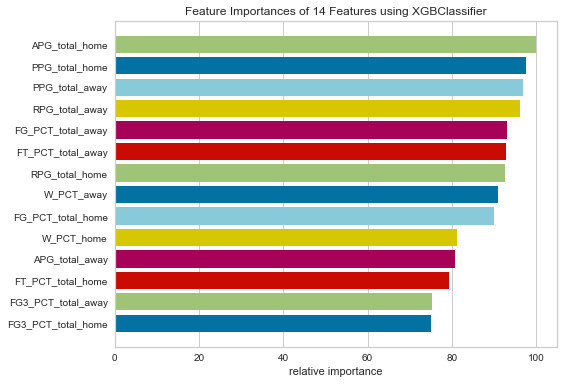

---------------------------------------------
i=14
FG3:

Best XGBoost accuracy ({}): 0.64
              precision    recall  f1-score   support

           0       0.66      0.64      0.65       326
           1       0.61      0.63      0.62       297

    accuracy                           0.64       623
   macro avg       0.64      0.64      0.64       623
weighted avg       0.64      0.64      0.64       623



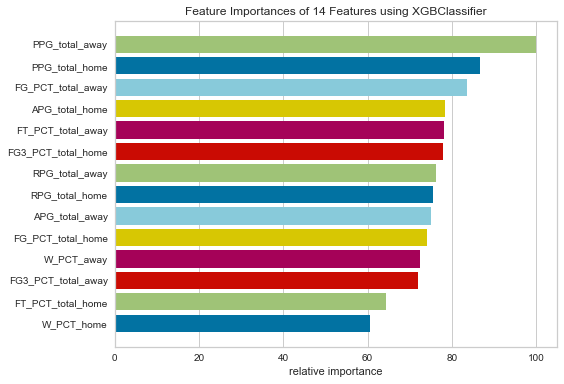

---------------------------------------------
Mean accuracy: 0.6322115384615385
Max accuracy: 0.6666666666666666
Min accuracy: 0.6169871794871795
i=15
FT:

Best XGBoost accuracy ({}): 0.61
              precision    recall  f1-score   support

           0       0.58      0.59      0.59       299
           1       0.63      0.62      0.63       336

    accuracy                           0.61       635
   macro avg       0.61      0.61      0.61       635
weighted avg       0.61      0.61      0.61       635



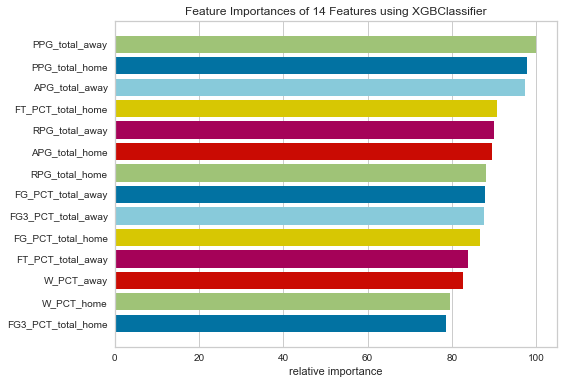

---------------------------------------------
i=16
FT:

Best XGBoost accuracy ({}): 0.64
              precision    recall  f1-score   support

           0       0.62      0.66      0.64       306
           1       0.66      0.62      0.64       329

    accuracy                           0.64       635
   macro avg       0.64      0.64      0.64       635
weighted avg       0.64      0.64      0.64       635



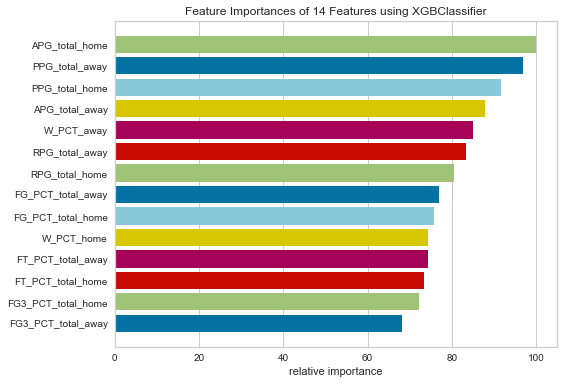

---------------------------------------------
i=17
FT:

Best XGBoost accuracy ({}): 0.66
              precision    recall  f1-score   support

           0       0.69      0.64      0.66       331
           1       0.64      0.68      0.66       304

    accuracy                           0.66       635
   macro avg       0.66      0.66      0.66       635
weighted avg       0.66      0.66      0.66       635



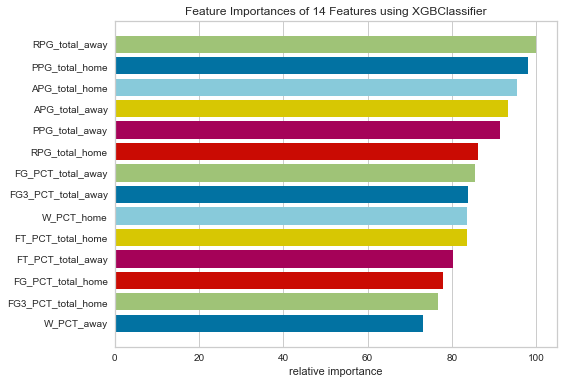

---------------------------------------------
i=18
FT:

Best XGBoost accuracy ({}): 0.66
              precision    recall  f1-score   support

           0       0.63      0.67      0.65       298
           1       0.69      0.65      0.67       337

    accuracy                           0.66       635
   macro avg       0.66      0.66      0.66       635
weighted avg       0.66      0.66      0.66       635



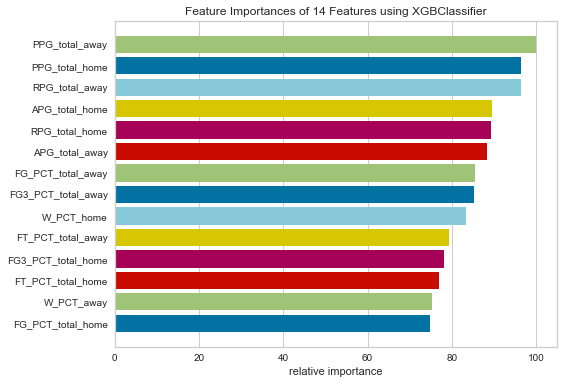

---------------------------------------------
i=19
FT:

Best XGBoost accuracy ({}): 0.63
              precision    recall  f1-score   support

           0       0.62      0.64      0.63       313
           1       0.64      0.62      0.63       322

    accuracy                           0.63       635
   macro avg       0.63      0.63      0.63       635
weighted avg       0.63      0.63      0.63       635



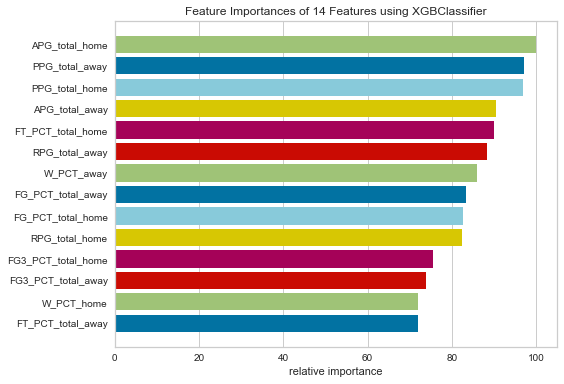

---------------------------------------------
Mean accuracy: 0.6429133858267716
Max accuracy: 0.6614173228346457
Min accuracy: 0.6094488188976378
i=20
AST:

Best XGBoost accuracy ({}): 0.65
              precision    recall  f1-score   support

           0       0.68      0.76      0.71       563
           1       0.59      0.49      0.54       402

    accuracy                           0.65       965
   macro avg       0.63      0.62      0.63       965
weighted avg       0.64      0.65      0.64       965



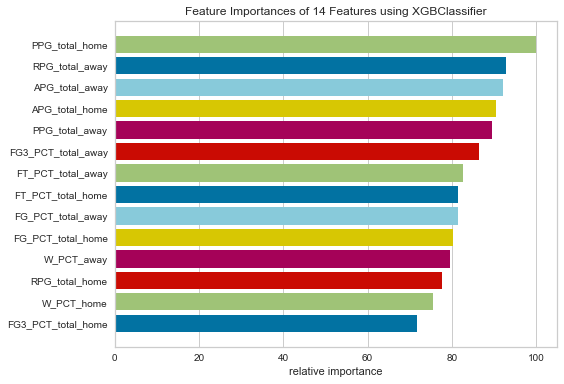

---------------------------------------------
i=21
AST:

Best XGBoost accuracy ({}): 0.68
              precision    recall  f1-score   support

           0       0.71      0.79      0.75       579
           1       0.62      0.50      0.56       385

    accuracy                           0.68       964
   macro avg       0.66      0.65      0.65       964
weighted avg       0.67      0.68      0.67       964



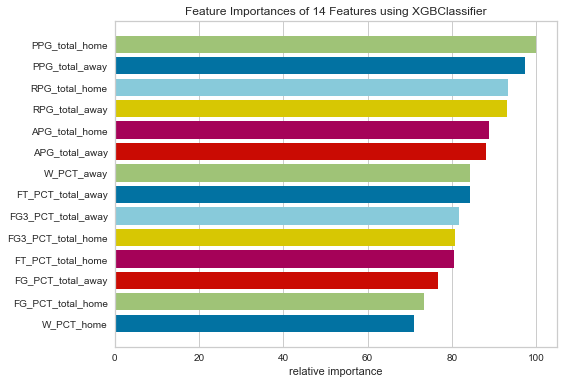

---------------------------------------------
i=22
AST:

Best XGBoost accuracy ({}): 0.64
              precision    recall  f1-score   support

           0       0.65      0.79      0.71       543
           1       0.62      0.45      0.52       421

    accuracy                           0.64       964
   macro avg       0.64      0.62      0.62       964
weighted avg       0.64      0.64      0.63       964



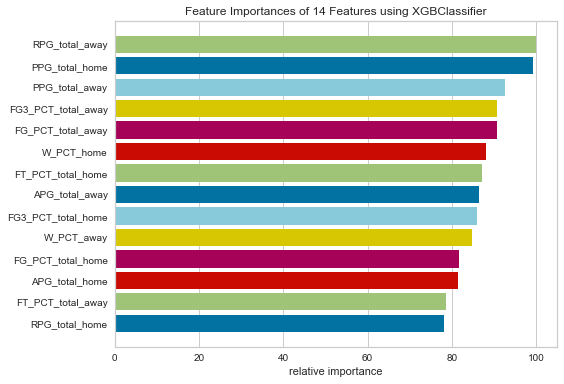

---------------------------------------------
i=23
AST:

Best XGBoost accuracy ({}): 0.69
              precision    recall  f1-score   support

           0       0.73      0.78      0.75       592
           1       0.60      0.53      0.57       372

    accuracy                           0.69       964
   macro avg       0.67      0.66      0.66       964
weighted avg       0.68      0.69      0.68       964



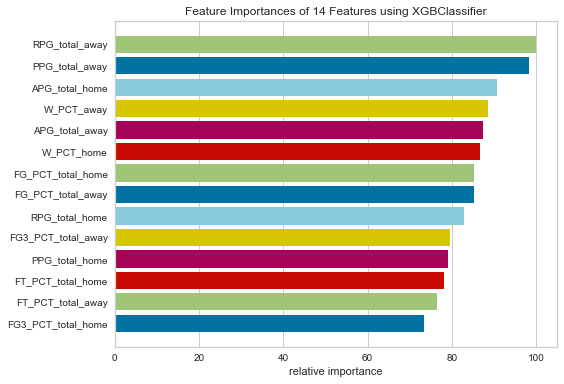

---------------------------------------------
i=24
AST:

Best XGBoost accuracy ({}): 0.68
              precision    recall  f1-score   support

           0       0.68      0.81      0.74       542
           1       0.68      0.51      0.58       422

    accuracy                           0.68       964
   macro avg       0.68      0.66      0.66       964
weighted avg       0.68      0.68      0.67       964



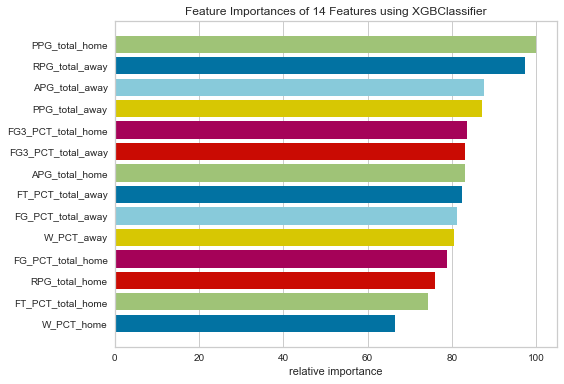

---------------------------------------------
Mean accuracy: 0.6629547115860082
Max accuracy: 0.6856846473029046
Min accuracy: 0.6421161825726142
i=25
REB:

Best XGBoost accuracy ({}): 0.63
              precision    recall  f1-score   support

           0       0.66      0.75      0.70       487
           1       0.57      0.46      0.51       348

    accuracy                           0.63       835
   macro avg       0.62      0.61      0.61       835
weighted avg       0.62      0.63      0.62       835



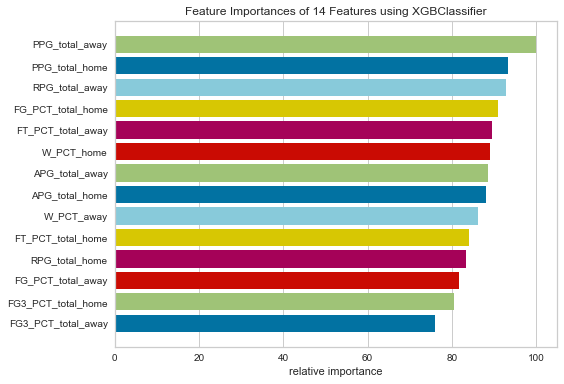

---------------------------------------------
i=26
REB:

Best XGBoost accuracy ({}): 0.64
              precision    recall  f1-score   support

           0       0.65      0.76      0.70       465
           1       0.62      0.49      0.54       370

    accuracy                           0.64       835
   macro avg       0.63      0.62      0.62       835
weighted avg       0.64      0.64      0.63       835



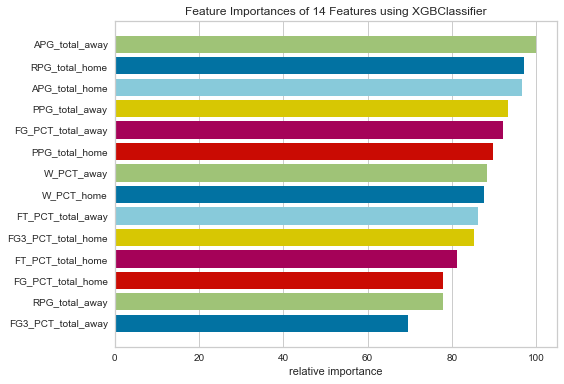

---------------------------------------------
i=27
REB:

Best XGBoost accuracy ({}): 0.64
              precision    recall  f1-score   support

           0       0.67      0.74      0.70       472
           1       0.60      0.52      0.56       363

    accuracy                           0.64       835
   macro avg       0.64      0.63      0.63       835
weighted avg       0.64      0.64      0.64       835



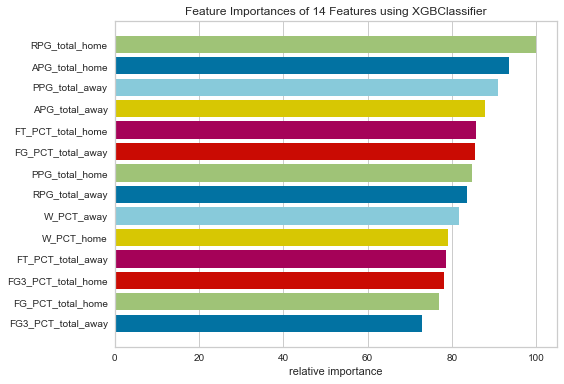

---------------------------------------------
i=28
REB:

Best XGBoost accuracy ({}): 0.66
              precision    recall  f1-score   support

           0       0.71      0.75      0.73       509
           1       0.57      0.52      0.54       326

    accuracy                           0.66       835
   macro avg       0.64      0.63      0.64       835
weighted avg       0.65      0.66      0.66       835



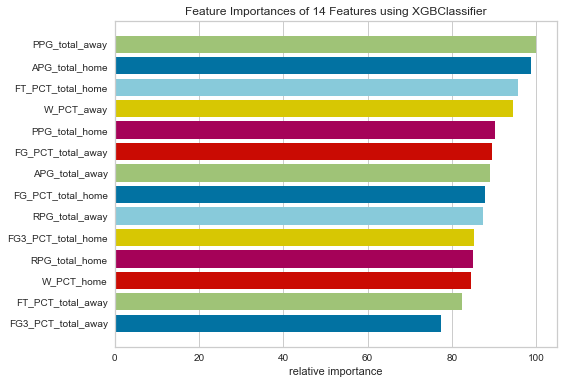

---------------------------------------------
i=29
REB:

Best XGBoost accuracy ({}): 0.64
              precision    recall  f1-score   support

           0       0.65      0.73      0.69       458
           1       0.62      0.53      0.57       377

    accuracy                           0.64       835
   macro avg       0.64      0.63      0.63       835
weighted avg       0.64      0.64      0.64       835



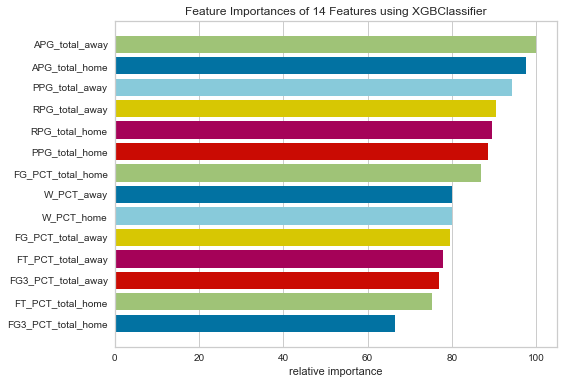

---------------------------------------------
Mean accuracy: 0.6434131736526946
Max accuracy: 0.6598802395209581
Min accuracy: 0.6311377245508982


In [20]:
print_cross_validated_and_plot(X_train_dicts, X_test_dicts, y_train_dicts, y_test_dicts, {})

## Try prune max depth

i=0
WINNER:

Best XGBoost accuracy ({'max_depth': 15}): 0.75
              precision    recall  f1-score   support

           0       0.76      0.88      0.82       892
           1       0.71      0.51      0.59       494

    accuracy                           0.75      1386
   macro avg       0.73      0.69      0.70      1386
weighted avg       0.74      0.75      0.74      1386



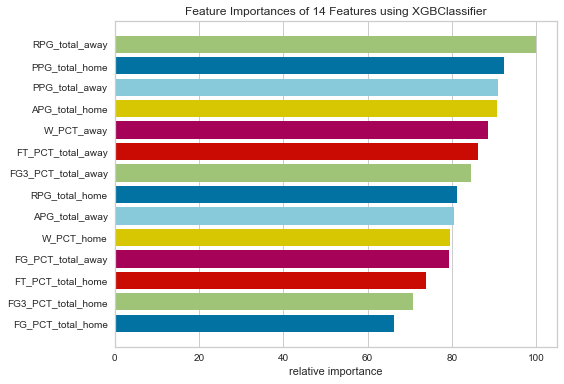

---------------------------------------------
i=1
WINNER:

Best XGBoost accuracy ({'max_depth': 19}): 0.75
              precision    recall  f1-score   support

           0       0.75      0.89      0.81       863
           1       0.74      0.50      0.60       523

    accuracy                           0.75      1386
   macro avg       0.74      0.70      0.71      1386
weighted avg       0.74      0.75      0.73      1386



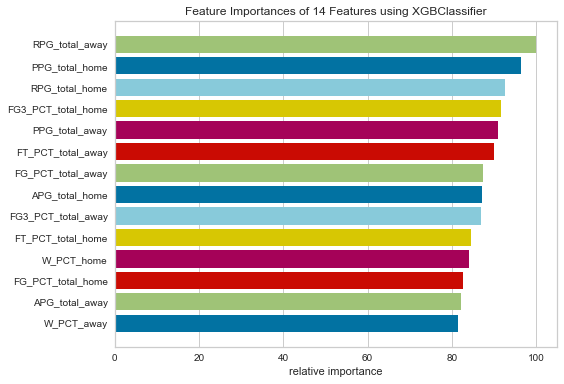

---------------------------------------------
i=2
WINNER:

Best XGBoost accuracy ({'max_depth': 19}): 0.75
              precision    recall  f1-score   support

           0       0.76      0.90      0.82       881
           1       0.74      0.50      0.60       505

    accuracy                           0.75      1386
   macro avg       0.75      0.70      0.71      1386
weighted avg       0.75      0.75      0.74      1386



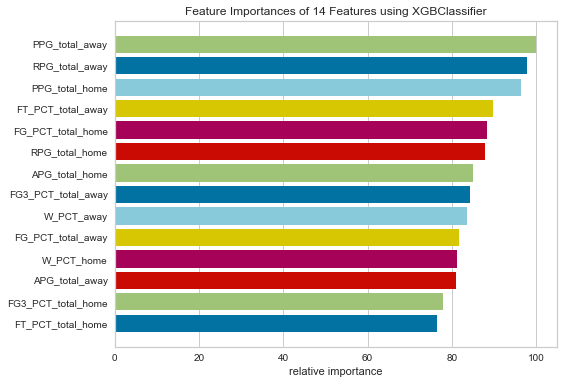

---------------------------------------------
i=3
WINNER:

Best XGBoost accuracy ({'max_depth': 10}): 0.71
              precision    recall  f1-score   support

           0       0.72      0.87      0.79       868
           1       0.68      0.44      0.54       518

    accuracy                           0.71      1386
   macro avg       0.70      0.66      0.66      1386
weighted avg       0.71      0.71      0.70      1386



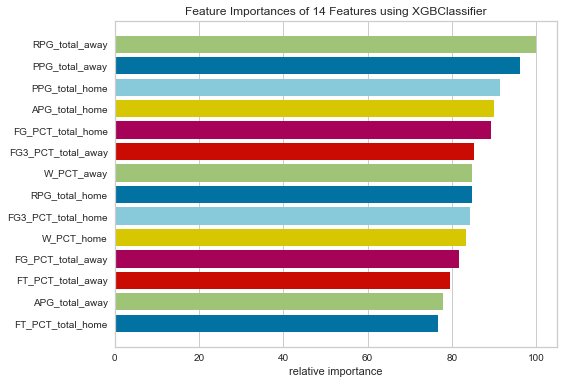

---------------------------------------------
i=4
WINNER:

Best XGBoost accuracy ({'max_depth': 19}): 0.76
              precision    recall  f1-score   support

           0       0.76      0.90      0.83       889
           1       0.73      0.50      0.60       496

    accuracy                           0.76      1385
   macro avg       0.75      0.70      0.71      1385
weighted avg       0.75      0.76      0.74      1385



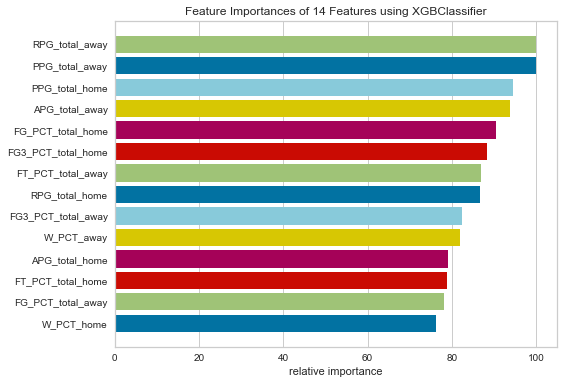

---------------------------------------------
Mean accuracy: 0.7404401154401155
Max accuracy: 0.753968253968254
Min accuracy: 0.7135642135642135
i=5
FGP:

Best XGBoost accuracy ({'max_depth': 12}): 0.66
              precision    recall  f1-score   support

           0       0.67      0.80      0.73       568
           1       0.63      0.46      0.53       410

    accuracy                           0.66       978
   macro avg       0.65      0.63      0.63       978
weighted avg       0.65      0.66      0.65       978



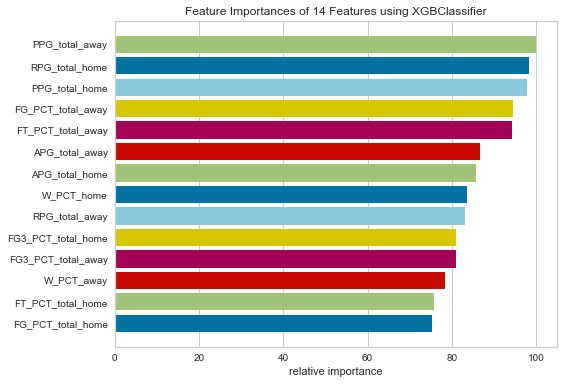

---------------------------------------------
i=6
FGP:

Best XGBoost accuracy ({'max_depth': 14}): 0.71
              precision    recall  f1-score   support

           0       0.74      0.82      0.78       621
           1       0.62      0.51      0.56       357

    accuracy                           0.71       978
   macro avg       0.68      0.66      0.67       978
weighted avg       0.70      0.71      0.70       978



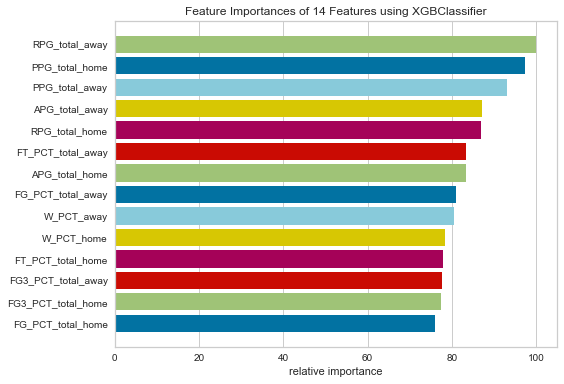

---------------------------------------------
i=7
FGP:

Best XGBoost accuracy ({'max_depth': 15}): 0.65
              precision    recall  f1-score   support

           0       0.66      0.80      0.72       556
           1       0.63      0.45      0.53       421

    accuracy                           0.65       977
   macro avg       0.65      0.63      0.63       977
weighted avg       0.65      0.65      0.64       977



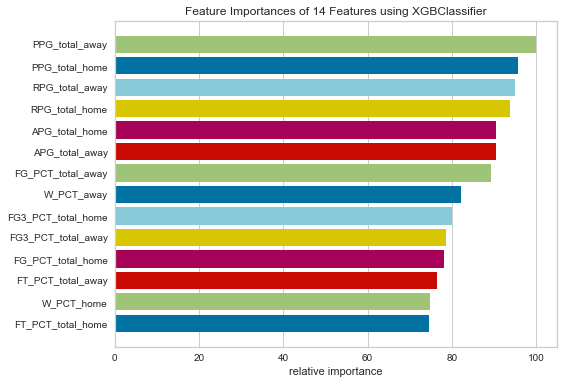

---------------------------------------------
i=8
FGP:

Best XGBoost accuracy ({'max_depth': 13}): 0.67
              precision    recall  f1-score   support

           0       0.71      0.79      0.75       597
           1       0.59      0.49      0.54       380

    accuracy                           0.67       977
   macro avg       0.65      0.64      0.64       977
weighted avg       0.66      0.67      0.66       977



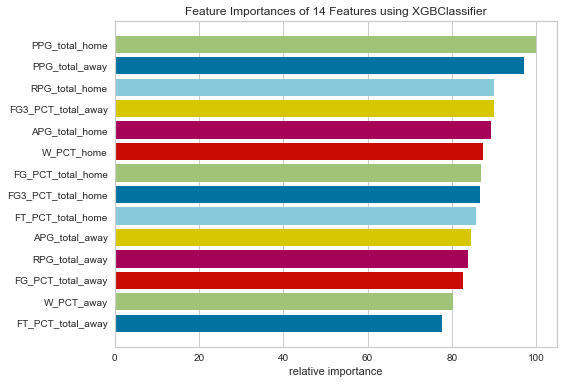

---------------------------------------------
i=9
FGP:

Best XGBoost accuracy ({'max_depth': 23}): 0.70
              precision    recall  f1-score   support

           0       0.71      0.82      0.76       568
           1       0.69      0.54      0.60       409

    accuracy                           0.70       977
   macro avg       0.70      0.68      0.68       977
weighted avg       0.70      0.70      0.70       977



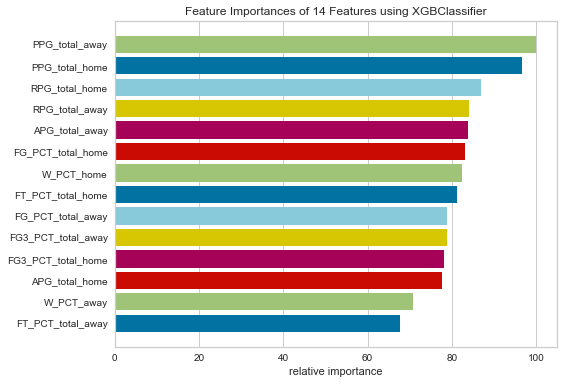

---------------------------------------------
Mean accuracy: 0.6718615581691795
Max accuracy: 0.7055214723926381
Min accuracy: 0.6509723643807575
i=10
FG3:

Best XGBoost accuracy ({'max_depth': 15}): 0.66
              precision    recall  f1-score   support

           0       0.67      0.73      0.70       332
           1       0.65      0.59      0.62       292

    accuracy                           0.66       624
   macro avg       0.66      0.66      0.66       624
weighted avg       0.66      0.66      0.66       624



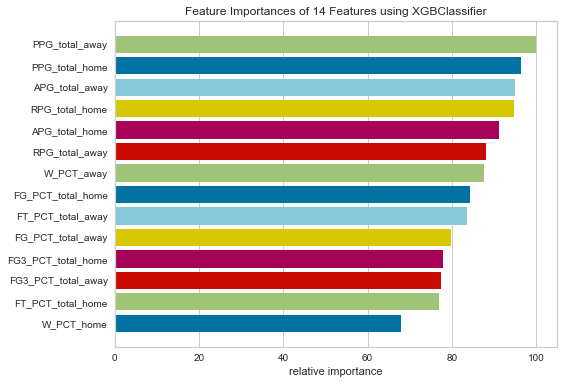

---------------------------------------------
i=11
FG3:

Best XGBoost accuracy ({'max_depth': 22}): 0.67
              precision    recall  f1-score   support

           0       0.66      0.72      0.69       316
           1       0.68      0.61      0.64       308

    accuracy                           0.67       624
   macro avg       0.67      0.67      0.67       624
weighted avg       0.67      0.67      0.67       624



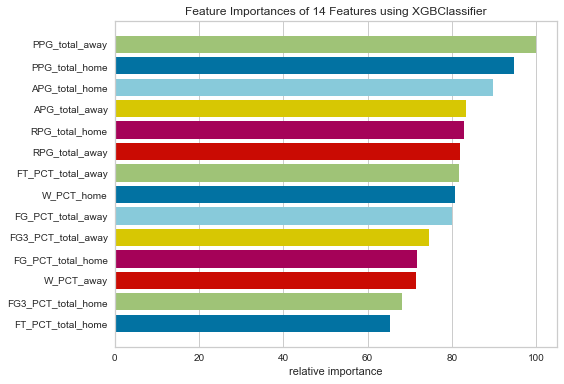

---------------------------------------------
i=12
FG3:

Best XGBoost accuracy ({'max_depth': 29}): 0.64
              precision    recall  f1-score   support

           0       0.67      0.66      0.67       337
           1       0.61      0.61      0.61       287

    accuracy                           0.64       624
   macro avg       0.64      0.64      0.64       624
weighted avg       0.64      0.64      0.64       624



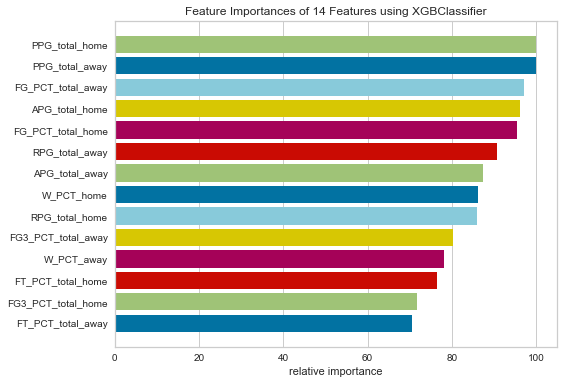

---------------------------------------------
i=13
FG3:

Best XGBoost accuracy ({'max_depth': 23}): 0.64
              precision    recall  f1-score   support

           0       0.64      0.67      0.65       318
           1       0.64      0.61      0.62       306

    accuracy                           0.64       624
   macro avg       0.64      0.64      0.64       624
weighted avg       0.64      0.64      0.64       624



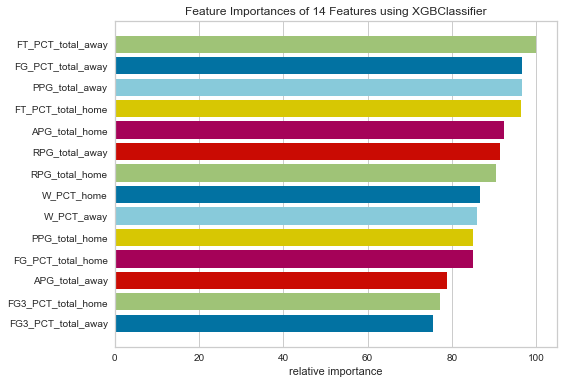

---------------------------------------------
i=14
FG3:

Best XGBoost accuracy ({'max_depth': 17}): 0.67
              precision    recall  f1-score   support

           0       0.67      0.71      0.69       326
           1       0.66      0.62      0.64       297

    accuracy                           0.67       623
   macro avg       0.67      0.67      0.67       623
weighted avg       0.67      0.67      0.67       623



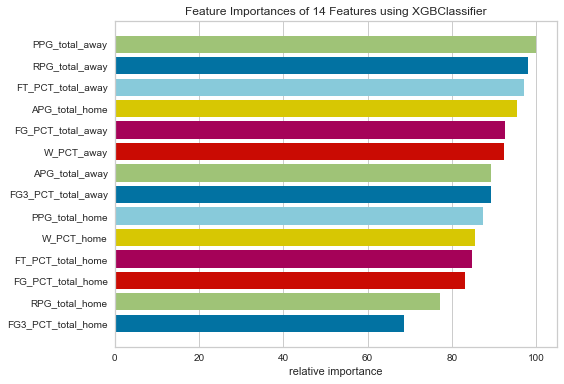

---------------------------------------------
Mean accuracy: 0.6518429487179487
Max accuracy: 0.6682692307692307
Min accuracy: 0.6378205128205128
i=15
FT:

Best XGBoost accuracy ({'max_depth': 6}): 0.61
              precision    recall  f1-score   support

           0       0.58      0.59      0.59       299
           1       0.63      0.62      0.63       336

    accuracy                           0.61       635
   macro avg       0.61      0.61      0.61       635
weighted avg       0.61      0.61      0.61       635



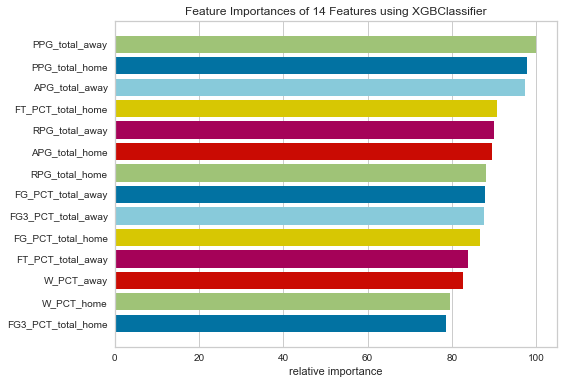

---------------------------------------------
i=16
FT:

Best XGBoost accuracy ({'max_depth': 12}): 0.66
              precision    recall  f1-score   support

           0       0.65      0.64      0.64       306
           1       0.67      0.68      0.67       329

    accuracy                           0.66       635
   macro avg       0.66      0.66      0.66       635
weighted avg       0.66      0.66      0.66       635



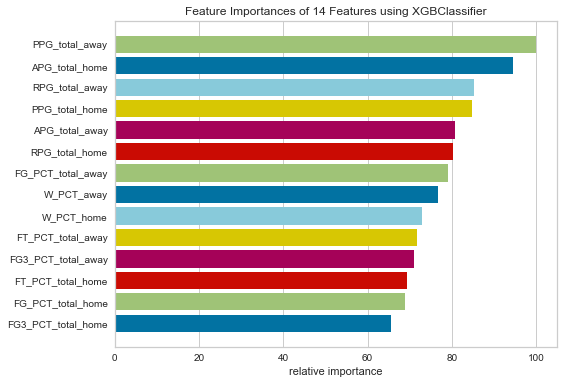

---------------------------------------------
i=17
FT:

Best XGBoost accuracy ({'max_depth': 19}): 0.65
              precision    recall  f1-score   support

           0       0.67      0.64      0.66       331
           1       0.63      0.65      0.64       304

    accuracy                           0.65       635
   macro avg       0.65      0.65      0.65       635
weighted avg       0.65      0.65      0.65       635



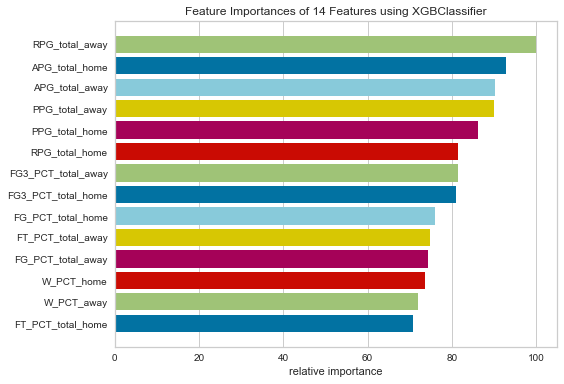

---------------------------------------------
i=18
FT:

Best XGBoost accuracy ({'max_depth': 23}): 0.66
              precision    recall  f1-score   support

           0       0.64      0.65      0.64       298
           1       0.68      0.67      0.68       337

    accuracy                           0.66       635
   macro avg       0.66      0.66      0.66       635
weighted avg       0.66      0.66      0.66       635



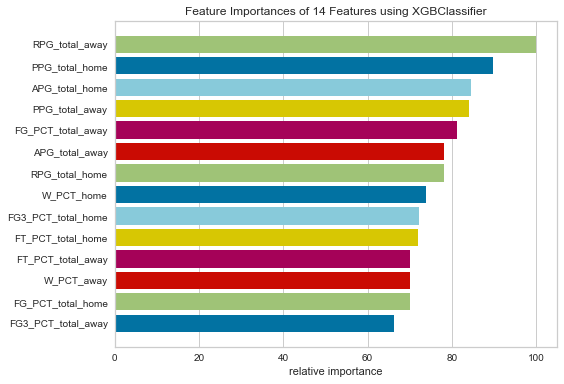

---------------------------------------------
i=19
FT:

Best XGBoost accuracy ({'max_depth': 4}): 0.61
              precision    recall  f1-score   support

           0       0.60      0.59      0.60       313
           1       0.61      0.62      0.62       322

    accuracy                           0.61       635
   macro avg       0.61      0.61      0.61       635
weighted avg       0.61      0.61      0.61       635



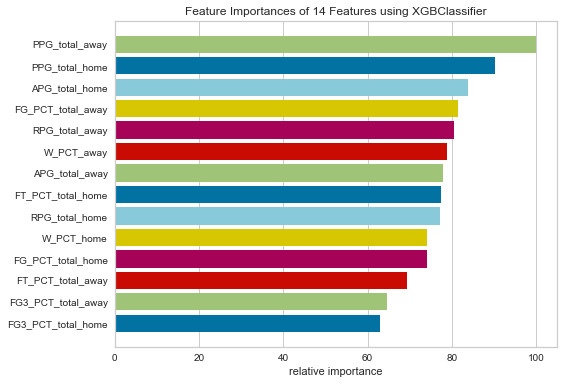

---------------------------------------------
Mean accuracy: 0.6444881889763779
Max accuracy: 0.6614173228346457
Min accuracy: 0.6094488188976378
i=20
AST:

Best XGBoost accuracy ({'max_depth': 18}): 0.70
              precision    recall  f1-score   support

           0       0.71      0.81      0.76       563
           1       0.67      0.53      0.59       402

    accuracy                           0.70       965
   macro avg       0.69      0.67      0.68       965
weighted avg       0.69      0.70      0.69       965



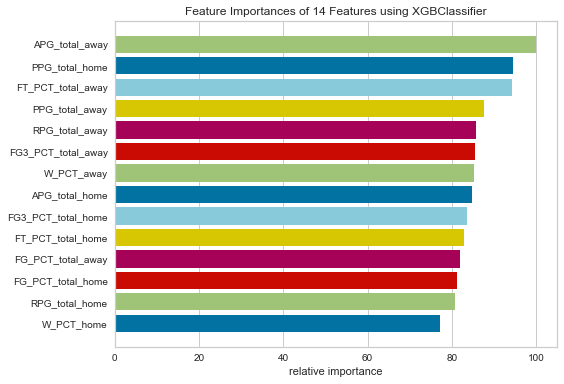

---------------------------------------------
i=21
AST:

Best XGBoost accuracy ({'max_depth': 29}): 0.72
              precision    recall  f1-score   support

           0       0.74      0.83      0.78       579
           1       0.68      0.56      0.61       385

    accuracy                           0.72       964
   macro avg       0.71      0.69      0.69       964
weighted avg       0.71      0.72      0.71       964



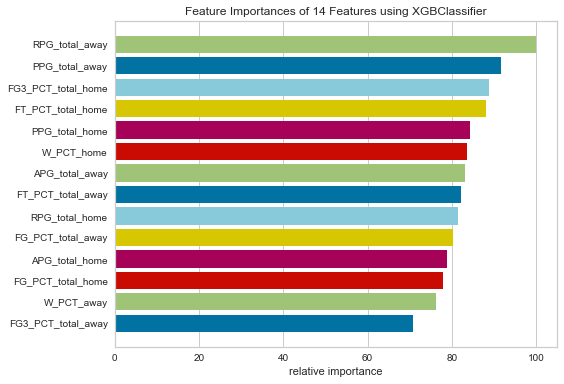

---------------------------------------------
i=22
AST:

Best XGBoost accuracy ({'max_depth': 27}): 0.68
              precision    recall  f1-score   support

           0       0.68      0.82      0.74       543
           1       0.69      0.50      0.58       421

    accuracy                           0.68       964
   macro avg       0.68      0.66      0.66       964
weighted avg       0.68      0.68      0.67       964



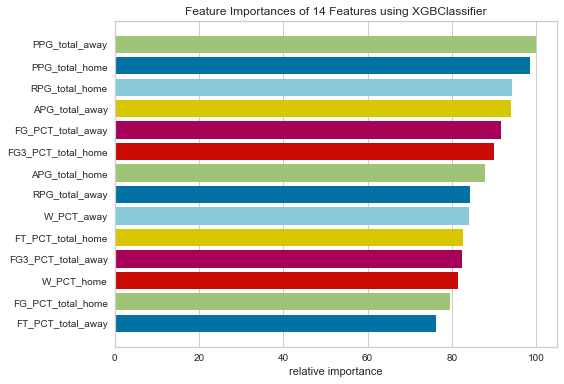

---------------------------------------------
i=23
AST:

Best XGBoost accuracy ({'max_depth': 15}): 0.72
              precision    recall  f1-score   support

           0       0.75      0.82      0.78       592
           1       0.66      0.56      0.61       372

    accuracy                           0.72       964
   macro avg       0.70      0.69      0.70       964
weighted avg       0.71      0.72      0.72       964



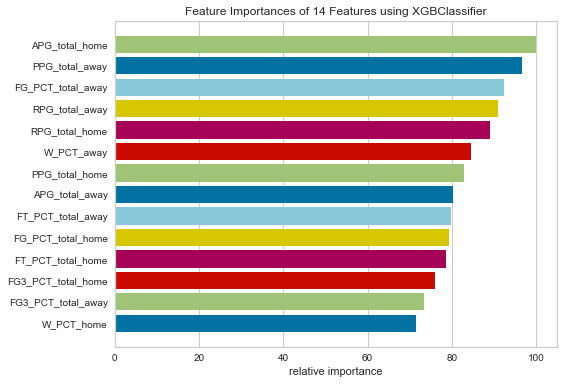

---------------------------------------------
i=24
AST:

Best XGBoost accuracy ({'max_depth': 25}): 0.70
              precision    recall  f1-score   support

           0       0.70      0.84      0.76       542
           1       0.72      0.53      0.61       422

    accuracy                           0.70       964
   macro avg       0.71      0.68      0.69       964
weighted avg       0.71      0.70      0.70       964



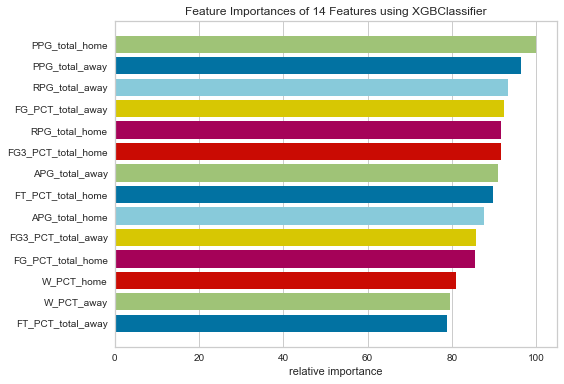

---------------------------------------------
Mean accuracy: 0.7039169157009868
Max accuracy: 0.7199170124481328
Min accuracy: 0.6815352697095436
i=25
REB:

Best XGBoost accuracy ({'max_depth': 19}): 0.68
              precision    recall  f1-score   support

           0       0.70      0.79      0.74       487
           1       0.64      0.52      0.58       348

    accuracy                           0.68       835
   macro avg       0.67      0.66      0.66       835
weighted avg       0.67      0.68      0.67       835



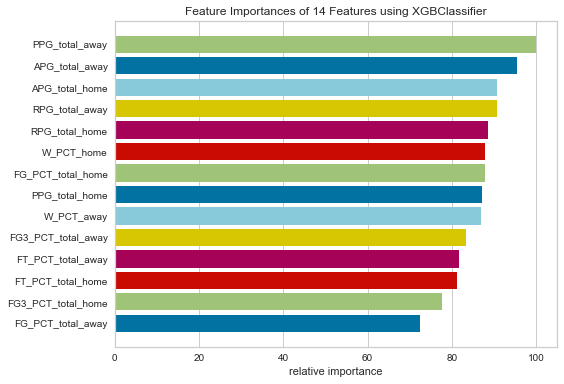

---------------------------------------------
i=26
REB:

Best XGBoost accuracy ({'max_depth': 7}): 0.67
              precision    recall  f1-score   support

           0       0.67      0.80      0.73       465
           1       0.67      0.51      0.58       370

    accuracy                           0.67       835
   macro avg       0.67      0.66      0.66       835
weighted avg       0.67      0.67      0.67       835



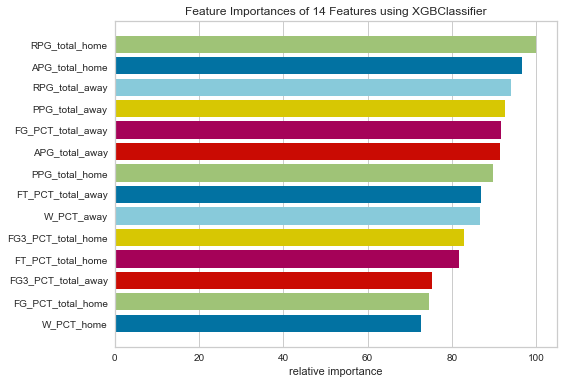

---------------------------------------------
i=27
REB:

Best XGBoost accuracy ({'max_depth': 24}): 0.67
              precision    recall  f1-score   support

           0       0.69      0.75      0.72       472
           1       0.64      0.56      0.60       363

    accuracy                           0.67       835
   macro avg       0.66      0.66      0.66       835
weighted avg       0.67      0.67      0.67       835



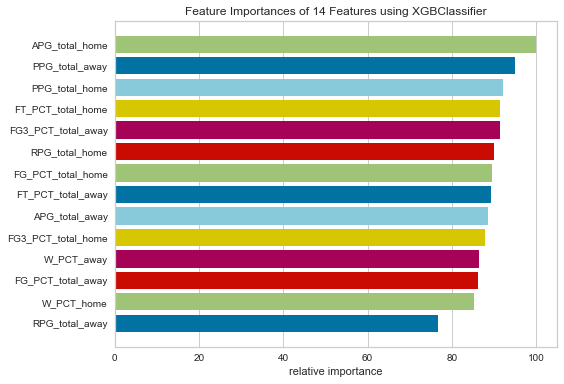

---------------------------------------------
i=28
REB:

Best XGBoost accuracy ({'max_depth': 16}): 0.69
              precision    recall  f1-score   support

           0       0.73      0.76      0.75       509
           1       0.60      0.57      0.59       326

    accuracy                           0.69       835
   macro avg       0.67      0.67      0.67       835
weighted avg       0.68      0.69      0.68       835



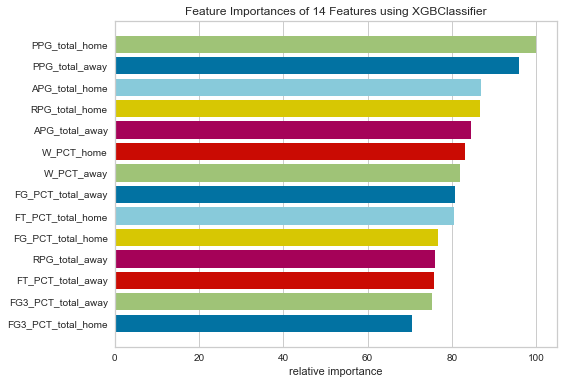

---------------------------------------------
i=29
REB:

Best XGBoost accuracy ({'max_depth': 19}): 0.66
              precision    recall  f1-score   support

           0       0.67      0.77      0.72       458
           1       0.66      0.53      0.59       377

    accuracy                           0.66       835
   macro avg       0.66      0.65      0.65       835
weighted avg       0.66      0.66      0.66       835



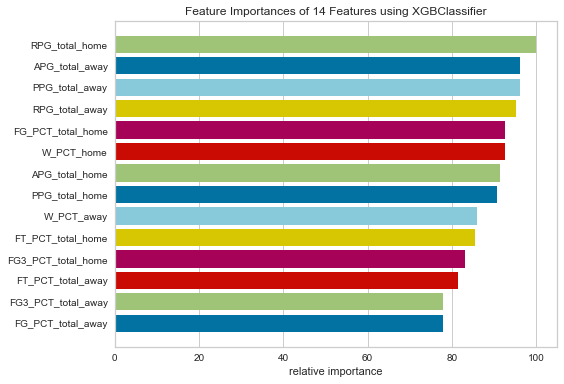

---------------------------------------------
Mean accuracy: 0.6766467065868265
Max accuracy: 0.6862275449101797
Min accuracy: 0.6694610778443114


In [21]:
print_cross_validated_and_plot(X_train_dicts, X_test_dicts, y_train_dicts, y_test_dicts, {
    'max_depth': [*range(3,30)],
})

## Try prune reg_lambda

i=0
WINNER:

Best XGBoost accuracy ({'reg_lambda': 0.25}): 0.70
              precision    recall  f1-score   support

           0       0.73      0.83      0.78       871
           1       0.61      0.45      0.52       497

    accuracy                           0.70      1368
   macro avg       0.67      0.64      0.65      1368
weighted avg       0.68      0.70      0.68      1368



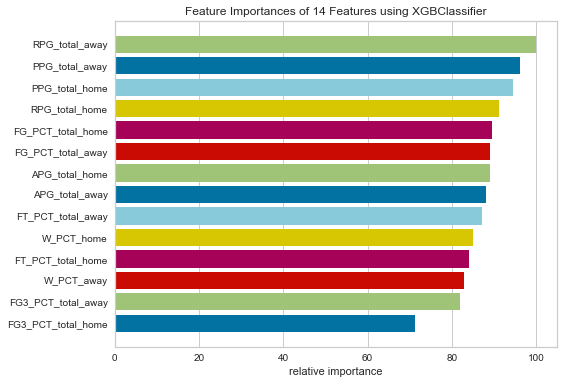

---------------------------------------------
i=1
WINNER:

Best XGBoost accuracy ({'reg_lambda': 0.35}): 0.69
              precision    recall  f1-score   support

           0       0.71      0.85      0.77       844
           1       0.64      0.44      0.52       524

    accuracy                           0.69      1368
   macro avg       0.68      0.64      0.65      1368
weighted avg       0.68      0.69      0.68      1368



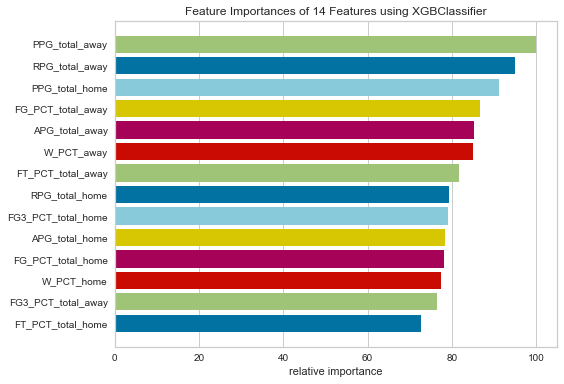

---------------------------------------------
i=2
WINNER:

Best XGBoost accuracy ({'reg_lambda': 0.75}): 0.71
              precision    recall  f1-score   support

           0       0.73      0.86      0.79       863
           1       0.65      0.46      0.54       504

    accuracy                           0.71      1367
   macro avg       0.69      0.66      0.66      1367
weighted avg       0.70      0.71      0.70      1367



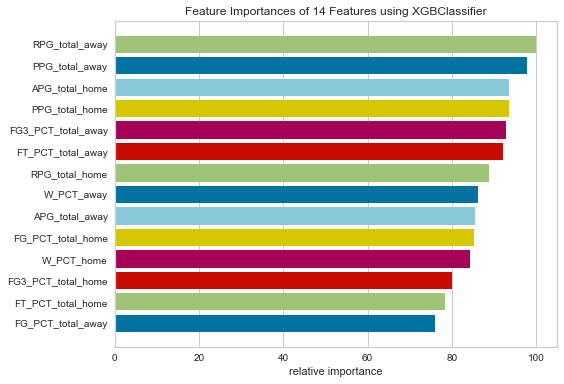

---------------------------------------------
i=3
WINNER:

Best XGBoost accuracy ({'reg_lambda': 0.7}): 0.71
              precision    recall  f1-score   support

           0       0.73      0.85      0.78       860
           1       0.64      0.46      0.54       507

    accuracy                           0.71      1367
   macro avg       0.69      0.66      0.66      1367
weighted avg       0.70      0.71      0.69      1367



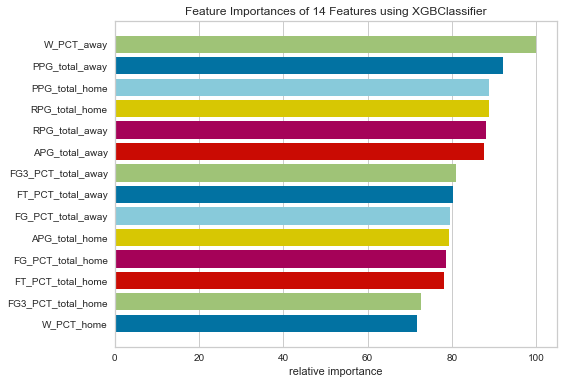

---------------------------------------------
i=4
WINNER:

Best XGBoost accuracy ({'reg_lambda': 0.5}): 0.70
              precision    recall  f1-score   support

           0       0.72      0.86      0.79       864
           1       0.64      0.44      0.52       503

    accuracy                           0.70      1367
   macro avg       0.68      0.65      0.65      1367
weighted avg       0.70      0.70      0.69      1367



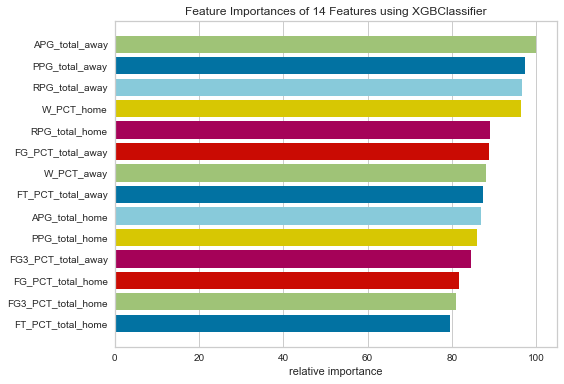

---------------------------------------------
Mean accuracy: 0.7007340956634454
Max accuracy: 0.7110460863204097
Min accuracy: 0.6907894736842105
i=5
FGP:

Best XGBoost accuracy ({'reg_lambda': 0.8}): 0.67
              precision    recall  f1-score   support

           0       0.70      0.77      0.73       591
           1       0.60      0.51      0.55       393

    accuracy                           0.67       984
   macro avg       0.65      0.64      0.64       984
weighted avg       0.66      0.67      0.66       984



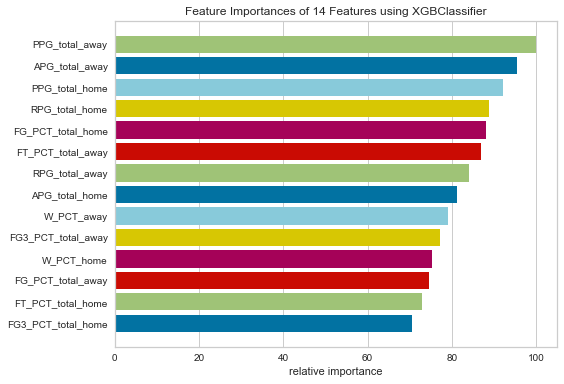

---------------------------------------------
i=6
FGP:

Best XGBoost accuracy ({'reg_lambda': 0.8}): 0.67
              precision    recall  f1-score   support

           0       0.70      0.82      0.75       598
           1       0.62      0.44      0.52       386

    accuracy                           0.67       984
   macro avg       0.66      0.63      0.63       984
weighted avg       0.66      0.67      0.66       984



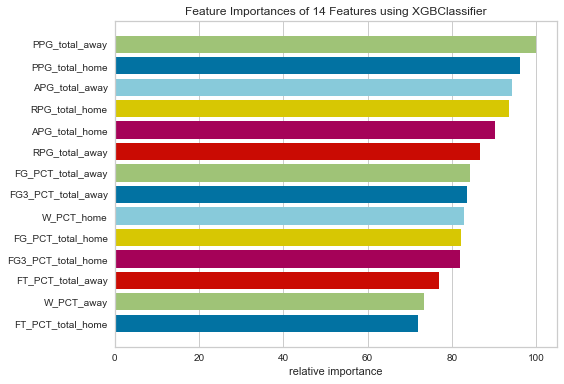

---------------------------------------------
i=7
FGP:

Best XGBoost accuracy ({'reg_lambda': 0.55}): 0.65
              precision    recall  f1-score   support

           0       0.66      0.80      0.73       570
           1       0.62      0.44      0.51       414

    accuracy                           0.65       984
   macro avg       0.64      0.62      0.62       984
weighted avg       0.64      0.65      0.64       984



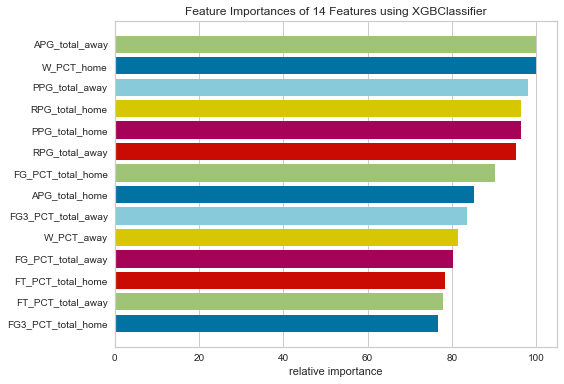

---------------------------------------------
i=8
FGP:

Best XGBoost accuracy ({'reg_lambda': 0.6}): 0.68
              precision    recall  f1-score   support

           0       0.70      0.82      0.76       603
           1       0.61      0.45      0.52       381

    accuracy                           0.68       984
   macro avg       0.66      0.63      0.64       984
weighted avg       0.67      0.68      0.66       984



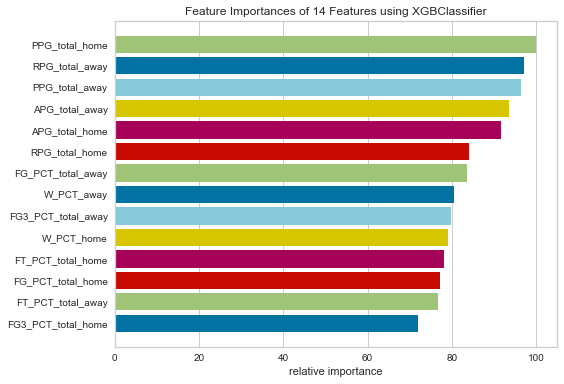

---------------------------------------------
i=9
FGP:

Best XGBoost accuracy ({'reg_lambda': 0.55}): 0.68
              precision    recall  f1-score   support

           0       0.68      0.83      0.75       567
           1       0.68      0.48      0.56       417

    accuracy                           0.68       984
   macro avg       0.68      0.66      0.66       984
weighted avg       0.68      0.68      0.67       984



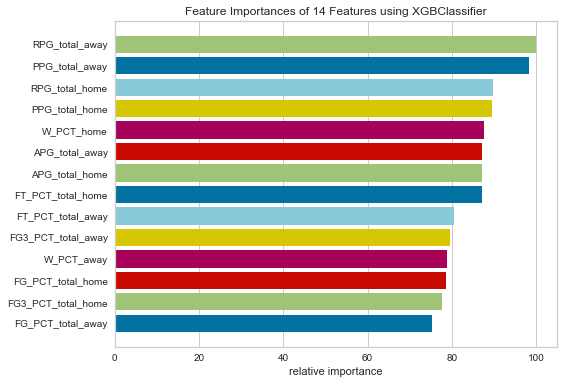

---------------------------------------------
Mean accuracy: 0.6661585365853658
Max accuracy: 0.676829268292683
Min accuracy: 0.649390243902439
i=10
FG3:

Best XGBoost accuracy ({'reg_lambda': 0.45}): 0.63
              precision    recall  f1-score   support

           0       0.63      0.70      0.66       322
           1       0.64      0.57      0.60       303

    accuracy                           0.63       625
   macro avg       0.63      0.63      0.63       625
weighted avg       0.63      0.63      0.63       625



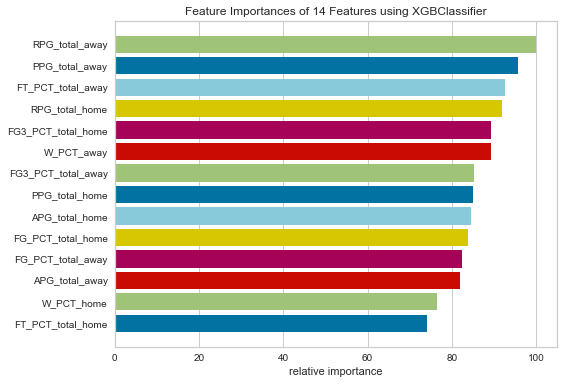

---------------------------------------------
i=11
FG3:

Best XGBoost accuracy ({'reg_lambda': 0.35}): 0.62
              precision    recall  f1-score   support

           0       0.63      0.67      0.65       326
           1       0.61      0.57      0.59       299

    accuracy                           0.62       625
   macro avg       0.62      0.62      0.62       625
weighted avg       0.62      0.62      0.62       625



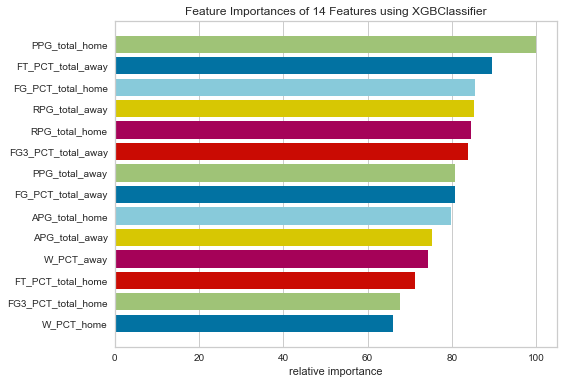

---------------------------------------------
i=12
FG3:

Best XGBoost accuracy ({'reg_lambda': 0.4}): 0.59
              precision    recall  f1-score   support

           0       0.62      0.60      0.61       336
           1       0.55      0.57      0.56       288

    accuracy                           0.59       624
   macro avg       0.58      0.59      0.58       624
weighted avg       0.59      0.59      0.59       624



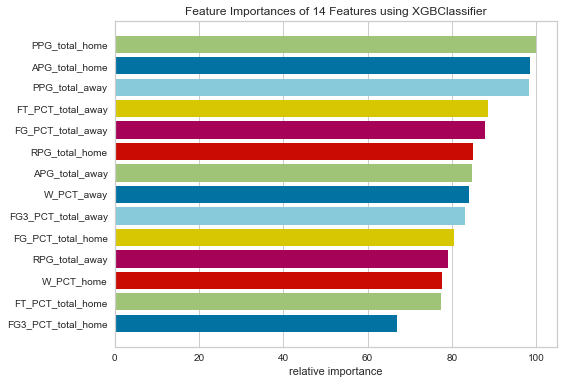

---------------------------------------------
i=13
FG3:

Best XGBoost accuracy ({'reg_lambda': 0.0}): 0.62
              precision    recall  f1-score   support

           0       0.62      0.65      0.63       315
           1       0.62      0.59      0.61       309

    accuracy                           0.62       624
   macro avg       0.62      0.62      0.62       624
weighted avg       0.62      0.62      0.62       624



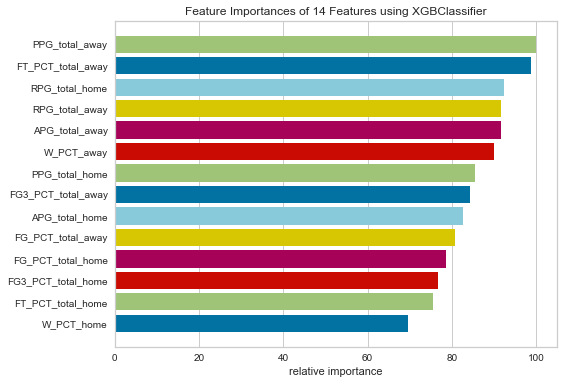

---------------------------------------------
i=14
FG3:

Best XGBoost accuracy ({'reg_lambda': 0.55}): 0.59
              precision    recall  f1-score   support

           0       0.61      0.62      0.62       325
           1       0.58      0.56      0.57       299

    accuracy                           0.59       624
   macro avg       0.59      0.59      0.59       624
weighted avg       0.59      0.59      0.59       624



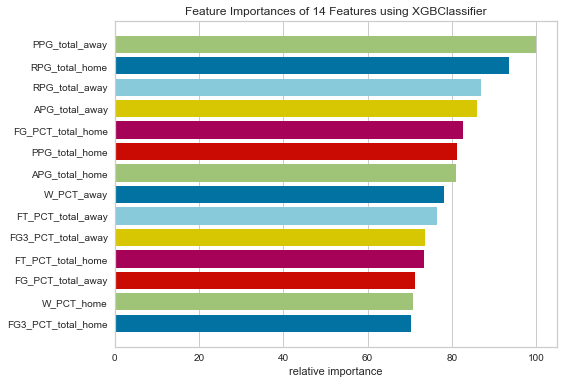

---------------------------------------------
Mean accuracy: 0.6152826923076924
Max accuracy: 0.6336
Min accuracy: 0.5865384615384616
i=15
FT:

Best XGBoost accuracy ({'reg_lambda': 0.45}): 0.65
              precision    recall  f1-score   support

           0       0.64      0.62      0.63       306
           1       0.65      0.67      0.66       325

    accuracy                           0.65       631
   macro avg       0.65      0.65      0.65       631
weighted avg       0.65      0.65      0.65       631



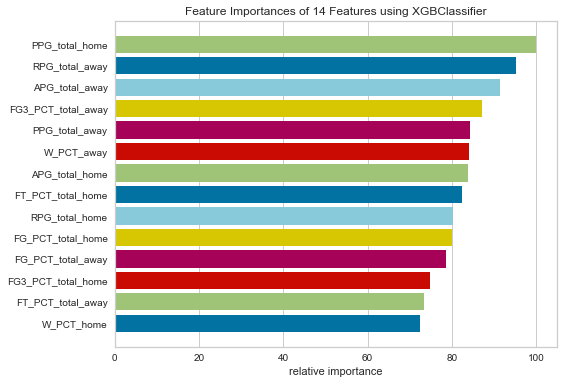

---------------------------------------------
i=16
FT:

Best XGBoost accuracy ({'reg_lambda': 0.5}): 0.63
              precision    recall  f1-score   support

           0       0.62      0.62      0.62       303
           1       0.65      0.64      0.64       328

    accuracy                           0.63       631
   macro avg       0.63      0.63      0.63       631
weighted avg       0.63      0.63      0.63       631



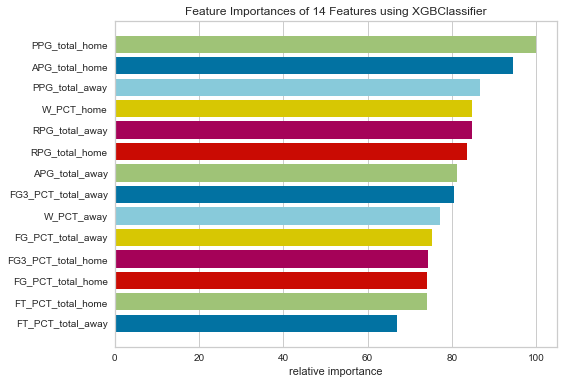

---------------------------------------------
i=17
FT:

Best XGBoost accuracy ({'reg_lambda': 0.75}): 0.67
              precision    recall  f1-score   support

           0       0.72      0.61      0.66       331
           1       0.63      0.73      0.68       299

    accuracy                           0.67       630
   macro avg       0.67      0.67      0.67       630
weighted avg       0.67      0.67      0.67       630



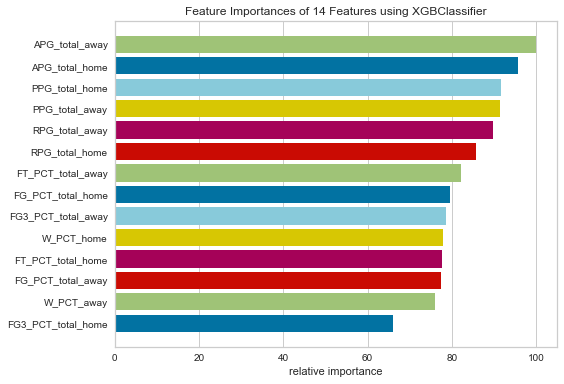

---------------------------------------------
i=18
FT:

Best XGBoost accuracy ({'reg_lambda': 0.65}): 0.65
              precision    recall  f1-score   support

           0       0.63      0.60      0.61       297
           1       0.66      0.69      0.68       333

    accuracy                           0.65       630
   macro avg       0.65      0.64      0.65       630
weighted avg       0.65      0.65      0.65       630



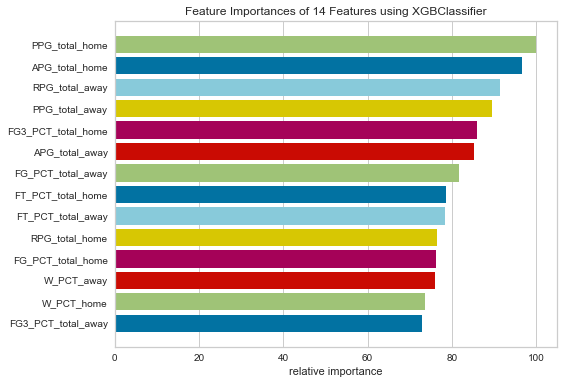

---------------------------------------------
i=19
FT:

Best XGBoost accuracy ({'reg_lambda': 0.85}): 0.61
              precision    recall  f1-score   support

           0       0.61      0.61      0.61       314
           1       0.61      0.62      0.62       316

    accuracy                           0.61       630
   macro avg       0.61      0.61      0.61       630
weighted avg       0.61      0.61      0.61       630



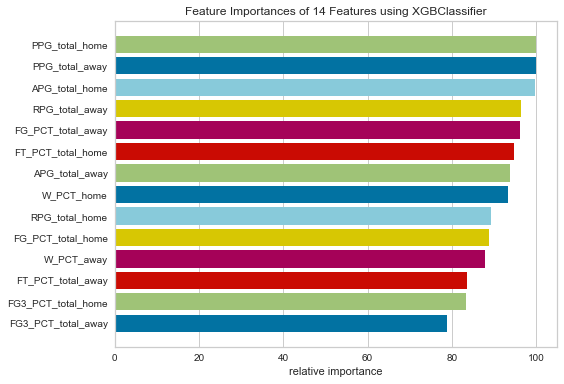

---------------------------------------------
Mean accuracy: 0.6483020149422685
Max accuracy: 0.6666666666666666
Min accuracy: 0.6323296354992076
i=20
AST:

Best XGBoost accuracy ({'reg_lambda': 0.9}): 0.64
              precision    recall  f1-score   support

           0       0.67      0.77      0.71       577
           1       0.57      0.44      0.50       399

    accuracy                           0.64       976
   macro avg       0.62      0.61      0.61       976
weighted avg       0.63      0.64      0.63       976



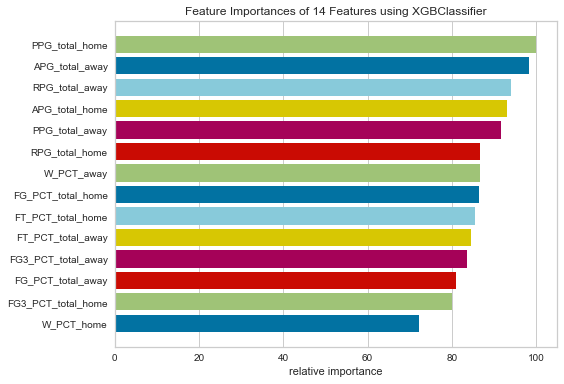

---------------------------------------------
i=21
AST:

Best XGBoost accuracy ({'reg_lambda': 0.0}): 0.67
              precision    recall  f1-score   support

           0       0.71      0.81      0.75       601
           1       0.60      0.46      0.52       375

    accuracy                           0.67       976
   macro avg       0.65      0.63      0.64       976
weighted avg       0.66      0.67      0.66       976



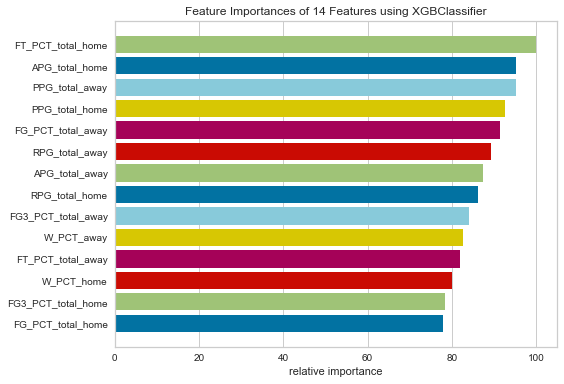

---------------------------------------------
i=22
AST:

Best XGBoost accuracy ({'reg_lambda': 0.85}): 0.68
              precision    recall  f1-score   support

           0       0.68      0.82      0.74       554
           1       0.68      0.49      0.57       421

    accuracy                           0.68       975
   macro avg       0.68      0.66      0.66       975
weighted avg       0.68      0.68      0.67       975



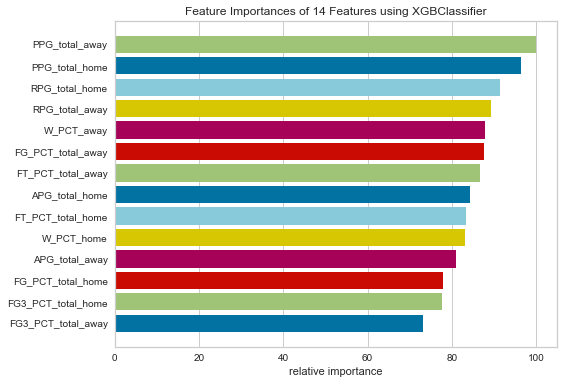

---------------------------------------------
i=23
AST:

Best XGBoost accuracy ({'reg_lambda': 0.3}): 0.65
              precision    recall  f1-score   support

           0       0.69      0.77      0.73       595
           1       0.57      0.46      0.51       380

    accuracy                           0.65       975
   macro avg       0.63      0.62      0.62       975
weighted avg       0.64      0.65      0.64       975



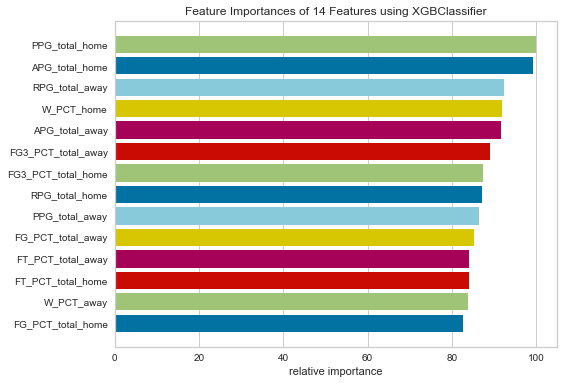

---------------------------------------------
i=24
AST:

Best XGBoost accuracy ({'reg_lambda': 0.8}): 0.65
              precision    recall  f1-score   support

           0       0.67      0.77      0.72       567
           1       0.60      0.48      0.54       408

    accuracy                           0.65       975
   macro avg       0.64      0.63      0.63       975
weighted avg       0.65      0.65      0.64       975



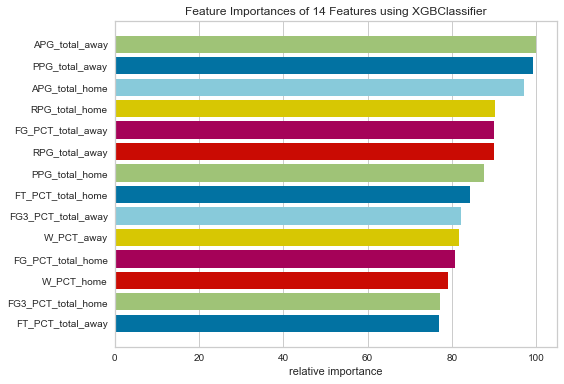

---------------------------------------------
Mean accuracy: 0.660177070197562
Max accuracy: 0.678974358974359
Min accuracy: 0.6352459016393442
i=25
REB:

Best XGBoost accuracy ({'reg_lambda': 0.75}): 0.66
              precision    recall  f1-score   support

           0       0.68      0.79      0.73       490
           1       0.62      0.49      0.55       350

    accuracy                           0.66       840
   macro avg       0.65      0.64      0.64       840
weighted avg       0.66      0.66      0.66       840



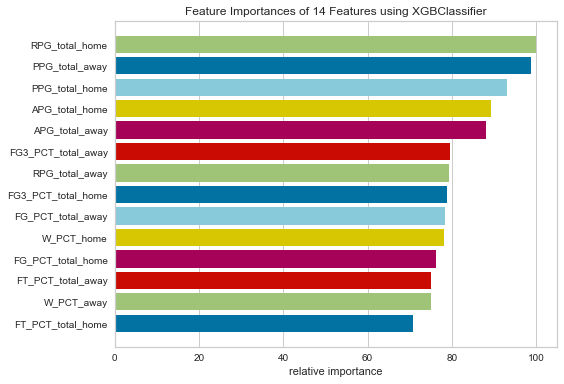

---------------------------------------------
i=26
REB:

Best XGBoost accuracy ({'reg_lambda': 1}): 0.66
              precision    recall  f1-score   support

           0       0.67      0.80      0.73       472
           1       0.65      0.49      0.56       368

    accuracy                           0.66       840
   macro avg       0.66      0.64      0.64       840
weighted avg       0.66      0.66      0.65       840



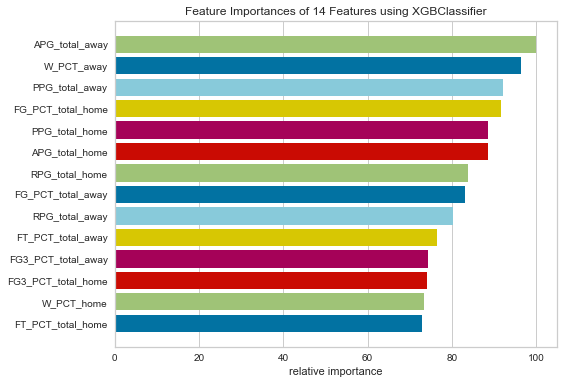

---------------------------------------------
i=27
REB:

Best XGBoost accuracy ({'reg_lambda': 0.65}): 0.67
              precision    recall  f1-score   support

           0       0.69      0.78      0.73       477
           1       0.65      0.53      0.58       363

    accuracy                           0.67       840
   macro avg       0.67      0.65      0.66       840
weighted avg       0.67      0.67      0.67       840



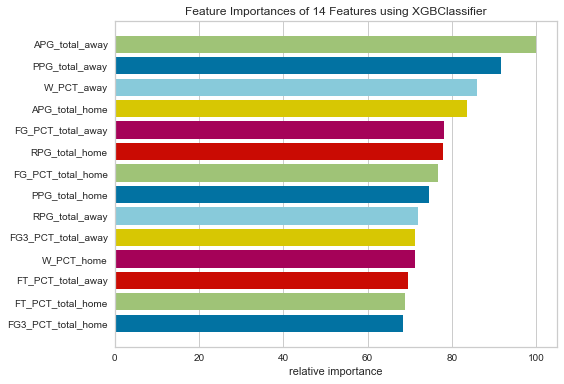

---------------------------------------------
i=28
REB:

Best XGBoost accuracy ({'reg_lambda': 0.25}): 0.64
              precision    recall  f1-score   support

           0       0.70      0.73      0.71       515
           1       0.54      0.50      0.52       325

    accuracy                           0.64       840
   macro avg       0.62      0.61      0.62       840
weighted avg       0.64      0.64      0.64       840



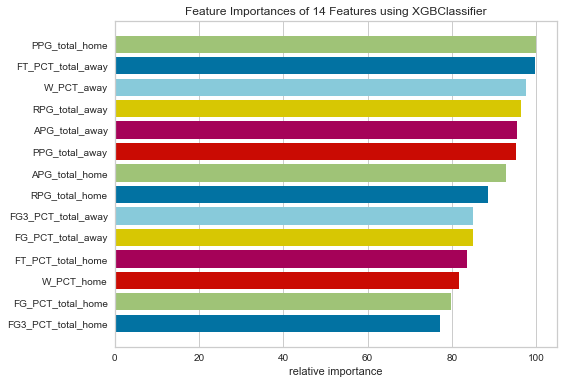

---------------------------------------------
i=29
REB:

Best XGBoost accuracy ({'reg_lambda': 0.8}): 0.65
              precision    recall  f1-score   support

           0       0.66      0.78      0.71       464
           1       0.64      0.50      0.56       375

    accuracy                           0.65       839
   macro avg       0.65      0.64      0.64       839
weighted avg       0.65      0.65      0.65       839



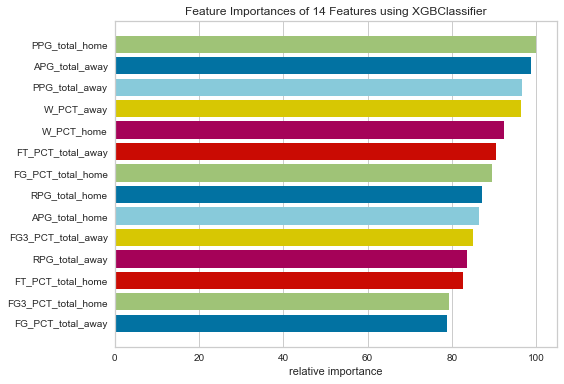

---------------------------------------------
Mean accuracy: 0.6595238095238095
Max accuracy: 0.6714285714285714
Min accuracy: 0.6404761904761904


In [26]:
# L2 regularization term on weights. Increasing this value will make model more conservative.

print_cross_validated_and_plot(X_train_dicts, X_test_dicts, y_train_dicts, y_test_dicts, {
    'reg_lambda': [0.0,0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9,0.95,1],
})

## Try prune learning rate

i=0
WINNER:

Best XGBoost accuracy ({'learning_rate': 0.75}): 0.71
              precision    recall  f1-score   support

           0       0.74      0.83      0.78       871
           1       0.62      0.50      0.55       497

    accuracy                           0.71      1368
   macro avg       0.68      0.66      0.67      1368
weighted avg       0.70      0.71      0.70      1368



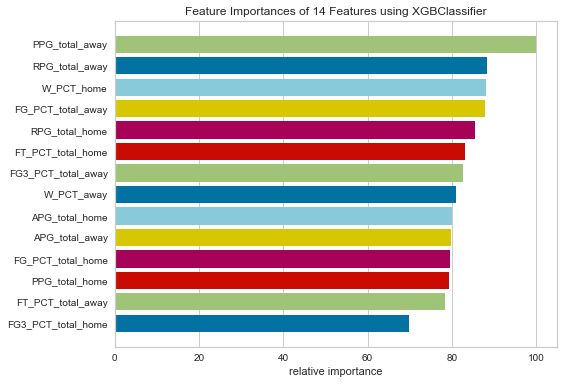

---------------------------------------------
i=1
WINNER:

Best XGBoost accuracy ({'learning_rate': 0.01}): 0.63
              precision    recall  f1-score   support

           0       0.63      0.95      0.76       844
           1       0.61      0.11      0.19       524

    accuracy                           0.63      1368
   macro avg       0.62      0.53      0.48      1368
weighted avg       0.63      0.63      0.54      1368



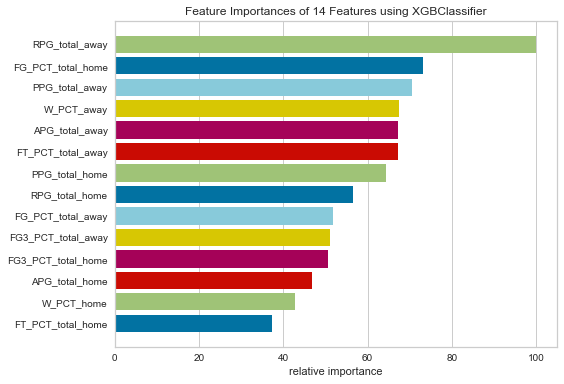

---------------------------------------------
i=2
WINNER:

Best XGBoost accuracy ({'learning_rate': 0.9}): 0.72
              precision    recall  f1-score   support

           0       0.74      0.85      0.79       863
           1       0.65      0.49      0.56       504

    accuracy                           0.72      1367
   macro avg       0.70      0.67      0.68      1367
weighted avg       0.71      0.72      0.71      1367



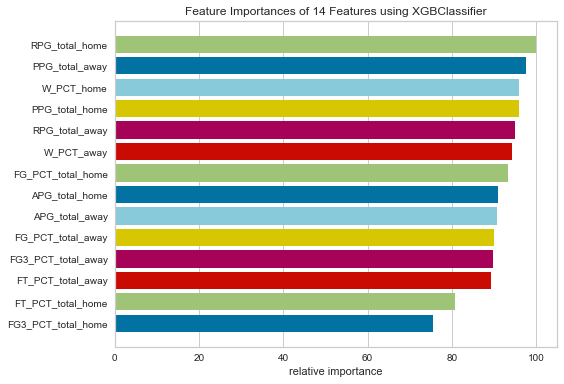

---------------------------------------------
i=3
WINNER:

Best XGBoost accuracy ({'learning_rate': 0.0}): 0.63
              precision    recall  f1-score   support

           0       0.63      1.00      0.77       860
           1       0.00      0.00      0.00       507

    accuracy                           0.63      1367
   macro avg       0.31      0.50      0.39      1367
weighted avg       0.40      0.63      0.49      1367



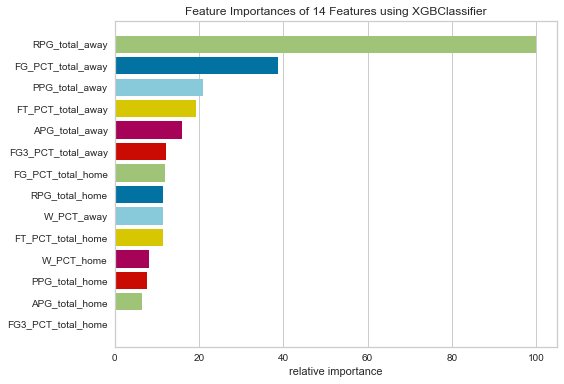

---------------------------------------------
i=4
WINNER:

Best XGBoost accuracy ({'learning_rate': 0.0}): 0.63
              precision    recall  f1-score   support

           0       0.63      1.00      0.77       864
           1       0.00      0.00      0.00       503

    accuracy                           0.63      1367
   macro avg       0.32      0.50      0.39      1367
weighted avg       0.40      0.63      0.49      1367



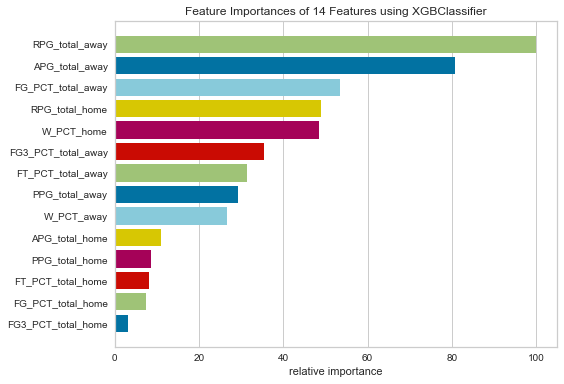

---------------------------------------------
Mean accuracy: 0.6720296076695029
Max accuracy: 0.7168983174835406
Min accuracy: 0.6291148500365764
i=5
FGP:

Best XGBoost accuracy ({'learning_rate': 0.55}): 0.68
              precision    recall  f1-score   support

           0       0.71      0.78      0.75       591
           1       0.62      0.52      0.57       393

    accuracy                           0.68       984
   macro avg       0.66      0.65      0.66       984
weighted avg       0.67      0.68      0.67       984



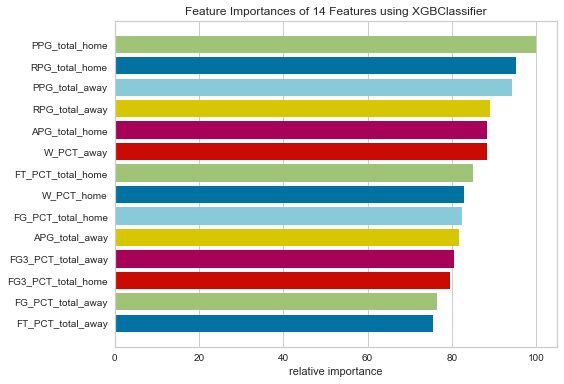

---------------------------------------------
i=6
FGP:

Best XGBoost accuracy ({'learning_rate': 0.0}): 0.61
              precision    recall  f1-score   support

           0       0.61      1.00      0.76       598
           1       0.00      0.00      0.00       386

    accuracy                           0.61       984
   macro avg       0.30      0.50      0.38       984
weighted avg       0.37      0.61      0.46       984



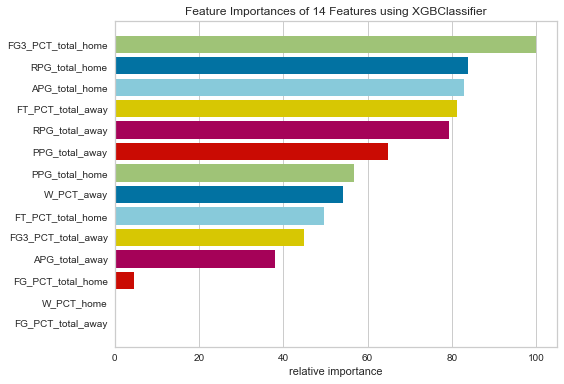

---------------------------------------------
i=7
FGP:

Best XGBoost accuracy ({'learning_rate': 0.0}): 0.58
              precision    recall  f1-score   support

           0       0.58      1.00      0.73       570
           1       0.00      0.00      0.00       414

    accuracy                           0.58       984
   macro avg       0.29      0.50      0.37       984
weighted avg       0.34      0.58      0.42       984



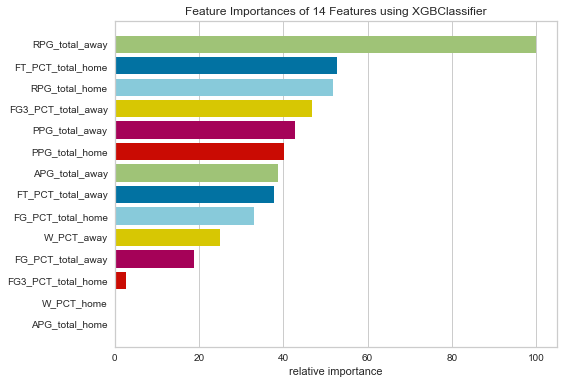

---------------------------------------------
i=8
FGP:

Best XGBoost accuracy ({'learning_rate': 0.0}): 0.61
              precision    recall  f1-score   support

           0       0.61      1.00      0.76       603
           1       0.00      0.00      0.00       381

    accuracy                           0.61       984
   macro avg       0.31      0.50      0.38       984
weighted avg       0.38      0.61      0.47       984



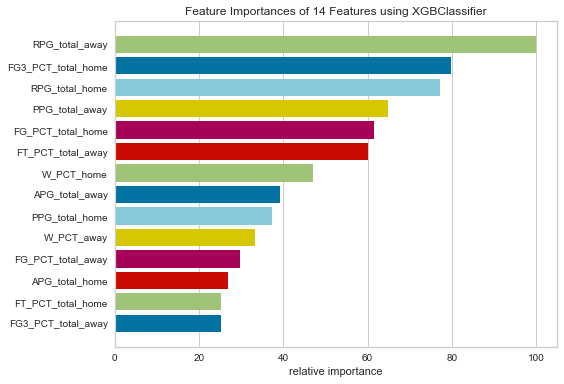

---------------------------------------------
i=9
FGP:

Best XGBoost accuracy ({'learning_rate': 0.01}): 0.61
              precision    recall  f1-score   support

           0       0.60      0.93      0.73       567
           1       0.64      0.17      0.27       417

    accuracy                           0.61       984
   macro avg       0.62      0.55      0.50       984
weighted avg       0.62      0.61      0.54       984



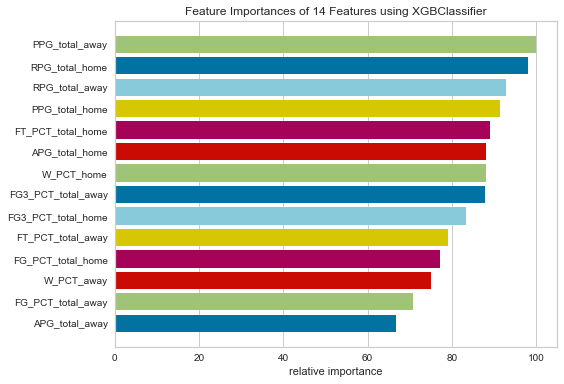

---------------------------------------------
Mean accuracy: 0.6199186991869918
Max accuracy: 0.6798780487804879
Min accuracy: 0.5792682926829268
i=10
FG3:

Best XGBoost accuracy ({'learning_rate': 0.75}): 0.65
              precision    recall  f1-score   support

           0       0.64      0.71      0.67       322
           1       0.65      0.58      0.62       303

    accuracy                           0.65       625
   macro avg       0.65      0.65      0.65       625
weighted avg       0.65      0.65      0.65       625



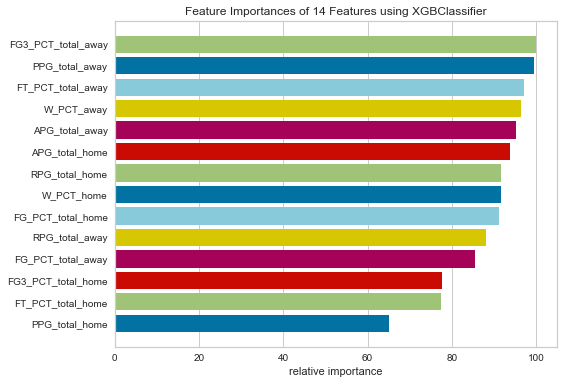

---------------------------------------------
i=11
FG3:

Best XGBoost accuracy ({'learning_rate': 0.65}): 0.61
              precision    recall  f1-score   support

           0       0.62      0.65      0.64       326
           1       0.60      0.57      0.58       299

    accuracy                           0.61       625
   macro avg       0.61      0.61      0.61       625
weighted avg       0.61      0.61      0.61       625



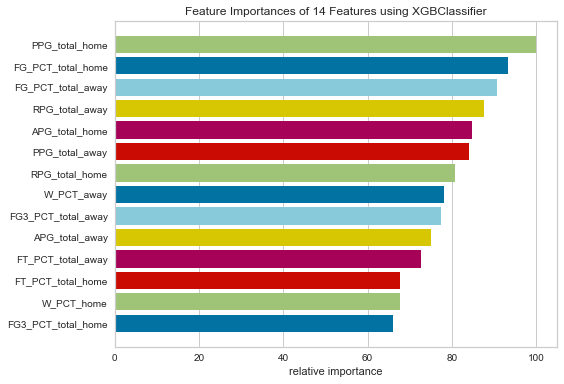

---------------------------------------------
i=12
FG3:

Best XGBoost accuracy ({'learning_rate': 0.35}): 0.62
              precision    recall  f1-score   support

           0       0.66      0.63      0.64       336
           1       0.59      0.61      0.60       288

    accuracy                           0.62       624
   macro avg       0.62      0.62      0.62       624
weighted avg       0.62      0.62      0.62       624



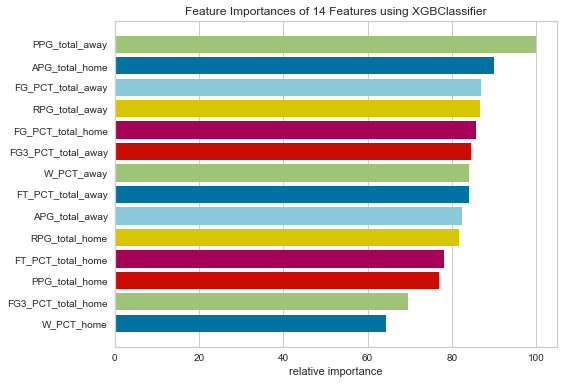

---------------------------------------------
i=13
FG3:

Best XGBoost accuracy ({'learning_rate': 0.8}): 0.59
              precision    recall  f1-score   support

           0       0.60      0.62      0.61       315
           1       0.59      0.57      0.58       309

    accuracy                           0.59       624
   macro avg       0.59      0.59      0.59       624
weighted avg       0.59      0.59      0.59       624



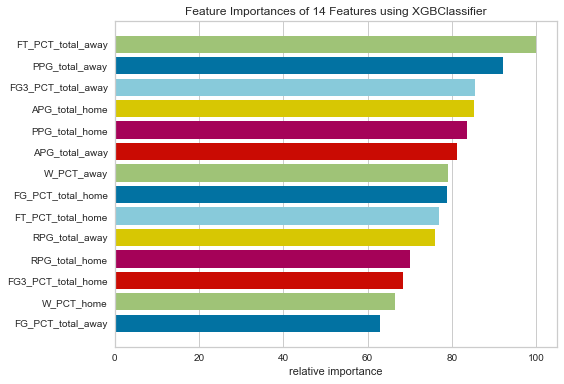

---------------------------------------------
i=14
FG3:

Best XGBoost accuracy ({'learning_rate': 0.75}): 0.61
              precision    recall  f1-score   support

           0       0.62      0.64      0.63       325
           1       0.60      0.58      0.59       299

    accuracy                           0.61       624
   macro avg       0.61      0.61      0.61       624
weighted avg       0.61      0.61      0.61       624



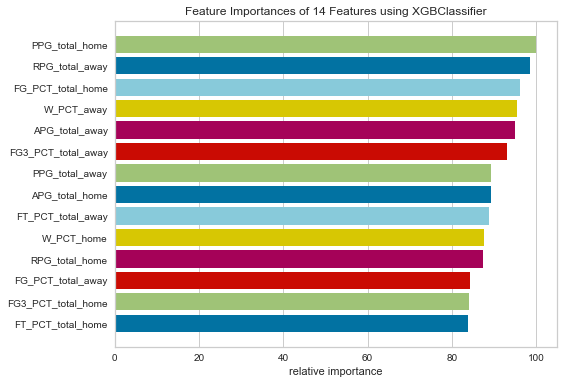

---------------------------------------------
Mean accuracy: 0.6192865384615385
Max accuracy: 0.648
Min accuracy: 0.594551282051282
i=15
FT:

Best XGBoost accuracy ({'learning_rate': 0.8}): 0.56
              precision    recall  f1-score   support

           0       0.55      0.56      0.55       306
           1       0.58      0.56      0.57       325

    accuracy                           0.56       631
   macro avg       0.56      0.56      0.56       631
weighted avg       0.56      0.56      0.56       631



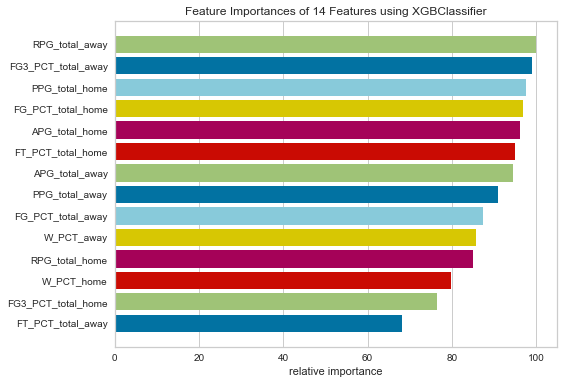

---------------------------------------------
i=16
FT:

Best XGBoost accuracy ({'learning_rate': 0.15}): 0.61
              precision    recall  f1-score   support

           0       0.60      0.58      0.59       303
           1       0.63      0.65      0.64       328

    accuracy                           0.61       631
   macro avg       0.61      0.61      0.61       631
weighted avg       0.61      0.61      0.61       631



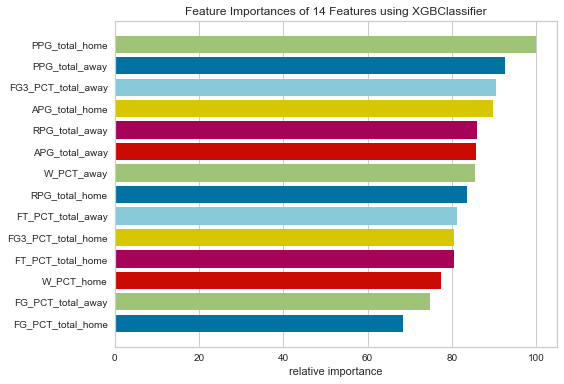

---------------------------------------------
i=17
FT:

Best XGBoost accuracy ({'learning_rate': 0.25}): 0.64
              precision    recall  f1-score   support

           0       0.67      0.61      0.64       331
           1       0.61      0.68      0.64       299

    accuracy                           0.64       630
   macro avg       0.64      0.64      0.64       630
weighted avg       0.64      0.64      0.64       630



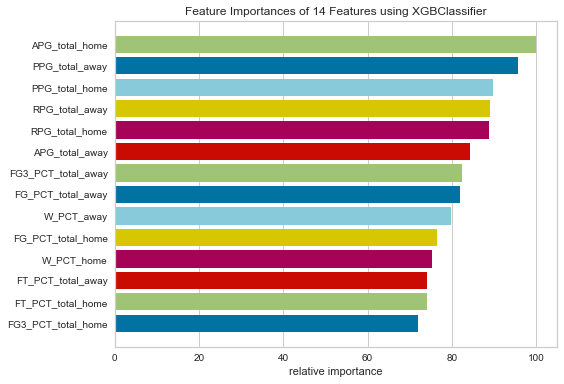

---------------------------------------------
i=18
FT:

Best XGBoost accuracy ({'learning_rate': 0.3}): 0.62
              precision    recall  f1-score   support

           0       0.60      0.60      0.60       297
           1       0.64      0.64      0.64       333

    accuracy                           0.62       630
   macro avg       0.62      0.62      0.62       630
weighted avg       0.62      0.62      0.62       630



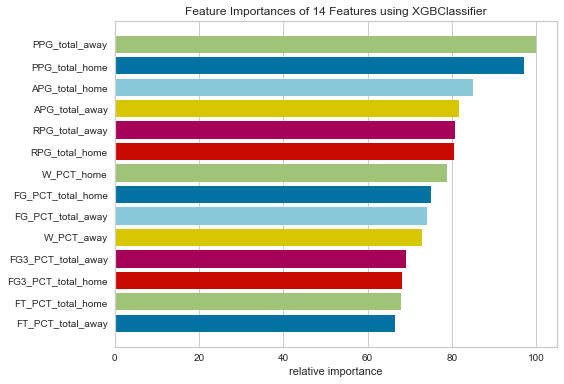

---------------------------------------------
i=19
FT:

Best XGBoost accuracy ({'learning_rate': 0.55}): 0.61
              precision    recall  f1-score   support

           0       0.62      0.59      0.60       314
           1       0.61      0.64      0.63       316

    accuracy                           0.61       630
   macro avg       0.61      0.61      0.61       630
weighted avg       0.61      0.61      0.61       630



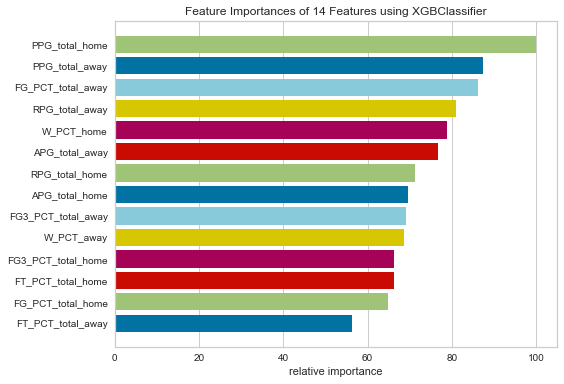

---------------------------------------------
Mean accuracy: 0.6098501999849067
Max accuracy: 0.6396825396825396
Min accuracy: 0.5625990491283677
i=20
AST:

Best XGBoost accuracy ({'learning_rate': 0.9}): 0.67
              precision    recall  f1-score   support

           0       0.70      0.76      0.73       577
           1       0.61      0.53      0.57       399

    accuracy                           0.67       976
   macro avg       0.66      0.65      0.65       976
weighted avg       0.66      0.67      0.66       976



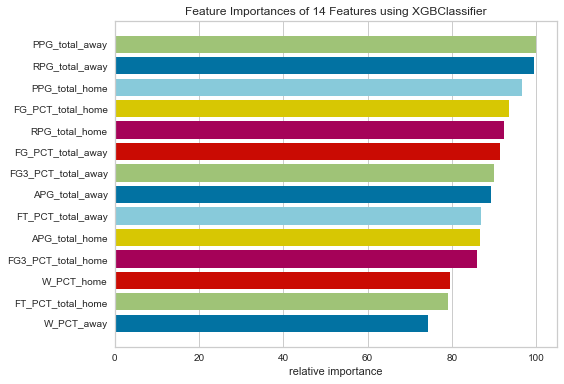

---------------------------------------------
i=21
AST:

Best XGBoost accuracy ({'learning_rate': 0.0}): 0.62
              precision    recall  f1-score   support

           0       0.62      1.00      0.76       601
           1       0.00      0.00      0.00       375

    accuracy                           0.62       976
   macro avg       0.31      0.50      0.38       976
weighted avg       0.38      0.62      0.47       976



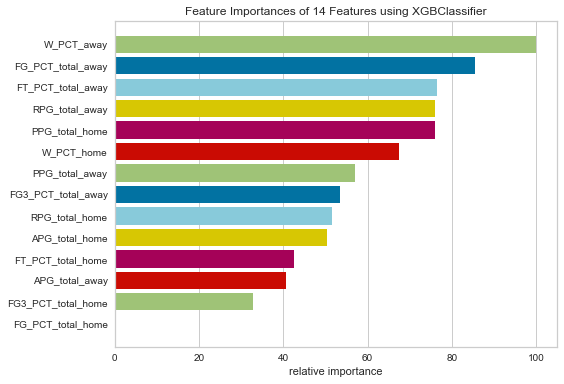

---------------------------------------------
i=22
AST:

Best XGBoost accuracy ({'learning_rate': 0.0}): 0.57
              precision    recall  f1-score   support

           0       0.57      1.00      0.72       554
           1       0.00      0.00      0.00       421

    accuracy                           0.57       975
   macro avg       0.28      0.50      0.36       975
weighted avg       0.32      0.57      0.41       975



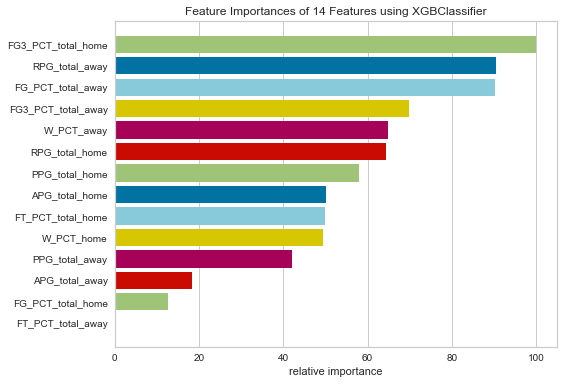

---------------------------------------------
i=23
AST:

Best XGBoost accuracy ({'learning_rate': 0.55}): 0.64
              precision    recall  f1-score   support

           0       0.69      0.76      0.72       595
           1       0.55      0.46      0.50       380

    accuracy                           0.64       975
   macro avg       0.62      0.61      0.61       975
weighted avg       0.63      0.64      0.63       975



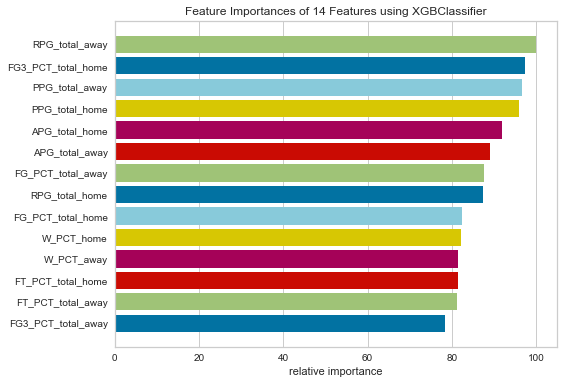

---------------------------------------------
i=24
AST:

Best XGBoost accuracy ({'learning_rate': 0.0}): 0.58
              precision    recall  f1-score   support

           0       0.58      1.00      0.74       567
           1       0.00      0.00      0.00       408

    accuracy                           0.58       975
   macro avg       0.29      0.50      0.37       975
weighted avg       0.34      0.58      0.43       975



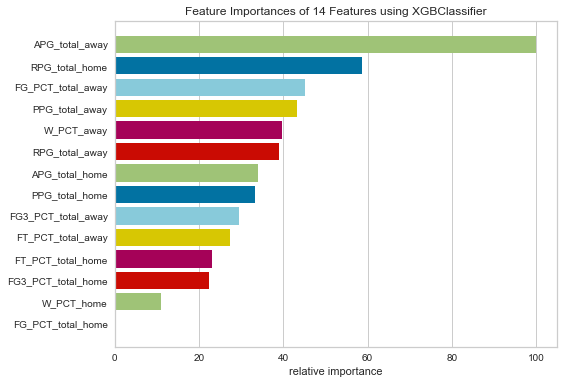

---------------------------------------------
Mean accuracy: 0.623516708701135
Max accuracy: 0.6690573770491803
Min accuracy: 0.5682051282051283
i=25
REB:

Best XGBoost accuracy ({'learning_rate': 0.3}): 0.66
              precision    recall  f1-score   support

           0       0.69      0.76      0.72       490
           1       0.61      0.51      0.56       350

    accuracy                           0.66       840
   macro avg       0.65      0.64      0.64       840
weighted avg       0.65      0.66      0.65       840



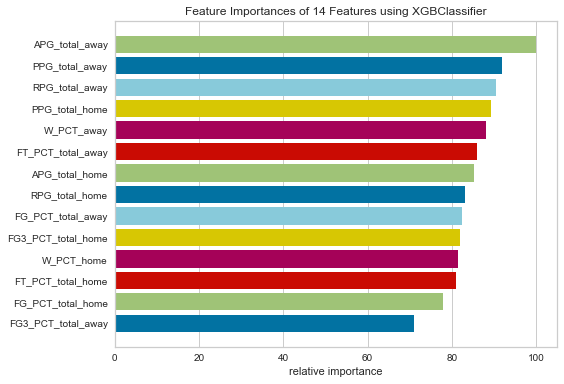

---------------------------------------------
i=26
REB:

Best XGBoost accuracy ({'learning_rate': 0.0}): 0.56
              precision    recall  f1-score   support

           0       0.56      1.00      0.72       472
           1       0.00      0.00      0.00       368

    accuracy                           0.56       840
   macro avg       0.28      0.50      0.36       840
weighted avg       0.32      0.56      0.40       840



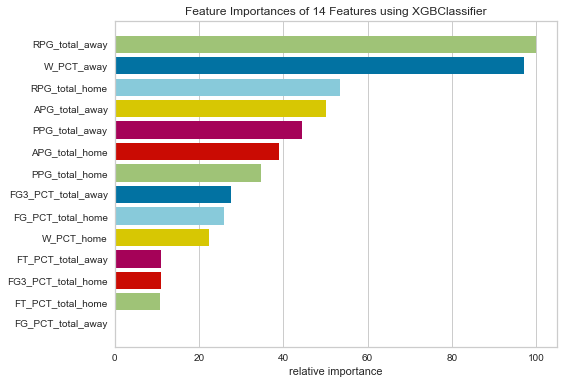

---------------------------------------------
i=27
REB:

Best XGBoost accuracy ({'learning_rate': 0.95}): 0.66
              precision    recall  f1-score   support

           0       0.69      0.74      0.71       477
           1       0.62      0.56      0.58       363

    accuracy                           0.66       840
   macro avg       0.65      0.65      0.65       840
weighted avg       0.66      0.66      0.66       840



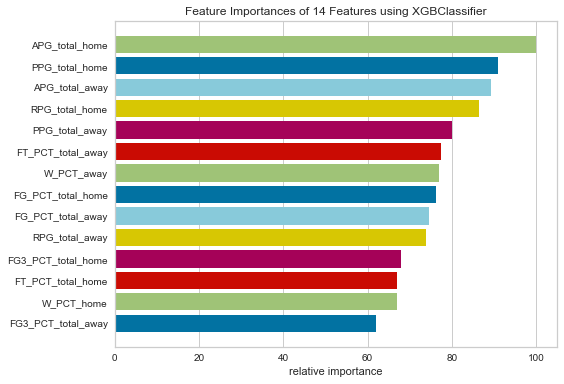

---------------------------------------------
i=28
REB:

Best XGBoost accuracy ({'learning_rate': 0.6}): 0.66
              precision    recall  f1-score   support

           0       0.71      0.74      0.72       515
           1       0.56      0.53      0.54       325

    accuracy                           0.66       840
   macro avg       0.64      0.63      0.63       840
weighted avg       0.65      0.66      0.65       840



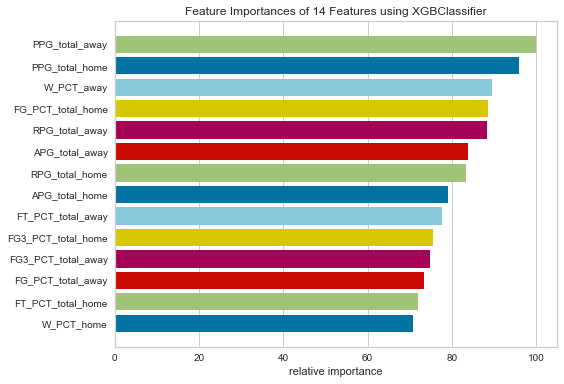

---------------------------------------------
i=29
REB:

Best XGBoost accuracy ({'learning_rate': 0.8}): 0.66
              precision    recall  f1-score   support

           0       0.68      0.75      0.71       464
           1       0.64      0.56      0.60       375

    accuracy                           0.66       839
   macro avg       0.66      0.65      0.65       839
weighted avg       0.66      0.66      0.66       839



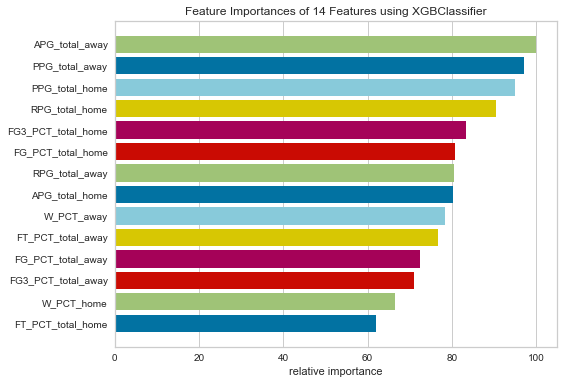

---------------------------------------------
Mean accuracy: 0.6336309523809524
Max accuracy: 0.6583333333333333
Min accuracy: 0.5619047619047619


In [27]:
# Step size shrinkage used in update to prevent overfitting.  
# After each boosting step, we can directly get the weights of new features. 
# learnig rate shrinks the feature weights to make the boosting process more conservative.

print_cross_validated_and_plot(X_train_dicts, X_test_dicts, y_train_dicts, y_test_dicts, {
    'learning_rate' : [0.0,0.01,0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9,0.95]
})

## Try prune gamma

i=0
WINNER:

Best XGBoost accuracy ({'gamma': 29}): 0.64
              precision    recall  f1-score   support

           0       0.64      1.00      0.78       871
           1       0.00      0.00      0.00       497

    accuracy                           0.64      1368
   macro avg       0.32      0.50      0.39      1368
weighted avg       0.41      0.64      0.50      1368



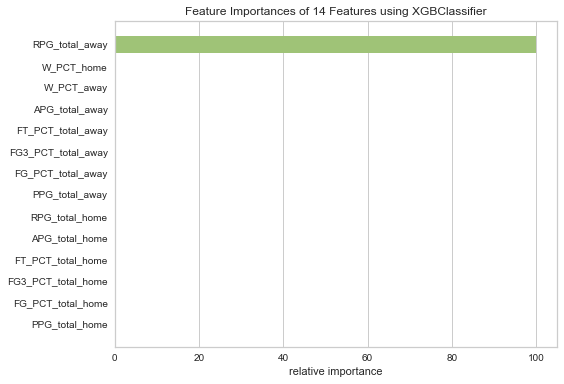

---------------------------------------------
i=1
WINNER:

Best XGBoost accuracy ({'gamma': 25}): 0.62
              precision    recall  f1-score   support

           0       0.62      0.99      0.76       844
           1       0.50      0.01      0.02       524

    accuracy                           0.62      1368
   macro avg       0.56      0.50      0.39      1368
weighted avg       0.57      0.62      0.48      1368



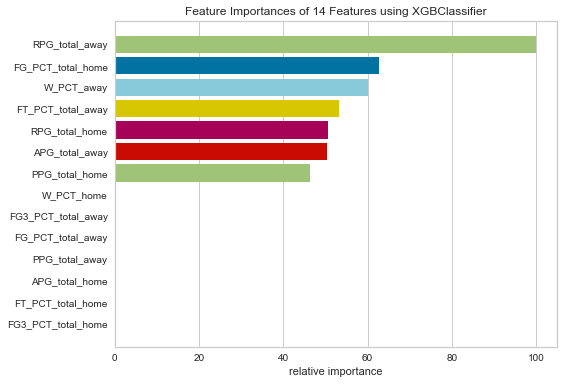

---------------------------------------------
i=2
WINNER:

Best XGBoost accuracy ({'gamma': 22}): 0.64
              precision    recall  f1-score   support

           0       0.64      0.98      0.78       863
           1       0.64      0.05      0.10       504

    accuracy                           0.64      1367
   macro avg       0.64      0.52      0.44      1367
weighted avg       0.64      0.64      0.53      1367



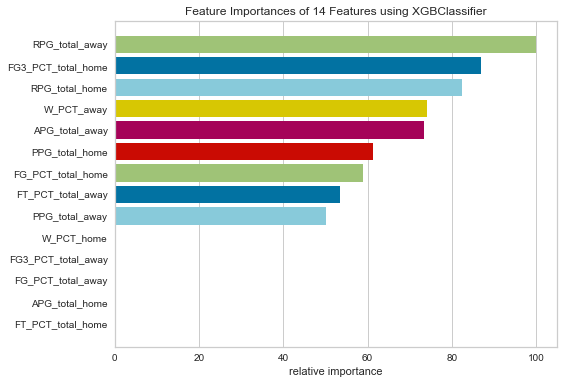

---------------------------------------------
i=3
WINNER:

Best XGBoost accuracy ({'gamma': 21}): 0.63
              precision    recall  f1-score   support

           0       0.64      0.97      0.77       860
           1       0.52      0.06      0.10       507

    accuracy                           0.63      1367
   macro avg       0.58      0.51      0.43      1367
weighted avg       0.59      0.63      0.52      1367



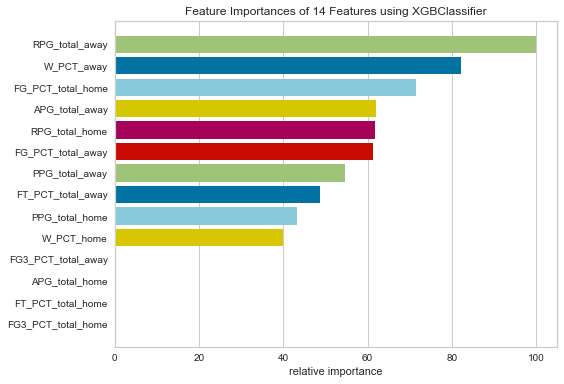

---------------------------------------------
i=4
WINNER:

Best XGBoost accuracy ({'gamma': 26}): 0.63
              precision    recall  f1-score   support

           0       0.63      1.00      0.77       864
           1       0.00      0.00      0.00       503

    accuracy                           0.63      1367
   macro avg       0.32      0.50      0.39      1367
weighted avg       0.40      0.63      0.49      1367



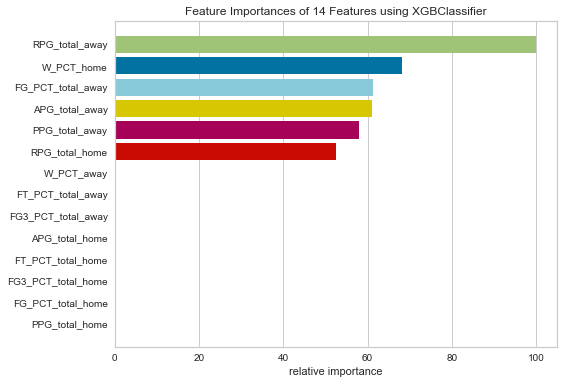

---------------------------------------------
Mean accuracy: 0.6310801655137601
Max accuracy: 0.640087783467447
Min accuracy: 0.6169590643274854
i=5
FGP:

Best XGBoost accuracy ({'gamma': 21}): 0.60
              precision    recall  f1-score   support

           0       0.60      1.00      0.75       591
           1       0.00      0.00      0.00       393

    accuracy                           0.60       984
   macro avg       0.30      0.50      0.38       984
weighted avg       0.36      0.60      0.45       984



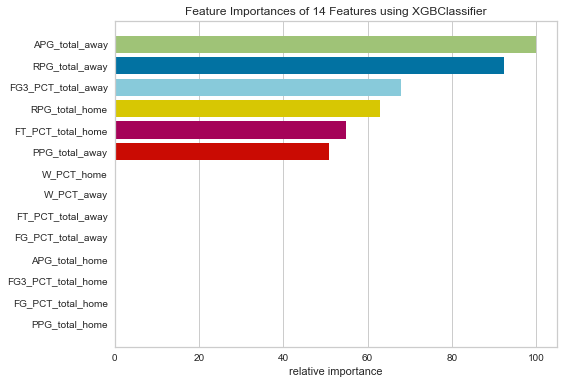

---------------------------------------------
i=6
FGP:

Best XGBoost accuracy ({'gamma': 25}): 0.61
              precision    recall  f1-score   support

           0       0.61      1.00      0.76       598
           1       0.00      0.00      0.00       386

    accuracy                           0.61       984
   macro avg       0.30      0.50      0.38       984
weighted avg       0.37      0.61      0.46       984



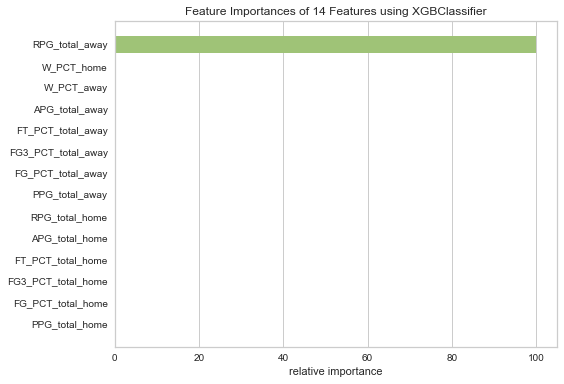

---------------------------------------------
i=7
FGP:

Best XGBoost accuracy ({'gamma': 23}): 0.58
              precision    recall  f1-score   support

           0       0.58      1.00      0.73       570
           1       0.00      0.00      0.00       414

    accuracy                           0.58       984
   macro avg       0.29      0.50      0.37       984
weighted avg       0.34      0.58      0.42       984



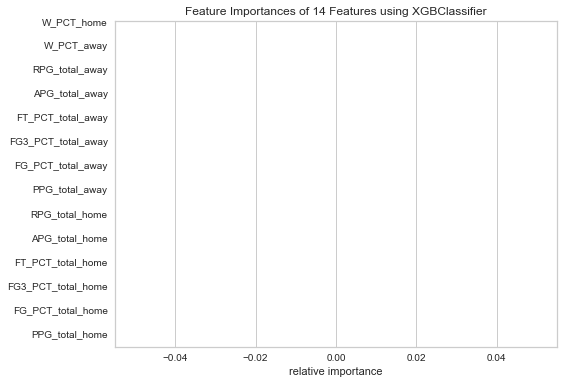

---------------------------------------------
i=8
FGP:

Best XGBoost accuracy ({'gamma': 28}): 0.61
              precision    recall  f1-score   support

           0       0.61      1.00      0.76       603
           1       0.00      0.00      0.00       381

    accuracy                           0.61       984
   macro avg       0.31      0.50      0.38       984
weighted avg       0.38      0.61      0.47       984



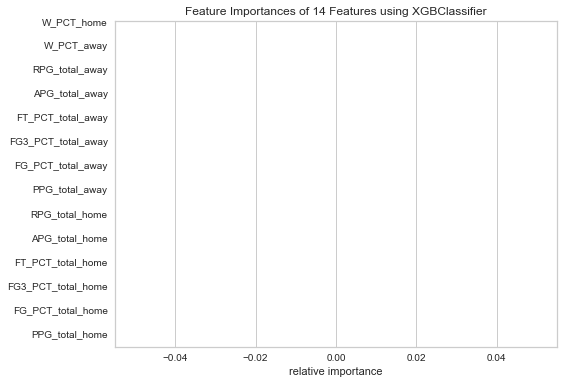

---------------------------------------------
i=9
FGP:

Best XGBoost accuracy ({'gamma': 26}): 0.58
              precision    recall  f1-score   support

           0       0.58      1.00      0.73       567
           1       0.00      0.00      0.00       417

    accuracy                           0.58       984
   macro avg       0.29      0.50      0.37       984
weighted avg       0.33      0.58      0.42       984



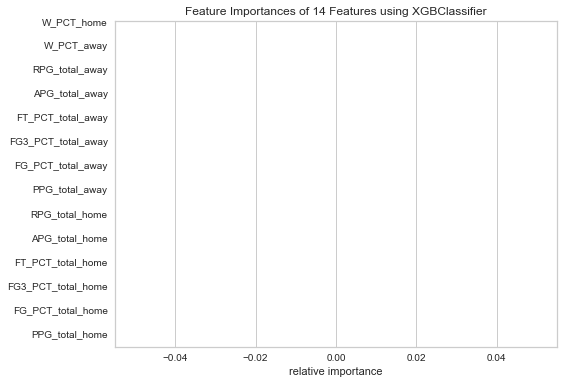

---------------------------------------------
Mean accuracy: 0.6001016260162602
Max accuracy: 0.6128048780487805
Min accuracy: 0.5792682926829268
i=10
FG3:

Best XGBoost accuracy ({'gamma': 14}): 0.59
              precision    recall  f1-score   support

           0       0.58      0.74      0.65       322
           1       0.61      0.43      0.50       303

    accuracy                           0.59       625
   macro avg       0.59      0.58      0.57       625
weighted avg       0.59      0.59      0.58       625



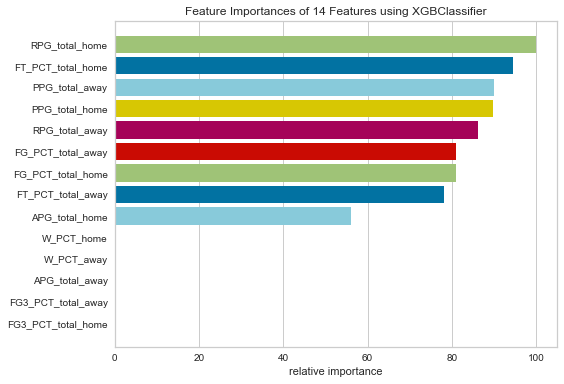

---------------------------------------------
i=11
FG3:

Best XGBoost accuracy ({'gamma': 6}): 0.58
              precision    recall  f1-score   support

           0       0.59      0.62      0.60       326
           1       0.56      0.53      0.55       299

    accuracy                           0.58       625
   macro avg       0.58      0.58      0.58       625
weighted avg       0.58      0.58      0.58       625



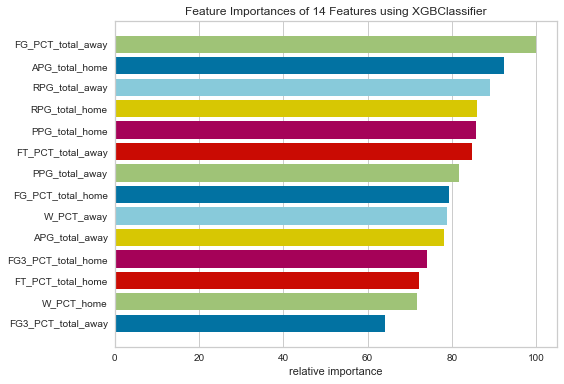

---------------------------------------------
i=12
FG3:

Best XGBoost accuracy ({'gamma': 0}): 0.60
              precision    recall  f1-score   support

           0       0.63      0.60      0.62       336
           1       0.56      0.59      0.58       288

    accuracy                           0.60       624
   macro avg       0.60      0.60      0.60       624
weighted avg       0.60      0.60      0.60       624



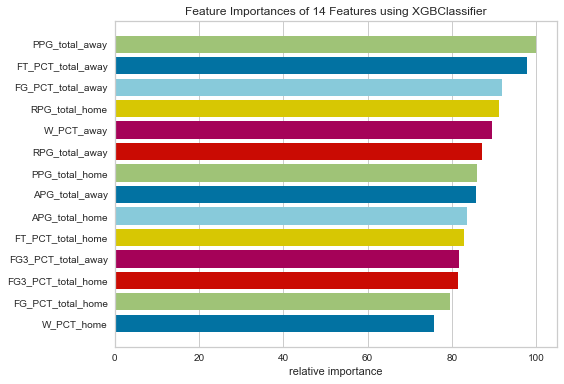

---------------------------------------------
i=13
FG3:

Best XGBoost accuracy ({'gamma': 0}): 0.62
              precision    recall  f1-score   support

           0       0.62      0.63      0.62       315
           1       0.61      0.61      0.61       309

    accuracy                           0.62       624
   macro avg       0.62      0.62      0.62       624
weighted avg       0.62      0.62      0.62       624



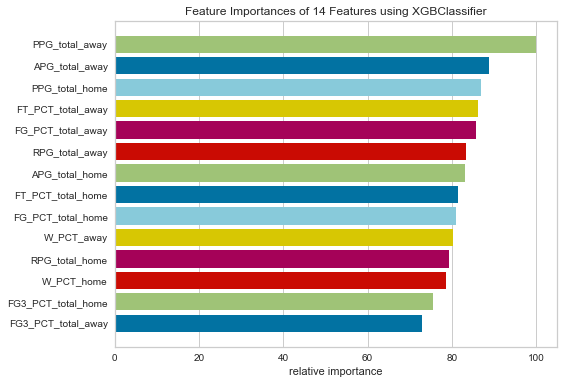

---------------------------------------------
i=14
FG3:

Best XGBoost accuracy ({'gamma': 0}): 0.62
              precision    recall  f1-score   support

           0       0.63      0.64      0.64       325
           1       0.60      0.60      0.60       299

    accuracy                           0.62       624
   macro avg       0.62      0.62      0.62       624
weighted avg       0.62      0.62      0.62       624



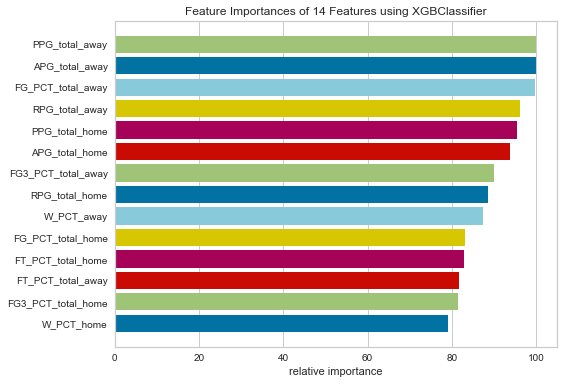

---------------------------------------------
Mean accuracy: 0.5948858974358975
Max accuracy: 0.6153846153846154
Min accuracy: 0.5776
i=15
FT:

Best XGBoost accuracy ({'gamma': 5}): 0.58
              precision    recall  f1-score   support

           0       0.57      0.54      0.56       306
           1       0.59      0.62      0.60       325

    accuracy                           0.58       631
   macro avg       0.58      0.58      0.58       631
weighted avg       0.58      0.58      0.58       631



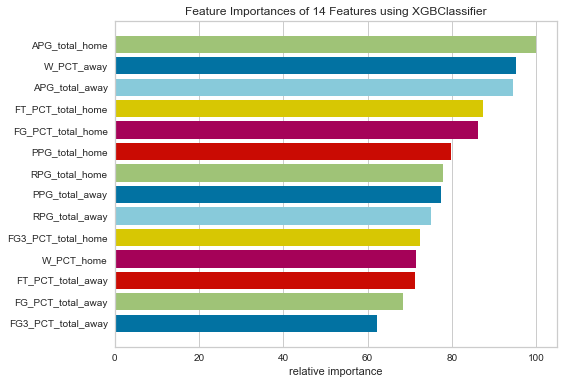

---------------------------------------------
i=16
FT:

Best XGBoost accuracy ({'gamma': 3}): 0.60
              precision    recall  f1-score   support

           0       0.58      0.61      0.60       303
           1       0.62      0.60      0.61       328

    accuracy                           0.60       631
   macro avg       0.60      0.60      0.60       631
weighted avg       0.60      0.60      0.60       631



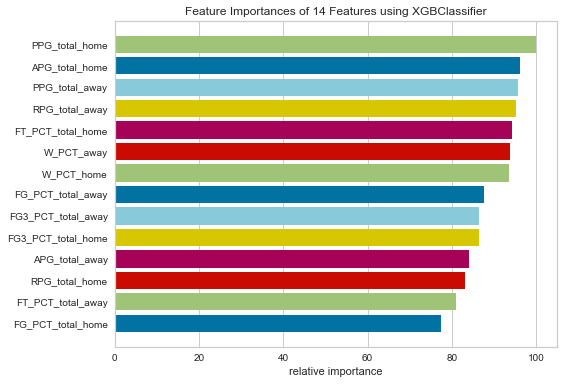

---------------------------------------------
i=17
FT:

Best XGBoost accuracy ({'gamma': 10}): 0.53
              precision    recall  f1-score   support

           0       0.57      0.45      0.50       331
           1       0.51      0.63      0.56       299

    accuracy                           0.53       630
   macro avg       0.54      0.54      0.53       630
weighted avg       0.54      0.53      0.53       630



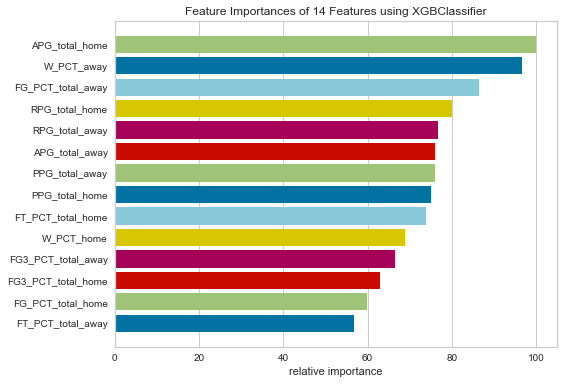

---------------------------------------------
i=18
FT:

Best XGBoost accuracy ({'gamma': 0}): 0.62
              precision    recall  f1-score   support

           0       0.60      0.60      0.60       297
           1       0.64      0.64      0.64       333

    accuracy                           0.62       630
   macro avg       0.62      0.62      0.62       630
weighted avg       0.62      0.62      0.62       630



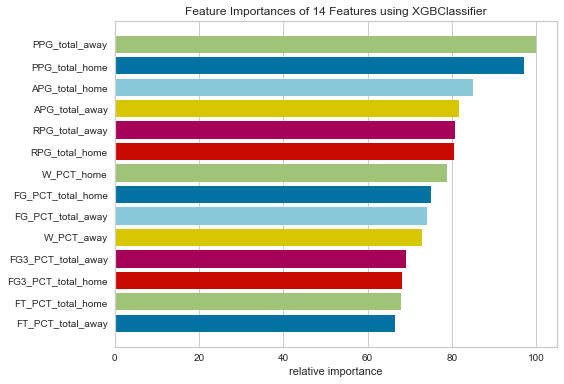

---------------------------------------------
i=19
FT:

Best XGBoost accuracy ({'gamma': 9}): 0.59
              precision    recall  f1-score   support

           0       0.58      0.59      0.59       314
           1       0.59      0.59      0.59       316

    accuracy                           0.59       630
   macro avg       0.59      0.59      0.59       630
weighted avg       0.59      0.59      0.59       630



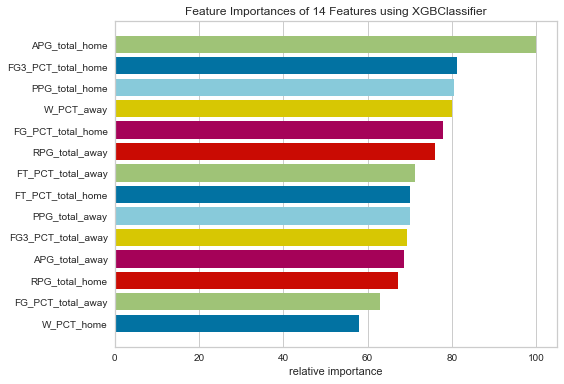

---------------------------------------------
Mean accuracy: 0.5848476844514879
Max accuracy: 0.6222222222222222
Min accuracy: 0.5333333333333333
i=20
AST:

Best XGBoost accuracy ({'gamma': 27}): 0.59
              precision    recall  f1-score   support

           0       0.59      1.00      0.74       577
           1       0.00      0.00      0.00       399

    accuracy                           0.59       976
   macro avg       0.30      0.50      0.37       976
weighted avg       0.35      0.59      0.44       976



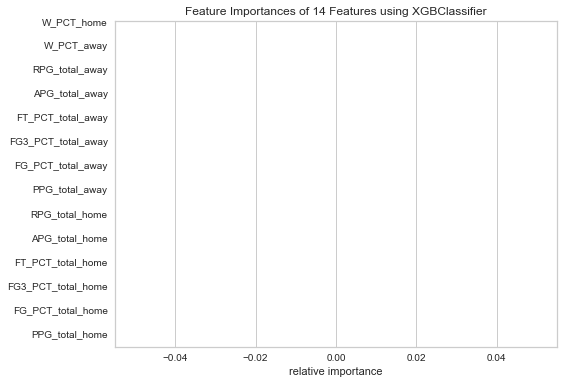

---------------------------------------------
i=21
AST:

Best XGBoost accuracy ({'gamma': 27}): 0.62
              precision    recall  f1-score   support

           0       0.62      1.00      0.76       601
           1       0.00      0.00      0.00       375

    accuracy                           0.62       976
   macro avg       0.31      0.50      0.38       976
weighted avg       0.38      0.62      0.47       976



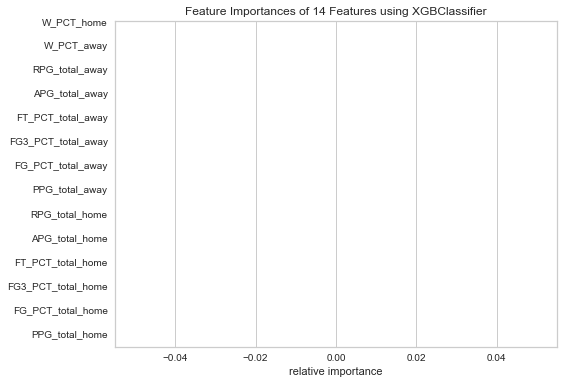

---------------------------------------------
i=22
AST:

Best XGBoost accuracy ({'gamma': 29}): 0.57
              precision    recall  f1-score   support

           0       0.57      1.00      0.72       554
           1       0.00      0.00      0.00       421

    accuracy                           0.57       975
   macro avg       0.28      0.50      0.36       975
weighted avg       0.32      0.57      0.41       975



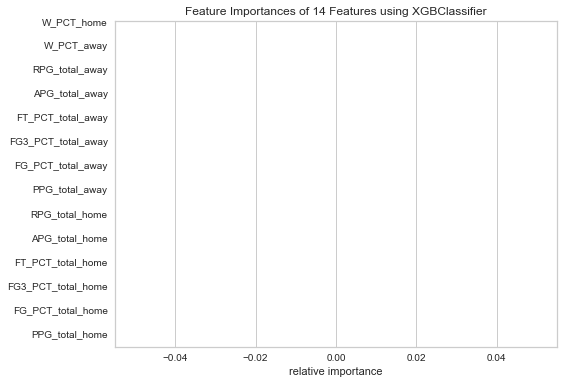

---------------------------------------------
i=23
AST:

Best XGBoost accuracy ({'gamma': 29}): 0.61
              precision    recall  f1-score   support

           0       0.61      1.00      0.76       595
           1       0.00      0.00      0.00       380

    accuracy                           0.61       975
   macro avg       0.31      0.50      0.38       975
weighted avg       0.37      0.61      0.46       975



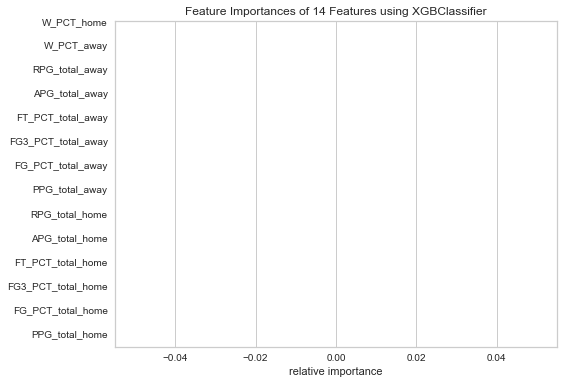

---------------------------------------------
i=24
AST:

Best XGBoost accuracy ({'gamma': 28}): 0.58
              precision    recall  f1-score   support

           0       0.58      1.00      0.74       567
           1       0.00      0.00      0.00       408

    accuracy                           0.58       975
   macro avg       0.29      0.50      0.37       975
weighted avg       0.34      0.58      0.43       975



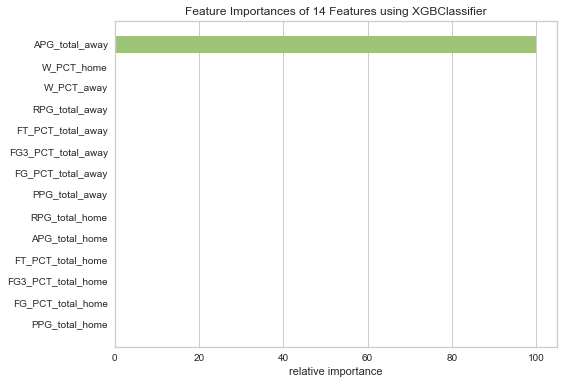

---------------------------------------------
Mean accuracy: 0.5963571878940731
Max accuracy: 0.6157786885245902
Min accuracy: 0.5682051282051283
i=25
REB:

Best XGBoost accuracy ({'gamma': 29}): 0.58
              precision    recall  f1-score   support

           0       0.58      1.00      0.74       490
           1       0.00      0.00      0.00       350

    accuracy                           0.58       840
   macro avg       0.29      0.50      0.37       840
weighted avg       0.34      0.58      0.43       840



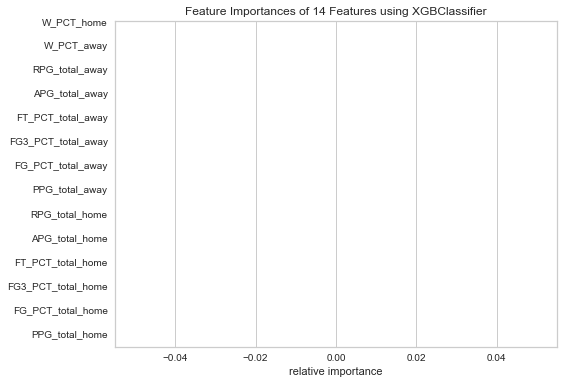

---------------------------------------------
i=26
REB:

Best XGBoost accuracy ({'gamma': 29}): 0.56
              precision    recall  f1-score   support

           0       0.56      0.97      0.71       472
           1       0.50      0.04      0.07       368

    accuracy                           0.56       840
   macro avg       0.53      0.50      0.39       840
weighted avg       0.54      0.56      0.43       840



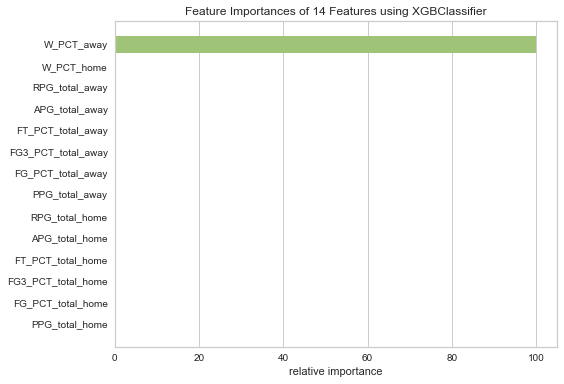

---------------------------------------------
i=27
REB:

Best XGBoost accuracy ({'gamma': 28}): 0.57
              precision    recall  f1-score   support

           0       0.57      1.00      0.72       477
           1       0.00      0.00      0.00       363

    accuracy                           0.57       840
   macro avg       0.28      0.50      0.36       840
weighted avg       0.32      0.57      0.41       840



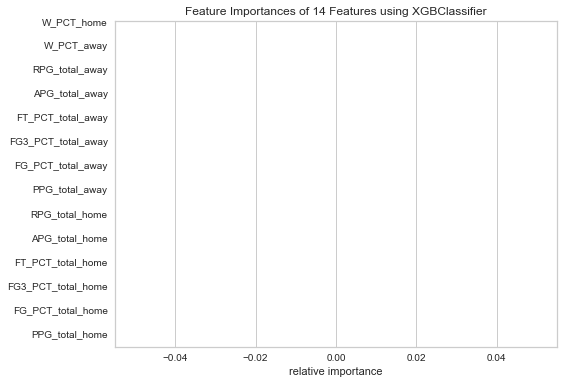

---------------------------------------------
i=28
REB:

Best XGBoost accuracy ({'gamma': 25}): 0.62
              precision    recall  f1-score   support

           0       0.62      0.98      0.76       515
           1       0.57      0.04      0.07       325

    accuracy                           0.62       840
   macro avg       0.59      0.51      0.42       840
weighted avg       0.60      0.62      0.49       840



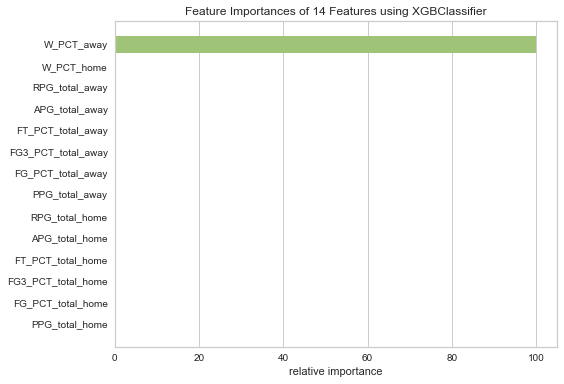

---------------------------------------------
i=29
REB:

Best XGBoost accuracy ({'gamma': 27}): 0.55
              precision    recall  f1-score   support

           0       0.55      1.00      0.71       464
           1       0.00      0.00      0.00       375

    accuracy                           0.55       839
   macro avg       0.28      0.50      0.36       839
weighted avg       0.31      0.55      0.39       839



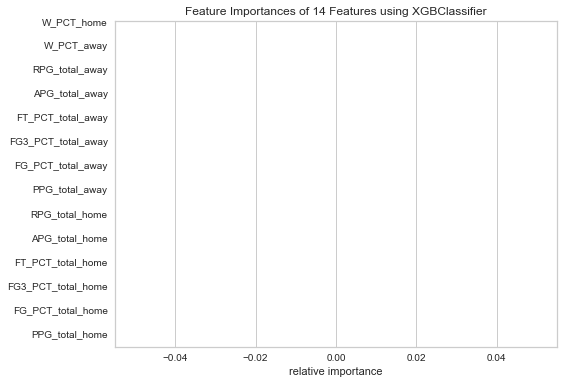

---------------------------------------------
Mean accuracy: 0.5824404761904762
Max accuracy: 0.6166666666666667
Min accuracy: 0.5619047619047619


In [28]:
# Minimum loss reduction required to make a further partition on a leaf node of the tree. 
# The larger gamma is, the more conservative the algorithm will be.

print_cross_validated_and_plot(X_train_dicts, X_test_dicts, y_train_dicts, y_test_dicts, {
    'gamma' : [*range(0,30)],
})

## Try prune scale_pos_weight

i=0
WINNER:

Best XGBoost accuracy ({'scale_pos_weight': 5}): 0.67
              precision    recall  f1-score   support

           0       0.80      0.64      0.71       871
           1       0.53      0.72      0.61       497

    accuracy                           0.67      1368
   macro avg       0.67      0.68      0.66      1368
weighted avg       0.70      0.67      0.68      1368



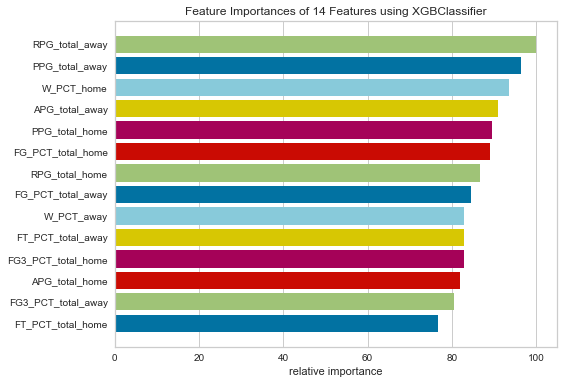

---------------------------------------------
i=1
WINNER:

Best XGBoost accuracy ({'scale_pos_weight': 0}): 0.62
              precision    recall  f1-score   support

           0       0.62      1.00      0.76       844
           1       0.00      0.00      0.00       524

    accuracy                           0.62      1368
   macro avg       0.31      0.50      0.38      1368
weighted avg       0.38      0.62      0.47      1368



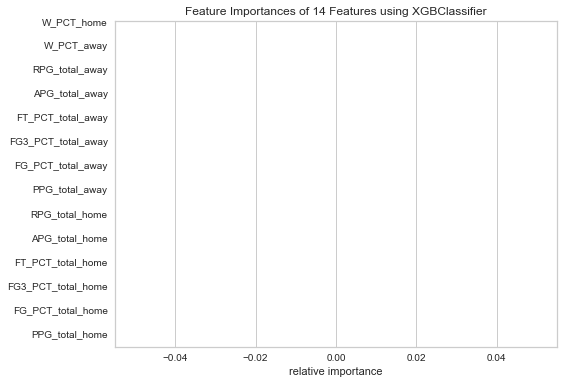

---------------------------------------------
i=2
WINNER:

Best XGBoost accuracy ({'scale_pos_weight': 0}): 0.63
              precision    recall  f1-score   support

           0       0.63      1.00      0.77       863
           1       0.00      0.00      0.00       504

    accuracy                           0.63      1367
   macro avg       0.32      0.50      0.39      1367
weighted avg       0.40      0.63      0.49      1367



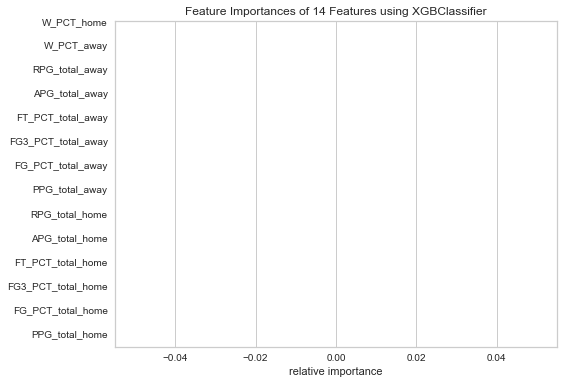

---------------------------------------------
i=3
WINNER:

Best XGBoost accuracy ({'scale_pos_weight': 3}): 0.67
              precision    recall  f1-score   support

           0       0.76      0.70      0.73       860
           1       0.55      0.62      0.58       507

    accuracy                           0.67      1367
   macro avg       0.65      0.66      0.65      1367
weighted avg       0.68      0.67      0.67      1367



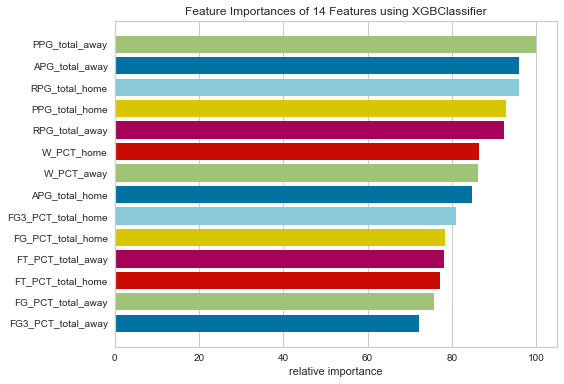

---------------------------------------------
i=4
WINNER:

Best XGBoost accuracy ({'scale_pos_weight': 0}): 0.63
              precision    recall  f1-score   support

           0       0.63      1.00      0.77       864
           1       0.00      0.00      0.00       503

    accuracy                           0.63      1367
   macro avg       0.32      0.50      0.39      1367
weighted avg       0.40      0.63      0.49      1367



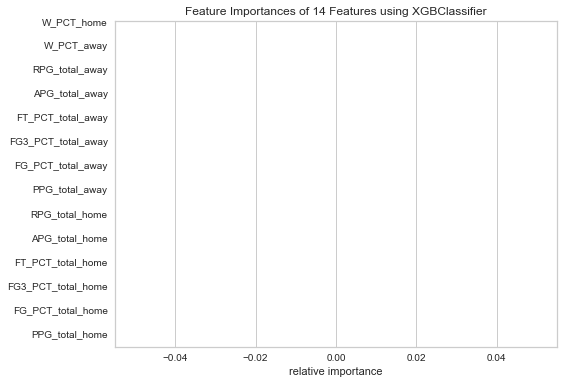

---------------------------------------------
Mean accuracy: 0.6468018872162117
Max accuracy: 0.6703216374269005
Min accuracy: 0.6169590643274854
i=5
FGP:

Best XGBoost accuracy ({'scale_pos_weight': 2}): 0.65
              precision    recall  f1-score   support

           0       0.73      0.68      0.70       591
           1       0.56      0.62      0.59       393

    accuracy                           0.65       984
   macro avg       0.64      0.65      0.64       984
weighted avg       0.66      0.65      0.65       984



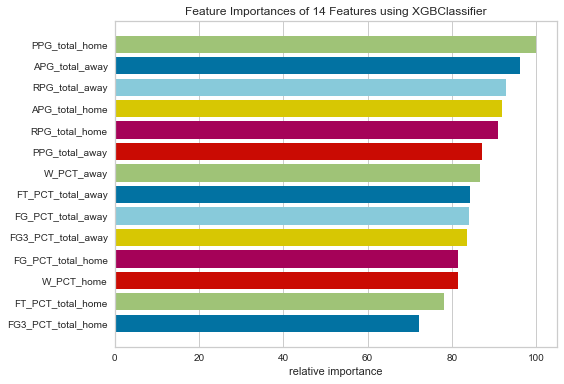

---------------------------------------------
i=6
FGP:

Best XGBoost accuracy ({'scale_pos_weight': 0}): 0.61
              precision    recall  f1-score   support

           0       0.61      1.00      0.76       598
           1       0.00      0.00      0.00       386

    accuracy                           0.61       984
   macro avg       0.30      0.50      0.38       984
weighted avg       0.37      0.61      0.46       984



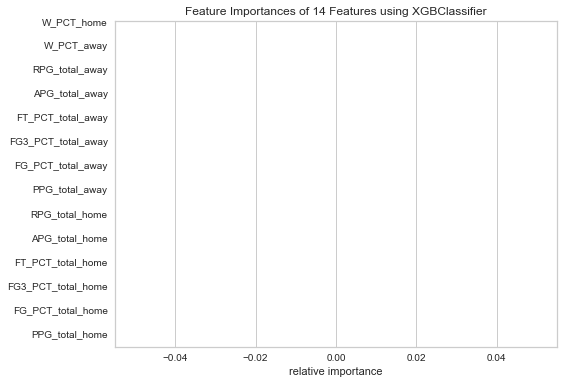

---------------------------------------------
i=7
FGP:

Best XGBoost accuracy ({'scale_pos_weight': 3}): 0.67
              precision    recall  f1-score   support

           0       0.73      0.68      0.70       570
           1       0.60      0.65      0.62       414

    accuracy                           0.67       984
   macro avg       0.66      0.67      0.66       984
weighted avg       0.67      0.67      0.67       984



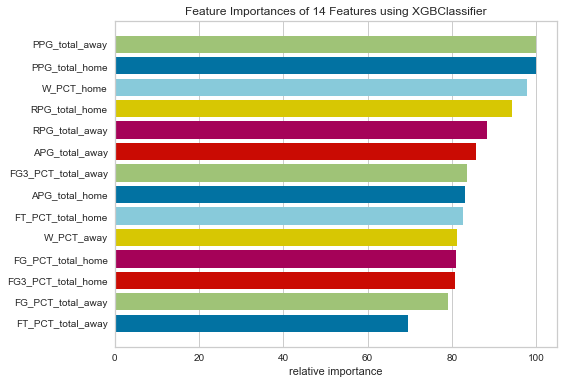

---------------------------------------------
i=8
FGP:

Best XGBoost accuracy ({'scale_pos_weight': 1}): 0.68
              precision    recall  f1-score   support

           0       0.72      0.80      0.76       603
           1       0.61      0.50      0.55       381

    accuracy                           0.68       984
   macro avg       0.66      0.65      0.65       984
weighted avg       0.68      0.68      0.68       984



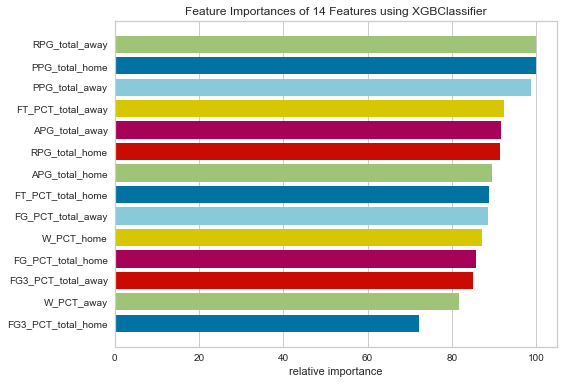

---------------------------------------------
i=9
FGP:

Best XGBoost accuracy ({'scale_pos_weight': 0}): 0.58
              precision    recall  f1-score   support

           0       0.58      1.00      0.73       567
           1       0.00      0.00      0.00       417

    accuracy                           0.58       984
   macro avg       0.29      0.50      0.37       984
weighted avg       0.33      0.58      0.42       984



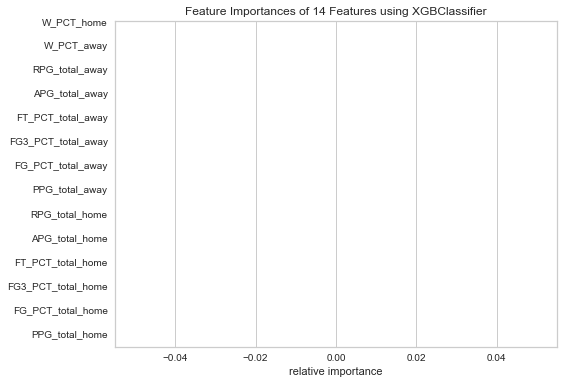

---------------------------------------------
Mean accuracy: 0.6529471544715447
Max accuracy: 0.6829268292682927
Min accuracy: 0.6077235772357723
i=10
FG3:

Best XGBoost accuracy ({'scale_pos_weight': 8}): 0.62
              precision    recall  f1-score   support

           0       0.70      0.45      0.55       322
           1       0.58      0.79      0.67       303

    accuracy                           0.62       625
   macro avg       0.64      0.62      0.61       625
weighted avg       0.64      0.62      0.61       625



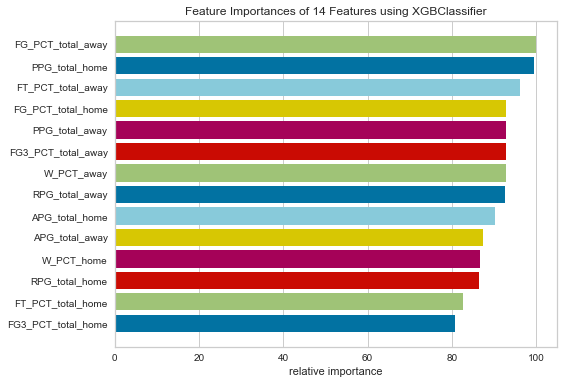

---------------------------------------------
i=11
FG3:

Best XGBoost accuracy ({'scale_pos_weight': 3}): 0.64
              precision    recall  f1-score   support

           0       0.69      0.54      0.61       326
           1       0.60      0.74      0.66       299

    accuracy                           0.64       625
   macro avg       0.64      0.64      0.63       625
weighted avg       0.65      0.64      0.63       625



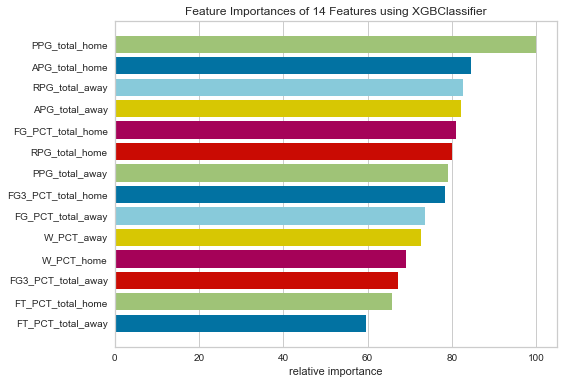

---------------------------------------------
i=12
FG3:

Best XGBoost accuracy ({'scale_pos_weight': 1}): 0.60
              precision    recall  f1-score   support

           0       0.63      0.60      0.62       336
           1       0.56      0.59      0.58       288

    accuracy                           0.60       624
   macro avg       0.60      0.60      0.60       624
weighted avg       0.60      0.60      0.60       624



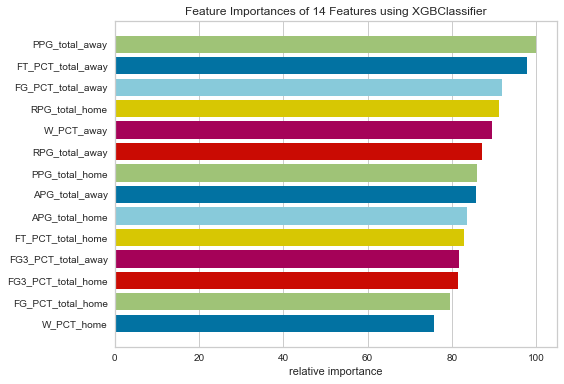

---------------------------------------------
i=13
FG3:

Best XGBoost accuracy ({'scale_pos_weight': 1}): 0.62
              precision    recall  f1-score   support

           0       0.62      0.63      0.62       315
           1       0.61      0.61      0.61       309

    accuracy                           0.62       624
   macro avg       0.62      0.62      0.62       624
weighted avg       0.62      0.62      0.62       624



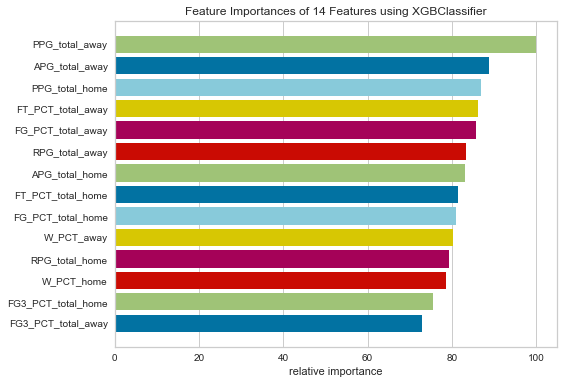

---------------------------------------------
i=14
FG3:

Best XGBoost accuracy ({'scale_pos_weight': 16}): 0.57
              precision    recall  f1-score   support

           0       0.65      0.38      0.48       325
           1       0.54      0.78      0.64       299

    accuracy                           0.57       624
   macro avg       0.60      0.58      0.56       624
weighted avg       0.60      0.57      0.56       624



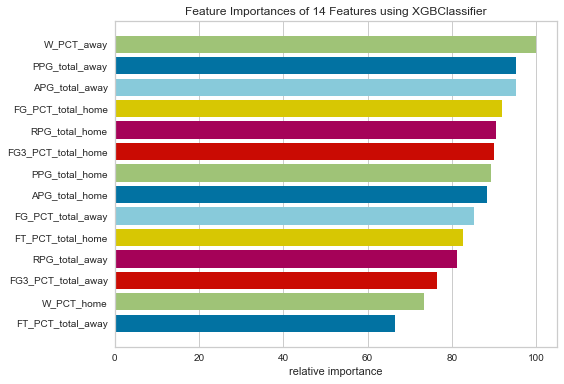

---------------------------------------------
Mean accuracy: 0.6164858974358974
Max accuracy: 0.6352
Min accuracy: 0.5993589743589743
i=15
FT:

Best XGBoost accuracy ({'scale_pos_weight': 3}): 0.62
              precision    recall  f1-score   support

           0       0.64      0.49      0.56       306
           1       0.61      0.74      0.67       325

    accuracy                           0.62       631
   macro avg       0.63      0.62      0.61       631
weighted avg       0.63      0.62      0.61       631



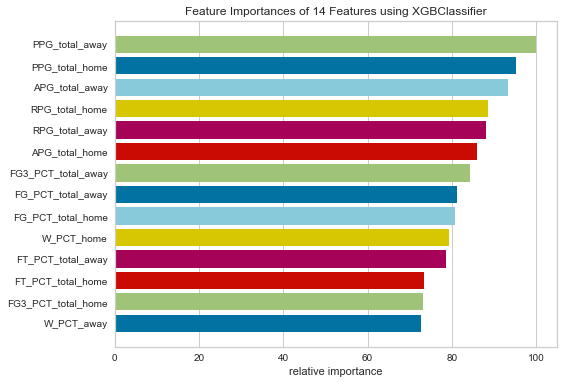

---------------------------------------------
i=16
FT:

Best XGBoost accuracy ({'scale_pos_weight': 2}): 0.65
              precision    recall  f1-score   support

           0       0.65      0.55      0.60       303
           1       0.64      0.73      0.68       328

    accuracy                           0.65       631
   macro avg       0.65      0.64      0.64       631
weighted avg       0.65      0.65      0.64       631



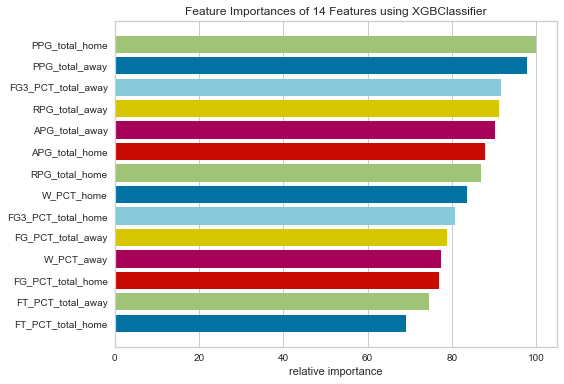

---------------------------------------------
i=17
FT:

Best XGBoost accuracy ({'scale_pos_weight': 7}): 0.61
              precision    recall  f1-score   support

           0       0.75      0.38      0.51       331
           1       0.56      0.86      0.68       299

    accuracy                           0.61       630
   macro avg       0.65      0.62      0.59       630
weighted avg       0.66      0.61      0.59       630



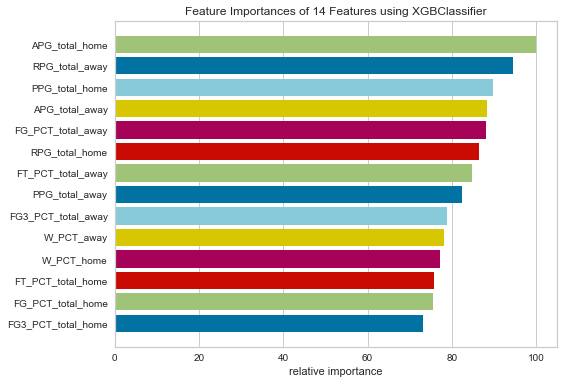

---------------------------------------------
i=18
FT:

Best XGBoost accuracy ({'scale_pos_weight': 11}): 0.67
              precision    recall  f1-score   support

           0       0.77      0.41      0.54       297
           1       0.63      0.89      0.74       333

    accuracy                           0.67       630
   macro avg       0.70      0.65      0.64       630
weighted avg       0.70      0.67      0.64       630



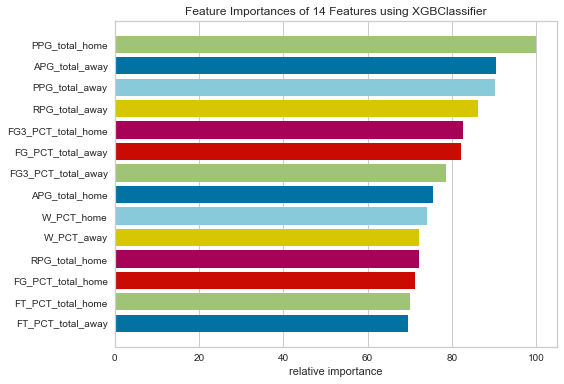

---------------------------------------------
i=19
FT:

Best XGBoost accuracy ({'scale_pos_weight': 17}): 0.59
              precision    recall  f1-score   support

           0       0.69      0.31      0.43       314
           1       0.56      0.86      0.67       316

    accuracy                           0.59       630
   macro avg       0.62      0.58      0.55       630
weighted avg       0.62      0.59      0.55       630



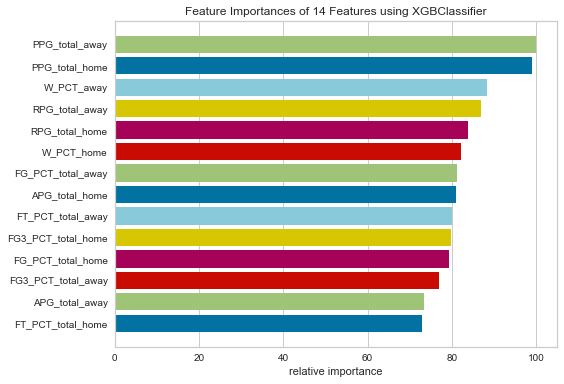

---------------------------------------------
Mean accuracy: 0.6348149825170427
Max accuracy: 0.665079365079365
Min accuracy: 0.6079365079365079
i=20
AST:

Best XGBoost accuracy ({'scale_pos_weight': 12}): 0.61
              precision    recall  f1-score   support

           0       0.77      0.48      0.59       577
           1       0.51      0.79      0.62       399

    accuracy                           0.61       976
   macro avg       0.64      0.64      0.61       976
weighted avg       0.66      0.61      0.60       976



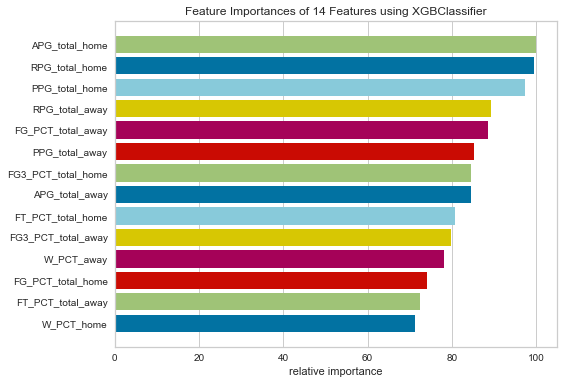

---------------------------------------------
i=21
AST:

Best XGBoost accuracy ({'scale_pos_weight': 0}): 0.62
              precision    recall  f1-score   support

           0       0.62      1.00      0.76       601
           1       0.00      0.00      0.00       375

    accuracy                           0.62       976
   macro avg       0.31      0.50      0.38       976
weighted avg       0.38      0.62      0.47       976



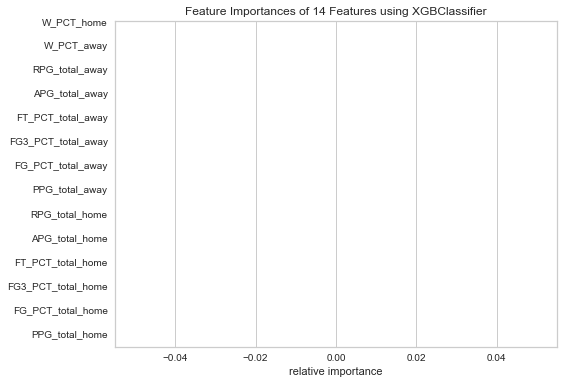

---------------------------------------------
i=22
AST:

Best XGBoost accuracy ({'scale_pos_weight': 2}): 0.67
              precision    recall  f1-score   support

           0       0.71      0.71      0.71       554
           1       0.62      0.62      0.62       421

    accuracy                           0.67       975
   macro avg       0.67      0.67      0.67       975
weighted avg       0.67      0.67      0.67       975



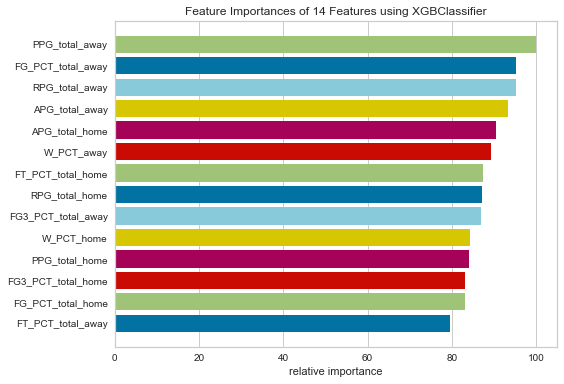

---------------------------------------------
i=23
AST:

Best XGBoost accuracy ({'scale_pos_weight': 1}): 0.67
              precision    recall  f1-score   support

           0       0.71      0.77      0.74       595
           1       0.58      0.51      0.54       380

    accuracy                           0.67       975
   macro avg       0.65      0.64      0.64       975
weighted avg       0.66      0.67      0.66       975



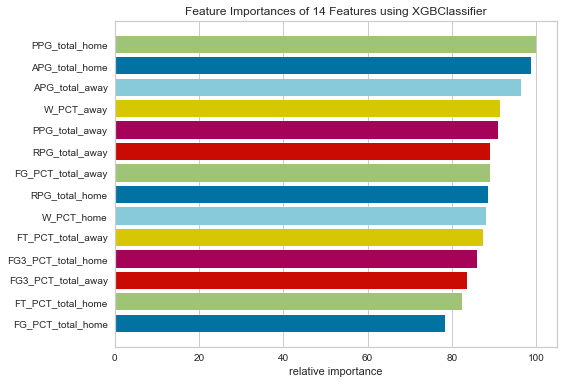

---------------------------------------------
i=24
AST:

Best XGBoost accuracy ({'scale_pos_weight': 0}): 0.58
              precision    recall  f1-score   support

           0       0.58      1.00      0.74       567
           1       0.00      0.00      0.00       408

    accuracy                           0.58       975
   macro avg       0.29      0.50      0.37       975
weighted avg       0.34      0.58      0.43       975



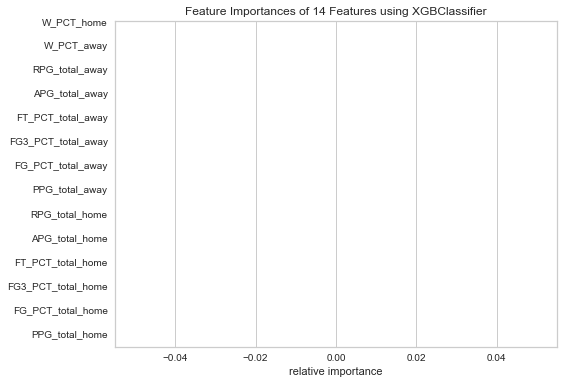

---------------------------------------------
Mean accuracy: 0.639942990752417
Max accuracy: 0.6717948717948717
Min accuracy: 0.6065573770491803
i=25
REB:

Best XGBoost accuracy ({'scale_pos_weight': 0}): 0.58
              precision    recall  f1-score   support

           0       0.58      1.00      0.74       490
           1       0.00      0.00      0.00       350

    accuracy                           0.58       840
   macro avg       0.29      0.50      0.37       840
weighted avg       0.34      0.58      0.43       840



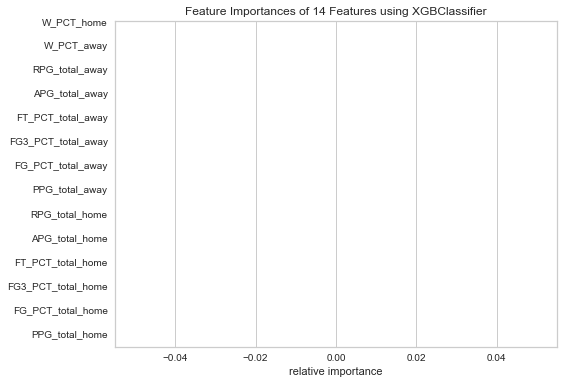

---------------------------------------------
i=26
REB:

Best XGBoost accuracy ({'scale_pos_weight': 0}): 0.56
              precision    recall  f1-score   support

           0       0.56      1.00      0.72       472
           1       0.00      0.00      0.00       368

    accuracy                           0.56       840
   macro avg       0.28      0.50      0.36       840
weighted avg       0.32      0.56      0.40       840



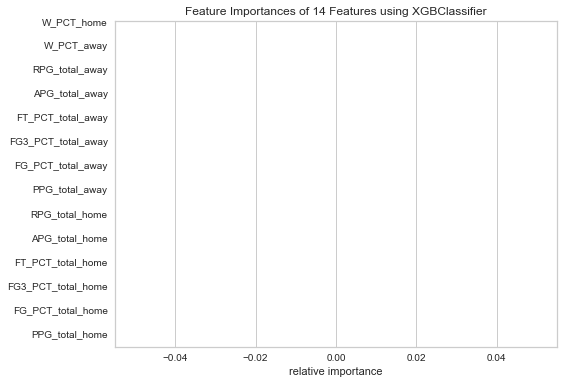

---------------------------------------------
i=27
REB:

Best XGBoost accuracy ({'scale_pos_weight': 1}): 0.67
              precision    recall  f1-score   support

           0       0.67      0.80      0.73       477
           1       0.65      0.50      0.56       363

    accuracy                           0.67       840
   macro avg       0.66      0.65      0.65       840
weighted avg       0.66      0.67      0.66       840



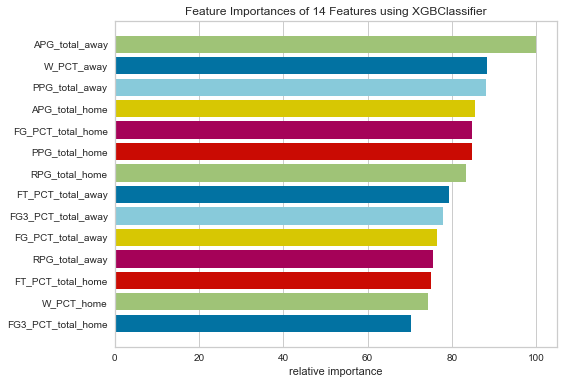

---------------------------------------------
i=28
REB:

Best XGBoost accuracy ({'scale_pos_weight': 2}): 0.64
              precision    recall  f1-score   support

           0       0.72      0.67      0.70       515
           1       0.53      0.59      0.56       325

    accuracy                           0.64       840
   macro avg       0.63      0.63      0.63       840
weighted avg       0.65      0.64      0.64       840



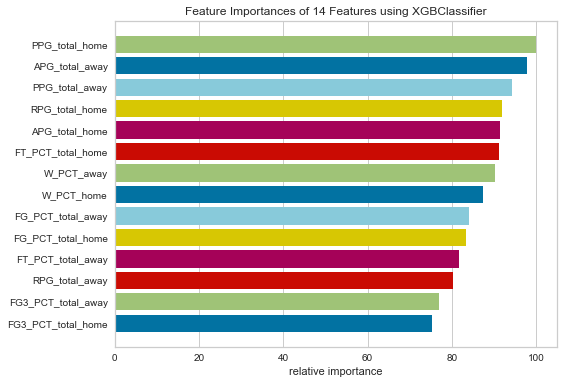

---------------------------------------------
i=29
REB:

Best XGBoost accuracy ({'scale_pos_weight': 0}): 0.55
              precision    recall  f1-score   support

           0       0.55      1.00      0.71       464
           1       0.00      0.00      0.00       375

    accuracy                           0.55       839
   macro avg       0.28      0.50      0.36       839
weighted avg       0.31      0.55      0.39       839



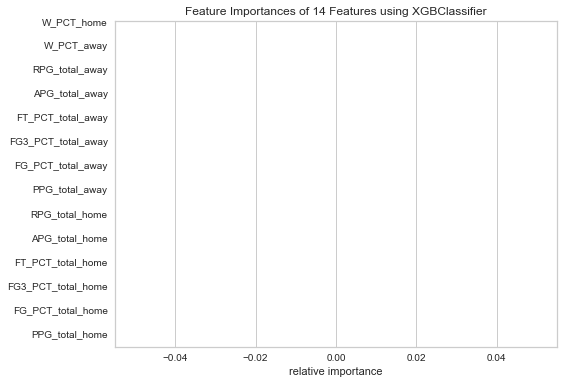

---------------------------------------------
Mean accuracy: 0.6133928571428571
Max accuracy: 0.6666666666666666
Min accuracy: 0.5619047619047619


In [29]:
# Control the balance of positive and negative weights, useful for unbalanced classes. 
# A typical value to consider: sum(negative instances) / sum(positive instances).

print_cross_validated_and_plot(X_train_dicts, X_test_dicts, y_train_dicts, y_test_dicts, {
    'scale_pos_weight' : [*range(0,30)],
})